In [1]:
%pip install prince
%pip install scikit-learn-extra


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [98]:
#libraries
import pandas as pd 
import numpy as np
import pip
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import scipy.stats as stats
import random
import itertools
import prince

from scipy.stats import shapiro, spearmanr, mannwhitneyu, kruskal, chi2_contingency, fisher_exact
from decimal import Decimal
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids 
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Data collection and initial check

Load the csv file into a pandas dataframe and check the variable types.

In [3]:
path = "./dataset_project_eHealth20252026.csv"
dataset = pd.read_csv(path)
dataset.head(5)

,age,gender,education,marital,income,audit_1,audit_2,audit_3,audit_4,audit_5,...,swls_1,swls_2,swls_3,swls_4,swls_5,who5_1,who5_2,who5_3,who5_4,who5_5
0,39.0,0,8.0,1.0,14000,4,3,0.0,0,4.0,...,2,0.0,4.0,2.0,0,2.0,3,3.0,3.0,2.0
1,18.0,1,5.0,1.0,25000,4,4,0.0,0,0.0,...,0,4.0,2.0,4.0,4,0.0,0,3.0,2.0,2.0
2,40.0,0,13.0,2.0,56000,0,0,0.0,0,0.0,...,0,2.0,4.0,0.0,2,3.0,2,3.0,2.0,3.0
3,24.0,1,22.0,0.0,35000,1,0,1.0,1,1.0,...,2,2.0,4.0,3.0,4,3.0,2,1.0,2.0,3.0
4,19.0,1,22.0,1.0,42000,2,2,0.0,2,2.0,...,5,7.0,3.0,5.0,7,5.0,5,4.0,3.0,3.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 96 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        220 non-null    float64
 1   gender     221 non-null    int64  
 2   education  220 non-null    float64
 3   marital    220 non-null    float64
 4   income     221 non-null    int64  
 5   audit_1    221 non-null    int64  
 6   audit_2    221 non-null    int64  
 7   audit_3    220 non-null    float64
 8   audit_4    221 non-null    int64  
 9   audit_5    220 non-null    float64
 10  audit_6    221 non-null    int64  
 11  audit_7    220 non-null    float64
 12  audit_8    220 non-null    float64
 13  audit_9    220 non-null    float64
 14  audit_10   219 non-null    float64
 15  dast_1     221 non-null    int64  
 16  dast_2     219 non-null    float64
 17  dast_3     220 non-null    float64
 18  dast_4     221 non-null    int64  
 19  dast_5     220 non-null    float64
 20  dast_6    

In [5]:
df = pd.DataFrame(dataset) #dataframe creation

In [6]:
print("Elenco colonne del dataset:")
for i, col in enumerate(df.columns):
    print(f"{i+1:02d}: {col}")

Elenco colonne del dataset:
01: age
02: gender
03: education
04: marital
05: income
06: audit_1
07: audit_2
08: audit_3
09: audit_4
10: audit_5
11: audit_6
12: audit_7
13: audit_8
14: audit_9
15: audit_10
16: dast_1
17: dast_2
18: dast_3
19: dast_4
20: dast_5
21: dast_6
22: dast_7
23: dast_8
24: dast_9
25: dast_10
26: pgsi_1
27: pgsi_2
28: pgsi_3
29: pgsi_4
30: pgsi_5
31: pgsi_6
32: pgsi_7
33: pgsi_8
34: pgsi_9
35: iat_1
36: iat_2
37: iat_3
38: iat_4
39: iat_5
40: iat_6
41: iat_7
42: iat_8
43: iat_9
44: iat_10
45: iat_11
46: iat_12
47: iat_13
48: iat_14
49: iat_15
50: iat_16
51: iat_17
52: iat_18
53: iat_19
54: iat_20
55: pcl5_1
56: pcl5_2
57: pcl5_3
58: pcl5_4
59: pcl5_5
60: pcl5_6
61: pcl5_7
62: pcl5_8
63: pcl5_9
64: pcl5_10
65: pcl5_11
66: pcl5_12
67: pcl5_13
68: pcl5_14
69: pcl5_15
70: pcl5_16
71: pcl5_17
72: pcl5_18
73: pcl5_19
74: pcl5_20
75: mspss_1
76: mspss_2
77: mspss_3
78: mspss_4
79: mspss_5
80: mspss_6
81: mspss_7
82: mspss_8
83: mspss_9
84: mspss_10
85: mspss_11
86: mspss

The dataset has 221 rows and 96 columns.

# Data cleaning

Check for duplicated rows and delete them.

In [7]:
df.duplicated() #check for duplicated rows and delete them

0      False
1      False
2      False
3      False
4      False
       ...  
216     True
217     True
218     True
219     True
220     True
Length: 221, dtype: bool

In [8]:
df = df.drop_duplicates()

In [9]:
df

,age,gender,education,marital,income,audit_1,audit_2,audit_3,audit_4,audit_5,...,swls_1,swls_2,swls_3,swls_4,swls_5,who5_1,who5_2,who5_3,who5_4,who5_5
0,39.0,0,8.0,1.0,14000,4,3,0.0,0,4.0,...,2,0.0,4.0,2.0,0,2.0,3,3.0,3.0,2.0
1,18.0,1,5.0,1.0,25000,4,4,0.0,0,0.0,...,0,4.0,2.0,4.0,4,0.0,0,3.0,2.0,2.0
2,40.0,0,13.0,2.0,56000,0,0,0.0,0,0.0,...,0,2.0,4.0,0.0,2,3.0,2,3.0,2.0,3.0
3,24.0,1,22.0,0.0,35000,1,0,1.0,1,1.0,...,2,2.0,4.0,3.0,4,3.0,2,1.0,2.0,3.0
4,19.0,1,22.0,1.0,42000,2,2,0.0,2,2.0,...,5,7.0,3.0,5.0,7,5.0,5,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,28.0,0,13.0,1.0,36000,1,1,0.0,0,0.0,...,4,1.0,4.0,0.0,0,0.0,3,3.0,3.0,1.0
196,21.0,0,18.0,1.0,38000,1,1,1.0,0,1.0,...,4,4.0,4.0,4.0,3,3.0,3,2.0,0.0,3.0
197,20.0,1,22.0,4.0,50000,2,2,0.0,2,1.0,...,7,7.0,7.0,1.0,7,3.0,5,5.0,5.0,3.0
198,39.0,0,8.0,1.0,22000,0,4,3.0,2,0.0,...,0,4.0,4.0,4.0,1,1.0,0,3.0,2.0,0.0


The deleted rows are 21, the dataset has 200 rows and 96 columns and it is saved in a new dataset named new_df.

In [10]:
new_df = df.copy()

## Handling missing values

The dataset contains some missing values. These are not necessarily due to data collection errors — in some cases, they result from the questionnaire structure (skip logic), where certain responses are implicitly determined by previous answers. Therefore, the missing data are assumed to follow a "Missing At Random" (MAR) mechanism rather than being "Missing Completely At Random" (MCAR). 
However, for analytical purposes, we treat them as completely random, assuming no systematic bias is introduced.
Imputation Strategy:
- Categorical variables  -> mode
- Binary variables (0/1) -> mode
- Continuous / Likert-scale variables -> mean if |skew| <= 0.5, else median
- Label columns are excluded from imputation

This approach helps preserve data consistency while minimizing distortion in the overall distribution. Before imputation, null-like string values are normalized to ensure correct detection and replacement.

Replace all different representations of missing or empty values in the DataFrame (e.g., empty strings, "NA", "N/A", "nan", "missing", None, etc.) with a consistent NaN value recognized by pandas for easier data cleaning and analysis.

In [11]:
new_df = new_df.replace(["", " ", "NA", "N/A", "na", "NaN", "nan", "missing", "None", None, pd.NaT, pd.NA], np.nan)

In [12]:
# helper function to safely get the mode of a series, returning NaN if no mode found
def safe_mode(s):
    m = s.mode(dropna=True)
    return m.iloc[0] if len(m) else np.nan

# 1) define known groups of columns
label_cols = [c for c in new_df.columns if c.endswith("_label") or c.endswith("_labels")]
cat_code_cols = [c for c in ["gender", "education", "marital"] if c in new_df.columns]
binary_cols = [c for c in new_df.columns if c.startswith("dast_")]  # DAST columns are binary 0/1
# automatically add any other columns that are 0/1 and not already classified
for c in new_df.columns:
    if c in binary_cols or c in label_cols:
        continue
    vals = pd.to_numeric(new_df[c], errors="coerce")
    uniq = set(vals.dropna().unique())
    if uniq.issubset({0, 1}) and c not in binary_cols:
        binary_cols.append(c)

# 2) convert columns to numeric where needed (skip labels and categorical coded columns)
numeric_candidates = [c for c in new_df.columns if c not in label_cols]
for c in numeric_candidates:
    new_df[c] = pd.to_numeric(new_df[c], errors="coerce")

# 3) count missing values before imputation
nan_before = new_df.isna().sum().to_dict()
decisions = []

# 4) imputations
# 4a) for categorical coded columns -> fill missing values with mode
for c in cat_code_cols:
    if c in new_df.columns:
        val = safe_mode(new_df[c])
        new_df[c] = new_df[c].fillna(val)
        decisions.append((c, "mode (categorical)"))

# 4b) for binary columns (DAST + other auto-detected 0/1) -> fill missing with mode
for c in binary_cols:
    if c in new_df.columns and c not in cat_code_cols:
        val = safe_mode(new_df[c])
        new_df[c] = new_df[c].fillna(val)
        decisions.append((c, "mode (binary)"))

# 4c) for all other numeric columns -> fill missing with mean or median based on skewness
for c in new_df.columns:
    if c in label_cols or c in cat_code_cols or c in binary_cols:
        continue
    # consider only real numeric columns
    if not pd.api.types.is_numeric_dtype(new_df[c]):
        continue
    s = new_df[c].dropna()
    if s.empty:
        continue
    skew = s.skew()  # Pandas skewness (Fisher-Pearson)
    if np.isfinite(skew) and abs(skew) <= 0.5:
        fill_val = s.mean()
        method = "mean (|skew|<=0.5)"
    else:
        fill_val = s.median()
        method = "median (|skew|>0.5)"
    new_df[c] = new_df[c].fillna(fill_val)
    decisions.append((c, f"{method}; skew={skew:.2f}"))

# 5) count missing values after imputation and calculate how many were replaced
nan_after = new_df.isna().sum().to_dict()
fixed_per_col = {c: int(nan_before.get(c,0) - nan_after.get(c,0)) for c in new_df.columns}

print("=== Imputation decisions (first 30) ===")
for name, how in decisions[:30]:
    print(f"{name:>20} -> {how}")

print("\n=== NaN replaced per column (top 20) ===")
for col, nfix in sorted(fixed_per_col.items(), key=lambda x: x[1], reverse=True)[:20]:
    if nfix > 0:
        print(f"{col:>20}: {nfix}")

print("\nTotale NaN sostituiti:", sum(fixed_per_col.values()))


=== Imputation decisions (first 30) ===
              gender -> mode (categorical)
           education -> mode (categorical)
             marital -> mode (categorical)
              dast_1 -> mode (binary)
              dast_2 -> mode (binary)
              dast_3 -> mode (binary)
              dast_4 -> mode (binary)
              dast_5 -> mode (binary)
              dast_6 -> mode (binary)
              dast_7 -> mode (binary)
              dast_8 -> mode (binary)
              dast_9 -> mode (binary)
             dast_10 -> mode (binary)
                 age -> mean (|skew|<=0.5); skew=0.11
              income -> median (|skew|>0.5); skew=1.05
             audit_1 -> median (|skew|>0.5); skew=1.19
             audit_2 -> median (|skew|>0.5); skew=1.04
             audit_3 -> median (|skew|>0.5); skew=1.11
             audit_4 -> median (|skew|>0.5); skew=1.17
             audit_5 -> median (|skew|>0.5); skew=1.05
             audit_6 -> median (|skew|>0.5); skew=1.12
            

In [13]:
new_df.isna().sum()

age          0
gender       0
education    0
marital      0
income       0
            ..
who5_1       0
who5_2       0
who5_3       0
who5_4       0
who5_5       0
Length: 96, dtype: int64

The imputation results show that categorical coded columns such as "gender," "education," and "marital" were filled with their mode values, which is a common and effective approach for categorical missing data. Binary columns (mostly dast_1 to dast_10) were also imputed using the mode, reflecting their binary nature and ensuring logical consistency.

For numeric columns, the code selected the imputation method based on skewness:
- Columns with low skewness (|skew| ≤ 0.5), such as "age," are imputed using the mean.
- Columns with higher skewness (|skew| > 0.5), such as "income," "audit_1" to "audit_10," and "pgsi_1" to "pgsi_5," are imputed using the median. Median imputation is more robust to outliers and skewed distributions, providing more reliable substitution for missing values in such cases.

The number of missing values replaced per column varies, with some columns having only a few NaNs filled, totaling 73 replacements overall.

In [14]:
new_df

,age,gender,education,marital,income,audit_1,audit_2,audit_3,audit_4,audit_5,...,swls_1,swls_2,swls_3,swls_4,swls_5,who5_1,who5_2,who5_3,who5_4,who5_5
0,39.0,0,8.0,1.0,14000,4,3,0.0,0,4.0,...,2,0.0,4.0,2.0,0,2.0,3,3.0,3.0,2.0
1,18.0,1,5.0,1.0,25000,4,4,0.0,0,0.0,...,0,4.0,2.0,4.0,4,0.0,0,3.0,2.0,2.0
2,40.0,0,13.0,2.0,56000,0,0,0.0,0,0.0,...,0,2.0,4.0,0.0,2,3.0,2,3.0,2.0,3.0
3,24.0,1,22.0,0.0,35000,1,0,1.0,1,1.0,...,2,2.0,4.0,3.0,4,3.0,2,1.0,2.0,3.0
4,19.0,1,22.0,1.0,42000,2,2,0.0,2,2.0,...,5,7.0,3.0,5.0,7,5.0,5,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,28.0,0,13.0,1.0,36000,1,1,0.0,0,0.0,...,4,1.0,4.0,0.0,0,0.0,3,3.0,3.0,1.0
196,21.0,0,18.0,1.0,38000,1,1,1.0,0,1.0,...,4,4.0,4.0,4.0,3,3.0,3,2.0,0.0,3.0
197,20.0,1,22.0,4.0,50000,2,2,0.0,2,1.0,...,7,7.0,7.0,1.0,7,3.0,5,5.0,5.0,3.0
198,39.0,0,8.0,1.0,22000,0,4,3.0,2,0.0,...,0,4.0,4.0,4.0,1,1.0,0,3.0,2.0,0.0


# EDA (Exploratory Data Analysis)

Exploratory Data Analysis (EDA) is a crucial first step in any data analysis or statistical study. EDA involves summarizing and visualizing key characteristics of variables to understand their distributions, detect patterns. In EDA, it is essential to distinguish between continuous and categorical variables, as each type requires different analytical strategies and visualizations. 
- Continuous variables (such as age and income) are summarized and explored using histograms and normality tests (e.g., Shapiro-Wilk) to assess distribution characteristics. 
- In contrast, categorical variables (such as gender, education, and marital status) are described with frequency counts and visualized using count plots or bar charts. Normality tests are not applicable to categorical variables, as these codes do not represent continuous measurements and must not be interpreted as such.

**Shapiro-Wilk test**

Shapiro-Wilk test is a hypothesis test that evaluates whether a data set is normally distributed. It evaluates data from a sample with the null hypothesis that the data set is normally distributed. A large p-value indicates the data set is normally distributed, a low p-value indicates that it isn’t normally distributed.

It’s a widely-used statistical tool that can help us find an answer to the normality check we need, but it has one flaw: It doesn’t work well with large data sets. The maximum allowed size for a data set depends on the implementation. For example, for samples larger than 5,000, the Shapiro-Wilk test with SciPy in Python still runs, but it issues a warning that the p-value may not be accurate due to limitations in the test’s underlying assumptions.

https://builtin.com/data-science/shapiro-wilk-test

# Univariate EDA

## Categorical variables

### Gender
Gender is a categorical variable represented by numeric codes (0, 1, 2, 3) that correspond to ordered categories.

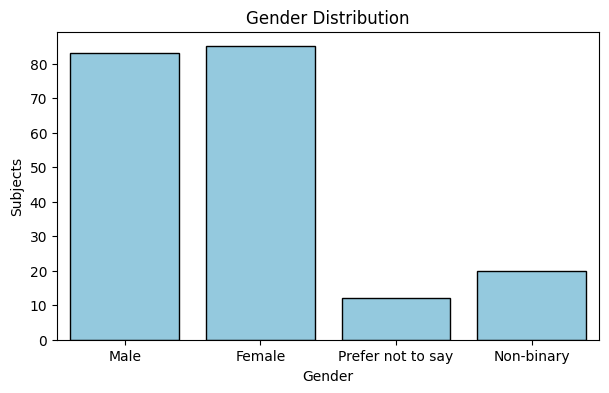

Gender counts:
gender_label
Female               85
Male                 83
Non-binary           20
Prefer not to say    12
Name: count, dtype: int64


In [15]:
#[0] Male [1] Female [2] Non-binary [3] Prefer not to say

# Replace numeric codes with labels
gender_labels = {
    0: 'Male',
    1: 'Female',
    2: 'Non-binary',
    3: 'Prefer not to say'
}
new_df['gender_label'] = new_df['gender'].map(gender_labels)

# Plot
plt.figure(figsize=(7, 4))
sns.countplot(data=new_df, x='gender_label', color='skyblue',edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Subjects')
plt.title('Gender Distribution')
#plt.xticks(rotation=15)
plt.show()

# Print frequency counts for each gender
print("Gender counts:")
print(new_df['gender_label'].value_counts(dropna=False))

The most represented categories are Female (85) and Male (83): this suggests that outcomes related to gender can be compared between these two groups with reasonable statistical power.

### Education
Education is a categorical variable represented by numeric codes (5, 8, 13, 18, 22, 25) that correspond to ordered categories.

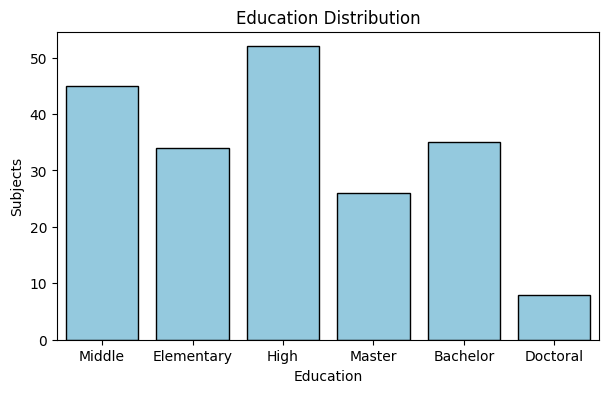

Education counts:
school_labels
High          52
Middle        45
Bachelor      35
Elementary    34
Master        26
Doctoral       8
Name: count, dtype: int64


In [16]:
#[5] Elementary school [8] Middle school [13] High School [18]Bachelor's Degree [22] Master's Degree [25] Doctoral Degree

# Replace numeric codes with labels
school_labels = {
    5: 'Elementary',
    8: 'Middle',
    13: 'High',
    18: 'Bachelor',
    22: 'Master',
    25: 'Doctoral'
}
new_df['school_labels'] = new_df['education'].map(school_labels)

# Plot
plt.figure(figsize=(7, 4))
sns.countplot(data=new_df, x='school_labels', color='skyblue',edgecolor='black')
plt.xlabel('Education')
plt.ylabel('Subjects')
plt.title('Education Distribution')
#plt.xticks(rotation=15)
plt.show()

# Print frequency counts for each education level
print("Education counts:")
print(new_df['school_labels'].value_counts(dropna=False))

This distribution suggests that most participants completed either secondary (High School/Middle School) or tertiary (Bachelor’s/Master’s) education, with fewer achieving only an elementary education or the most advanced level. 

The presence of all education levels supports adequately powered comparisons for group-level analysis, although the Doctoral category has a limited sample size.

### Marital status
Marital status is a categorical variable represented by numeric codes (0, 1, 2, 3, 4, 5) that correspond to ordered categories.

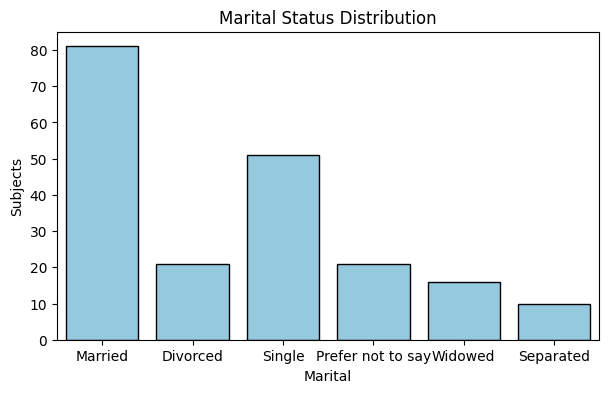

Marital status counts:
marital_labels
Married              81
Single               51
Divorced             21
Prefer not to say    21
Widowed              16
Separated            10
Name: count, dtype: int64


In [17]:
# [0] Single [1] Married [2] Divorced [3] Widowed [4] Separated [5] Prefer not to say

# Replace numeric codes with labels
marital_labels = {
    0: 'Single',
    1: 'Married',
    2: 'Divorced',
    3: 'Widowed',
    4: 'Separated',
    5: 'Prefer not to say'
}
new_df['marital_labels'] = new_df['marital'].map(marital_labels)

# Plot
plt.figure(figsize=(7, 4))
sns.countplot(data=new_df, x='marital_labels', color='skyblue',edgecolor='black')
plt.xlabel('Marital')
plt.ylabel('Subjects')
plt.title('Marital Status Distribution')
#plt.xticks(rotation=15)
plt.show()

# Print category counts
print("Marital status counts:")
print(new_df['marital_labels'].value_counts(dropna=False))

The largest group is Married (81), followed by Single (51), providing a strong basis for comparisons within these groups. 
The Divorced, Widowed, Separated, and Prefer not to say categories are less frequent, which may limit subgroup analysis but still contribute valuable diversity and context.

## Numeric variables

### Age

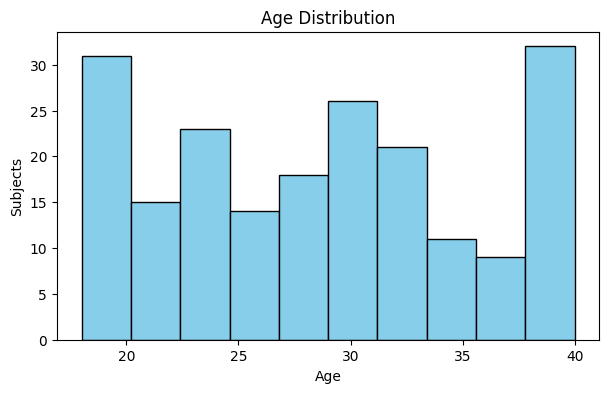

Shapiro-Wilk test statistic: 0.9423
P-value: 0.0000
The age distribution is NOT normal.


In [18]:
plt.figure(figsize=(7, 4))
plt.hist(new_df['age'], color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Subjects')
plt.title('Age Distribution')
plt.show()

stat, p_value = shapiro(new_df['age'])

print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The age distribution is compatible with normality.")
else:
    print("The age distribution is NOT normal.")

There are noticeable peaks at both ends of the range, with higher counts for subjects around ages 18–20 and 39–40. The lowest frequencies occur in the mid-thirties (about 35–38)

### Income

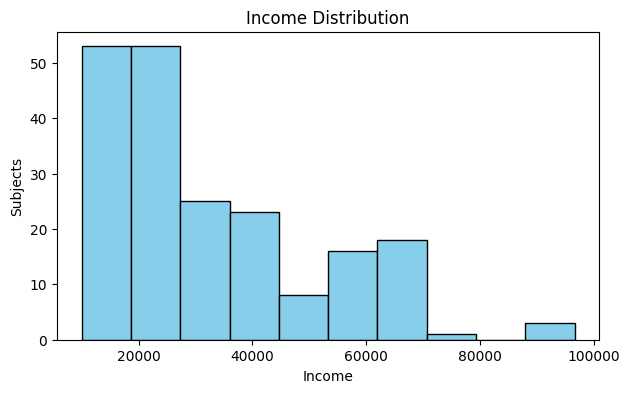

Shapiro-Wilk test statistic: 0.8894
P-value: 0.0000
The income distribution is NOT normal.


In [19]:
plt.figure(figsize=(7, 4))
plt.hist(new_df['income'], color='skyblue', edgecolor='black')
plt.xlabel('Income')
plt.ylabel('Subjects')
plt.title('Income Distribution')
plt.show()

stat, p_value = shapiro(new_df['income'])

print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The income distribution is compatible with normality.")
else:
    print("The income distribution is NOT normal.")

The distribution is clearly not normal, as indicated by the strong skewness and large number of low-income subjects compared to those with higher incomes.

The Shapiro-Wilk test statistic of 0.8894 and a p-value of 0.0000 confirm this visual impression, providing strong evidence against normality.

### Psychometric tests

Outliers are retained rather than removed; this differs from the generic scheme but is justified because high‑risk cases are theoretically important for personas.

**Cronbach’s Alpha**

Alpha was developed by Lee Cronbach in 195111 to provide a measure of the internal consistency of a test or scale; it is expressed as a number between 0 and 1. Internal consistency describes the extent to which all the items in a test measure the same concept or construct and hence it is connected to the inter-relatedness of the items within the test. 
If the Alpha is high (above 0.7 or 0.8), it means all the questions are basically measuring the same thing, so you can trust the sum or average as a reliable score for that concept.
https://pmc.ncbi.nlm.nih.gov/articles/PMC4205511/
https://how.dev/answers/how-to-implement-cronbachs-alpha-for-reliability-in-python

In [20]:
def cronbach_alpha(data):
    # Transform the data frame into a correlation matrix
    df_corr = data.corr()
    
    # Calculate N
    # The number of variables is equal to the number of columns in the dataframe
    N = data.shape[1]
    
    # Calculate r
    # For this, we'll loop through all the columns and append every relevant correlation to an array called 'r_s'. 
    # Then, we'll calculate the mean of 'r_s'.
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
   # Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

In [21]:
# Make a copy to work on
df_simplified = new_df.copy()

#### IAT

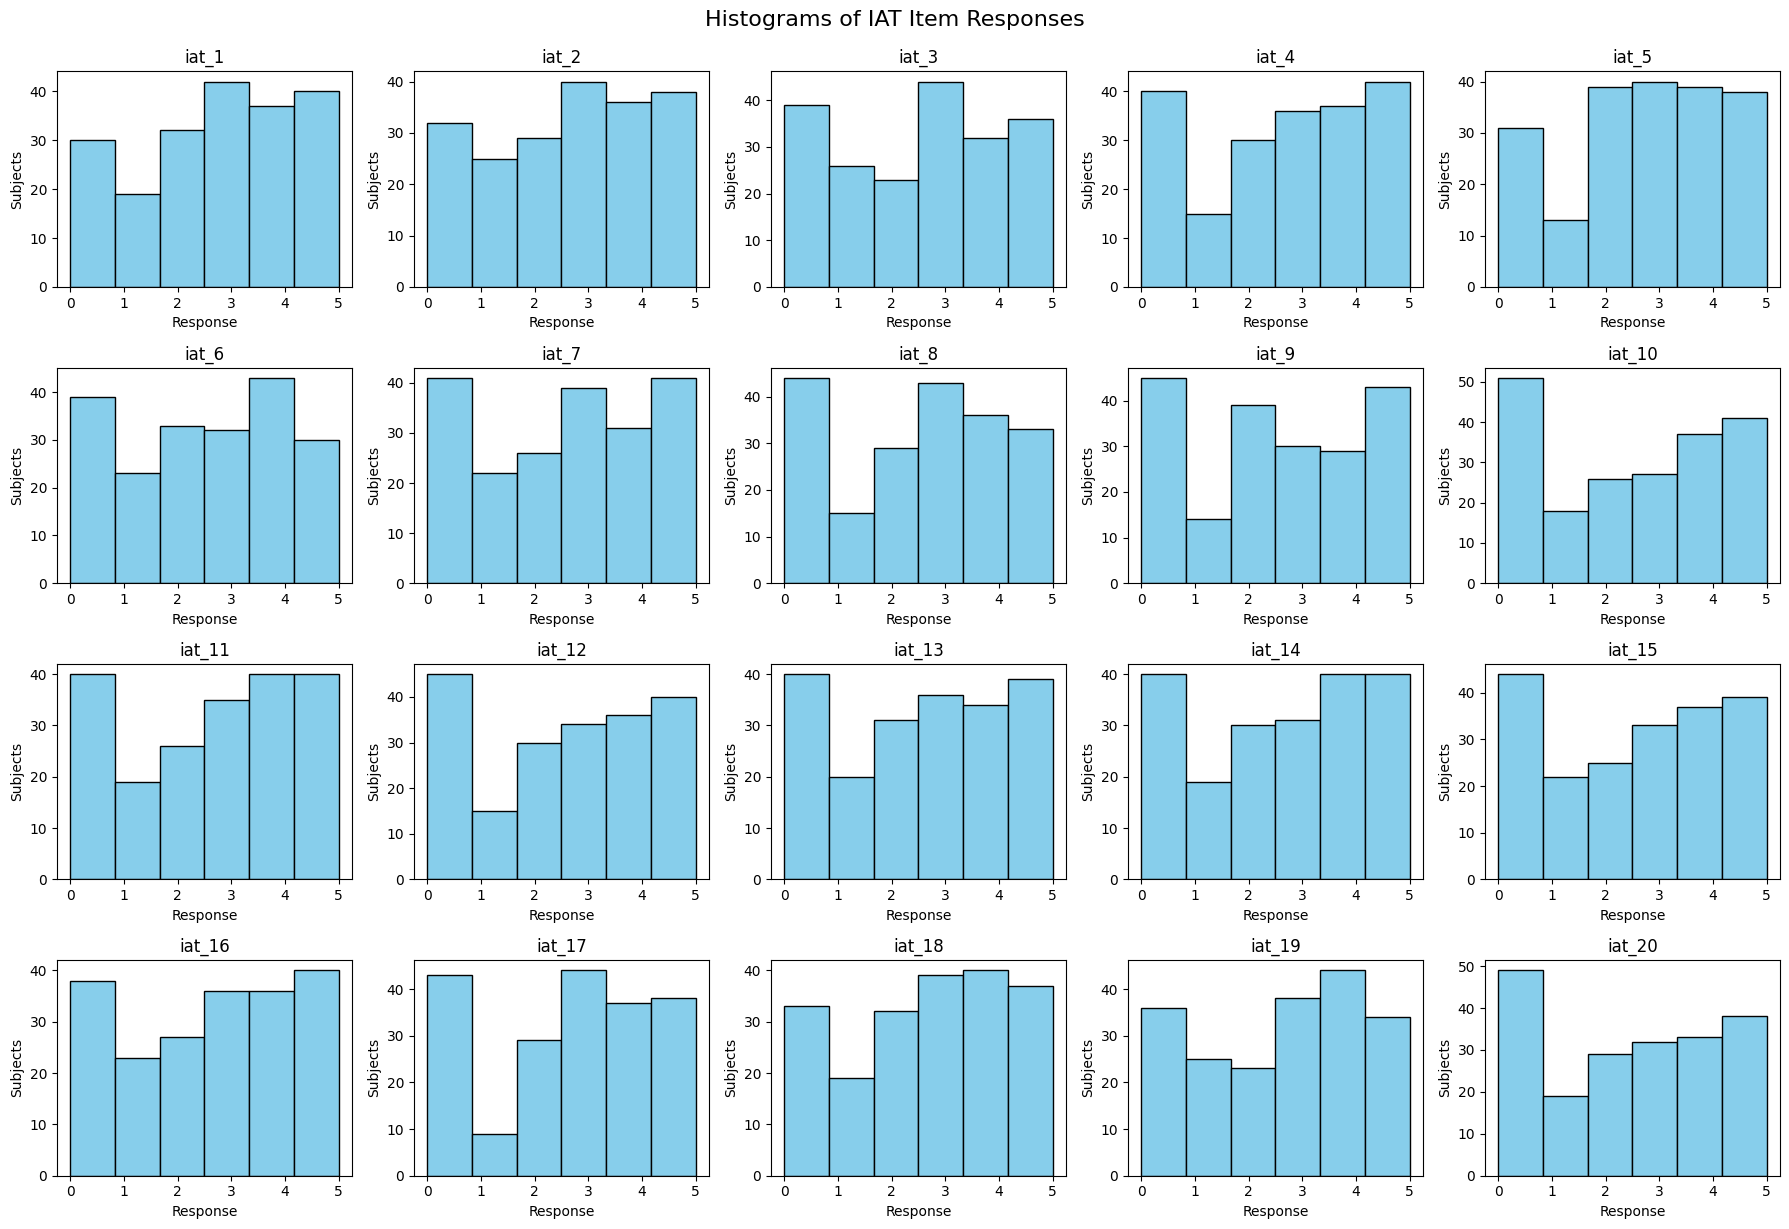

In [22]:
# Select only IAT columns
iat_item_cols = [f"iat_{i}" for i in range(1, 21)]
df_iat = df_simplified[iat_item_cols]

# Plot
n_items = len(iat_item_cols)
n_rows, n_cols = 4, 5

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
axes = axes.flatten()
# Histograms for each item
for idx, col in enumerate(iat_item_cols):
    axes[idx].hist(df_simplified[col], bins=6, color='skyblue', edgecolor='black')
    axes[idx].set_title(f"{col}")
    axes[idx].set_xlabel("Response")
    axes[idx].set_ylabel("Subjects")
# Hide unused axes if any
for ax in axes[n_items:]:
    ax.set_visible(False)

plt.tight_layout()
plt.suptitle("Histograms of IAT Item Responses", fontsize=16, y=1.02)
plt.show()

In [23]:
df_iat.describe()

,iat_1,iat_2,iat_3,iat_4,iat_5,iat_6,iat_7,iat_8,iat_9,iat_10,iat_11,iat_12,iat_13,iat_14,iat_15,iat_16,iat_17,iat_18,iat_19,iat_20
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2.783920,2.685000,2.555556,2.705000,2.783920,2.532663,2.595960,2.550505,2.565000,2.517588,2.680000,2.605000,2.605000,2.658291,2.570000,2.645000,2.683417,2.725000,2.655000,2.475000
std,1.686048,1.714782,1.757809,1.789971,1.665054,1.729928,1.801279,1.755100,1.825496,1.891117,1.795472,1.820866,1.778988,1.797211,1.828062,1.781811,1.766601,1.704082,1.741014,1.842921
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [24]:
c_alpha_iat = cronbach_alpha(df_iat)
print(f"Cronbach_alpha value: {c_alpha_iat:.4f}")

Cronbach_alpha value: 0.9729


Most items show broad usage of the full response scale, with medians generally between 2 and 4, and similar variability across the scale. 
The item-wise histograms reveal that although most items capture a full range of participant responses, some items display higher or lower frequencies at different response categories, highlighting unique response patterns.

The Cronbach’s alpha for the IAT in this sample is extremely high (α = 0.97), confirming excellent internal consistency and justifying use of the total score for further analysis.

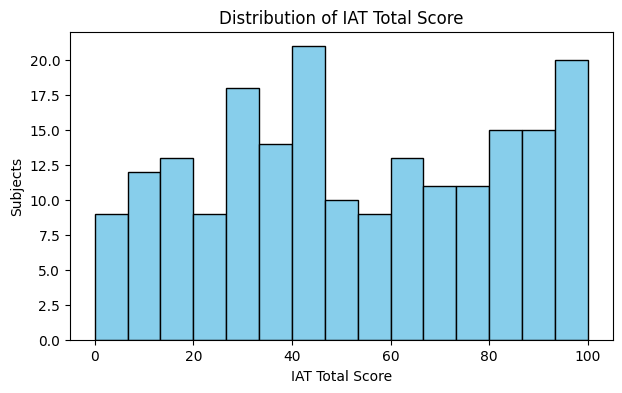

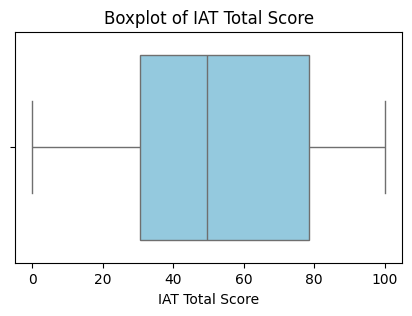

IAT total score summary statistics:
count    200.000000
mean      52.576819
std       28.821201
min        0.000000
25%       30.500000
50%       49.500000
75%       78.500000
max      100.000000
Name: iat_total, dtype: float64
Shapiro-Wilk test statistic: 0.9521
P-value: 0.0000
The IAT total score distribution significantly deviates from normality.


In [25]:
# Compute the total score
df_simplified['iat_total'] = df_simplified[iat_item_cols].sum(axis=1)

# Visualize histogram of total score
plt.figure(figsize=(7, 4))
plt.hist(df_simplified['iat_total'], bins=15, color='skyblue', edgecolor='black')
plt.xlabel("IAT Total Score")
plt.ylabel("Subjects")
plt.title("Distribution of IAT Total Score")
plt.show()

# Visualize boxplot of total score
plt.figure(figsize=(5, 3))
sns.boxplot(x=df_simplified['iat_total'], color='skyblue')
plt.xlabel("IAT Total Score")
plt.title("Boxplot of IAT Total Score")
plt.show()

# Summary statistics
print("IAT total score summary statistics:")
print(df_simplified['iat_total'].describe())

# Shapiro-Wilk test for normality
stat, p_value = shapiro(df_simplified['iat_total'])
print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The IAT total score distribution is compatible with normality.")
else:
    print("The IAT total score distribution significantly deviates from normality.")

# Drop all IAT item columns from the new DataFrame
df_simplified = df_simplified.drop(columns=iat_item_cols)

The IAT total score demonstrates a wide range in your sample, with scores spanning from 0 to 100 and a mean of 52.6. The boxplot and histogram illustrate a non-normal, multimodal distribution—confirmed by the Shapiro-Wilk test (statistic = 0.95, p < 0.0001). Given the significant deviation from normality, non-parametric statistical methods are recommended for subsequent analyses involving the IAT total score.

Categories (Young, 1998; validation studies):

- Normal/Average user: IAT total < 40
- Problematic user: 40 ≤ IAT total < 70
- Severely problematic user: IAT total ≥ 70​

/var/folders/03/kf4b2yc11090vt24qbw0y5y00000gn/T/ipykernel_57106/3798497439.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.Series(categories), palette='Blues', edgecolor='black')


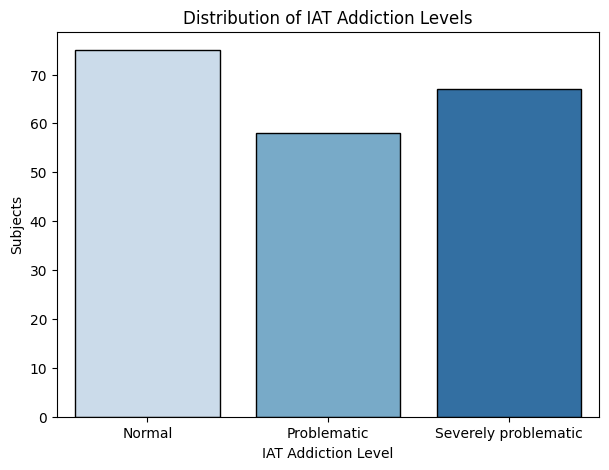

Normal                  75
Severely problematic    67
Problematic             58
Name: count, dtype: int64


In [26]:
categories = [
    "Normal" if score < 40 else
    "Problematic" if score < 70 else
    "Severely problematic"
    for score in df_simplified['iat_total']
]

plt.figure(figsize=(7, 5))
sns.countplot(x=pd.Series(categories), palette='Blues', edgecolor='black')
plt.xlabel('IAT Addiction Level')
plt.ylabel('Subjects')
plt.title('Distribution of IAT Addiction Levels')
plt.show()

# Print the counts for each category
print(pd.Series(categories).value_counts())

#### AUDIT

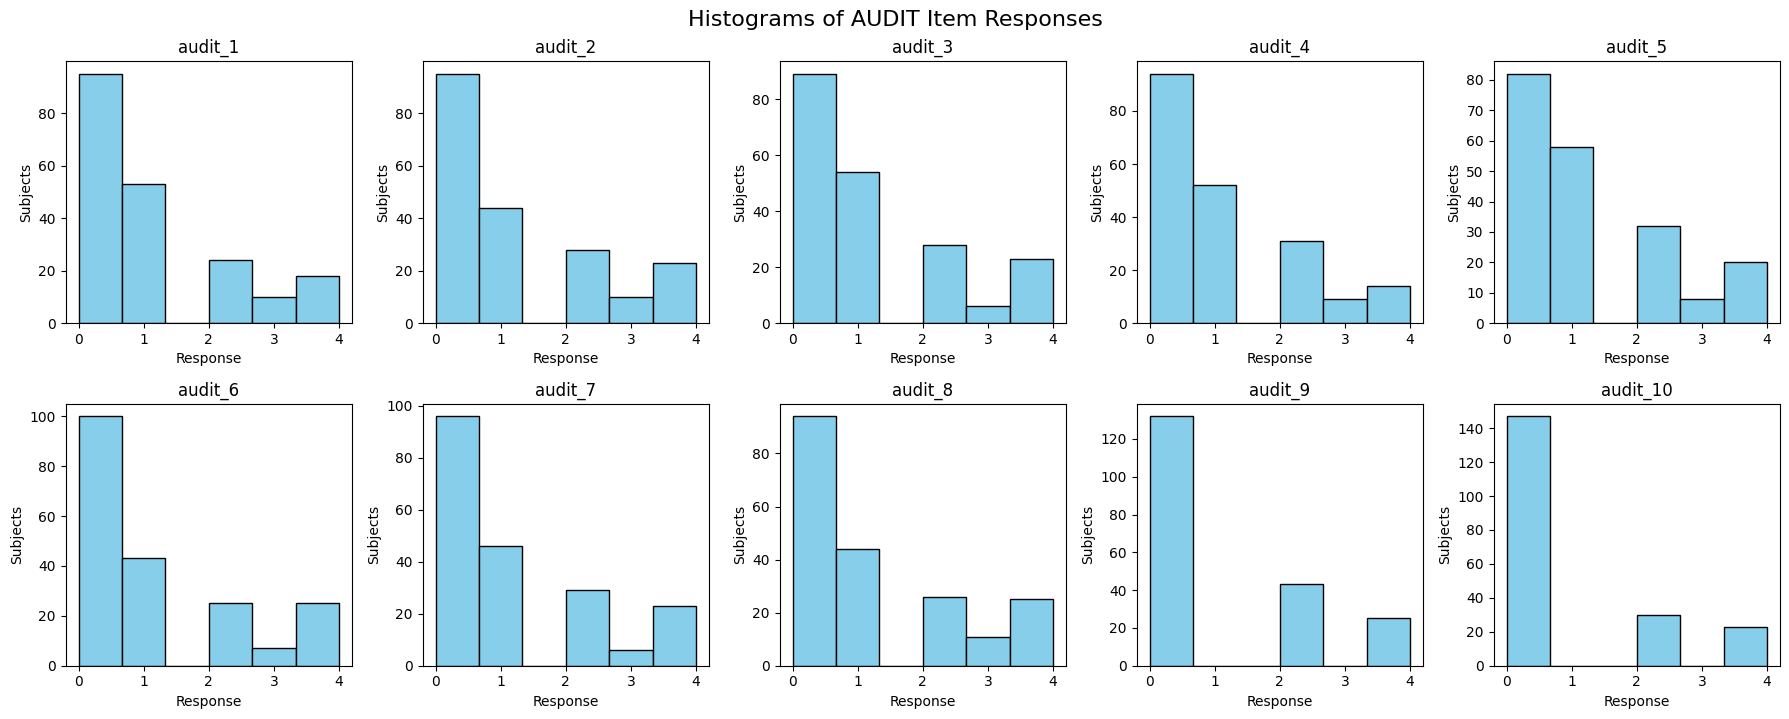

In [27]:
# Select only AUDIT columns
audit_item_cols = [f"audit_{i}" for i in range(1, 11)]
df_audit = df_simplified[audit_item_cols]  # or new_df if not already simplified

# Plot
n_items = len(audit_item_cols)
n_rows, n_cols = 2, 5  # 10 items: 2 rows x 5 columns grid

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 7))
axes = axes.flatten()
# Histograms for each AUDIT item
for idx, col in enumerate(audit_item_cols):
    axes[idx].hist(df_audit[col], bins=6, color='skyblue', edgecolor='black')
    axes[idx].set_title(f"{col}")
    axes[idx].set_xlabel("Response")
    axes[idx].set_ylabel("Subjects")
# Hide unused axes if any
for ax in axes[n_items:]:
    ax.set_visible(False)

plt.tight_layout()
plt.suptitle("Histograms of AUDIT Item Responses", fontsize=16, y=1.02)
plt.show()


In [28]:
df_audit.describe()

,audit_1,audit_2,audit_3,audit_4,audit_5,audit_6,audit_7,audit_8,audit_9,audit_10
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,1.015000,1.110000,1.100000,0.985000,1.130000,1.070000,1.070000,1.145000,0.930000,0.760000
std,1.269976,1.359094,1.318595,1.200827,1.273266,1.376435,1.335672,1.390555,1.416025,1.368122
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [29]:
c_alpha_audit = cronbach_alpha(df_audit)
print(f"Cronbach_alpha value: {c_alpha_audit:.4f}")

Cronbach_alpha value: 0.9121


AUDIT items show a full range of responses, with means clustered around 1 and moderate variability. Most medians are 1 or less, consistent with population-level drinking patterns. The Cronbach's alpha is 0.91, indicating high internal consistency and supporting the use of the total score for further analysis.

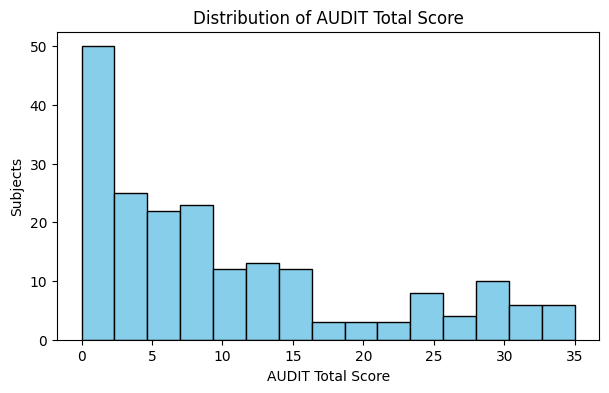

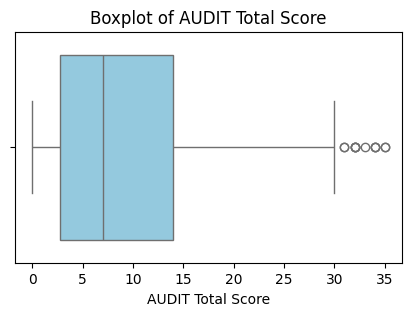

AUDIT total score summary statistics:
count    200.000000
mean      10.315000
std        9.970599
min        0.000000
25%        2.750000
50%        7.000000
75%       14.000000
max       35.000000
Name: audit_total, dtype: float64
Shapiro-Wilk test statistic: 0.8572
P-value: 0.0000
The AUDIT total score distribution significantly deviates from normality.


In [30]:
# Compute the total AUDIT score
df_simplified['audit_total'] = df_simplified[audit_item_cols].sum(axis=1)

# Visualize histogram of AUDIT total score
plt.figure(figsize=(7, 4))
plt.hist(df_simplified['audit_total'], bins=15, color='skyblue', edgecolor='black')
plt.xlabel("AUDIT Total Score")
plt.ylabel("Subjects")
plt.title("Distribution of AUDIT Total Score")
plt.show()

# Visualize boxplot of AUDIT total score
plt.figure(figsize=(5, 3))
sns.boxplot(x=df_simplified['audit_total'], color='skyblue')
plt.xlabel("AUDIT Total Score")
plt.title("Boxplot of AUDIT Total Score")
plt.show()

# Summary statistics
print("AUDIT total score summary statistics:")
print(df_simplified['audit_total'].describe())

# Shapiro-Wilk test for normality
stat, p_value = shapiro(df_simplified['audit_total'])
print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The AUDIT total score distribution is compatible with normality.")
else:
    print("The AUDIT total score distribution significantly deviates from normality.")

# Drop all AUDIT item columns from the DataFrame
df_simplified = df_simplified.drop(columns=audit_item_cols)

The AUDIT total score demonstrates a wide range in your sample, with scores spanning from 0 to 35 and a mean of 10.3. The boxplot and histogram show a strongly right-skewed, non-normal distribution—which is confirmed by the Shapiro-Wilk test (statistic = 0.86, p < 0.0001). Given this significant deviation from normality, non-parametric statistical methods are recommended for analyses involving the AUDIT total score.

AUDIT_total showed high-end outliers (beyond Q3+1.5·IQR). As these reflect clinically relevant heavy drinking, we retained them and applied robust/non‑parametric analyses.

For the AUDIT scale, the most commonly used cut-offs are:
- Low risk: AUDIT total < 8
- Hazardous/harmful: 8 ≤ AUDIT total < 16
- Possible dependence: AUDIT total ≥ 16

/var/folders/03/kf4b2yc11090vt24qbw0y5y00000gn/T/ipykernel_57106/2498645151.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categories_series, palette=sns.color_palette("Blues", n_colors=3), edgecolor='black')


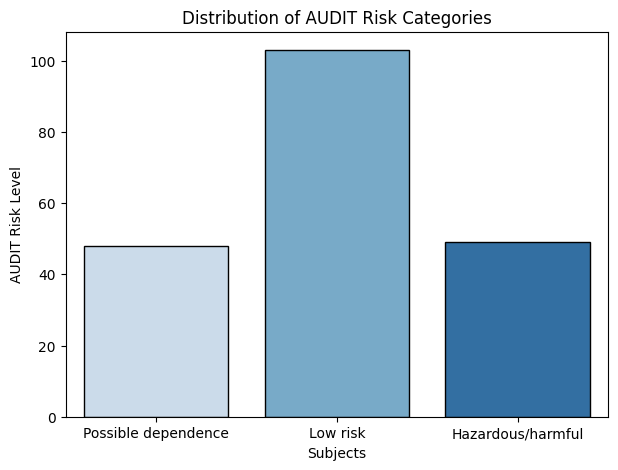

Low risk               103
Hazardous/harmful       49
Possible dependence     48
Name: count, dtype: int64


In [31]:
categories = [
    "Low risk" if score < 8 else
    "Hazardous/harmful" if score < 16 else
    "Possible dependence"
    for score in df_simplified['audit_total']
]

categories_series = pd.Series(categories, name='AUDIT Risk Level')

plt.figure(figsize=(7, 5))
sns.countplot(x=categories_series, palette=sns.color_palette("Blues", n_colors=3), edgecolor='black')
plt.xlabel('Subjects')
plt.ylabel('AUDIT Risk Level')
plt.title('Distribution of AUDIT Risk Categories')
plt.show()

# Print the counts for each category
print(pd.Series(categories).value_counts())


#### DAST

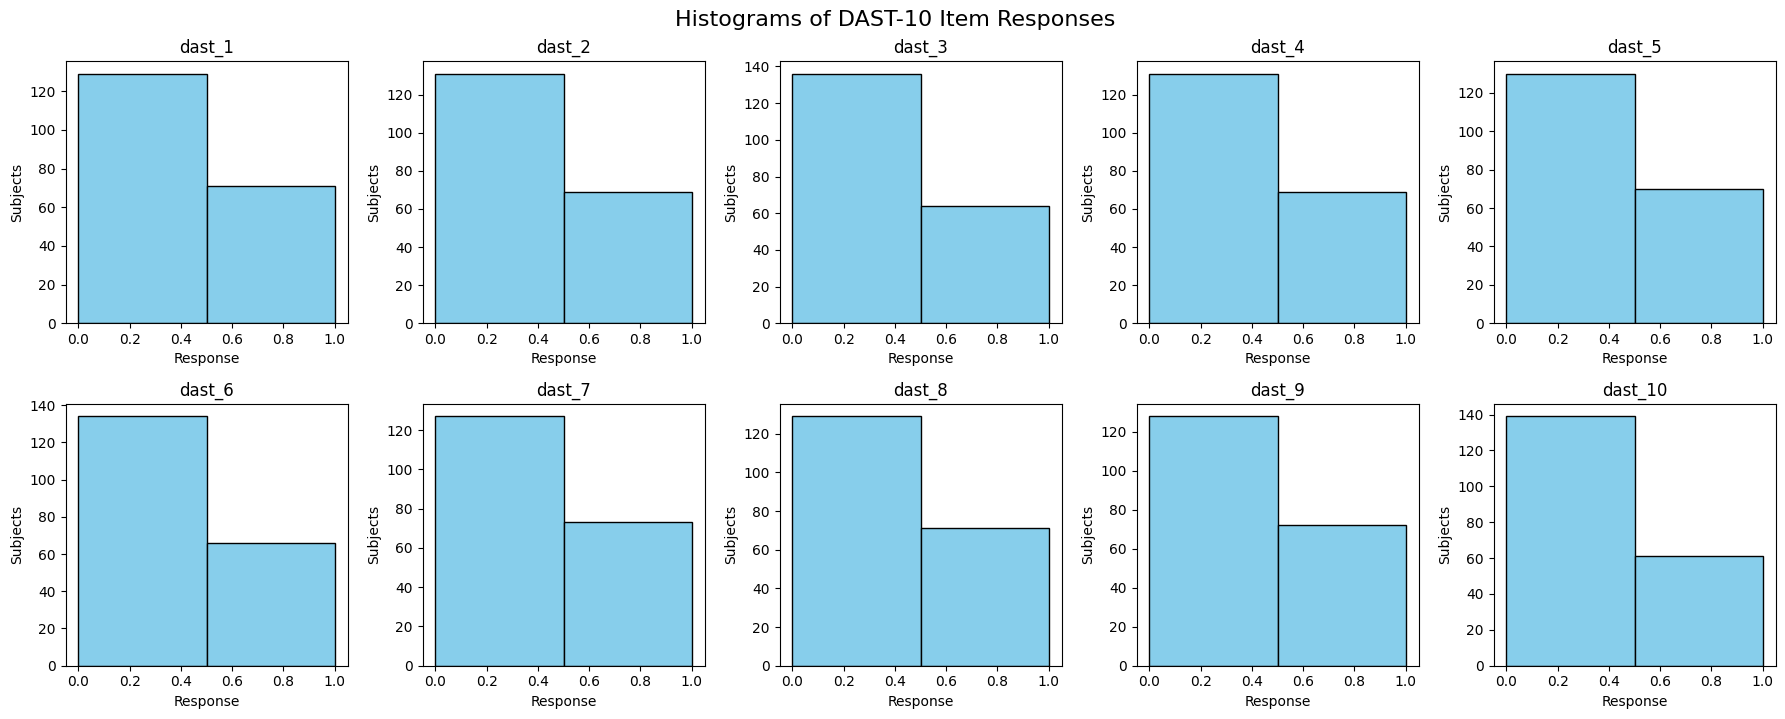

In [32]:
# Select only DAST-10 item columns
dast_item_cols = [f"dast_{i}" for i in range(1, 11)]
df_dast = df_simplified[dast_item_cols]  # or new_df if not already simplified

# Plot setup
n_items = len(dast_item_cols)
n_rows, n_cols = 2, 5  # 10 items: 2 rows x 5 columns grid

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 7))
axes = axes.flatten()

# Histograms for each DAST item
for idx, col in enumerate(dast_item_cols):
    axes[idx].hist(df_dast[col], bins=2, color='skyblue', edgecolor='black')  # DAST items are 0/1
    axes[idx].set_title(f"{col}")
    axes[idx].set_xlabel("Response")
    axes[idx].set_ylabel("Subjects")
# Hide unused axes if any
for ax in axes[n_items:]:
    ax.set_visible(False)

plt.tight_layout()
plt.suptitle("Histograms of DAST-10 Item Responses", fontsize=16, y=1.02)
plt.show()


In [33]:
df_dast.describe()

,dast_1,dast_2,dast_3,dast_4,dast_5,dast_6,dast_7,dast_8,dast_9,dast_10
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.355000,0.345000,0.320000,0.345000,0.350000,0.330000,0.365000,0.355000,0.360000,0.305000
std,0.479714,0.476561,0.467647,0.476561,0.478167,0.471393,0.482638,0.479714,0.481205,0.461563
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
c_alpha_dast = cronbach_alpha(df_dast)
print(f"Cronbach_alpha value: {c_alpha_dast:.4f}")

Cronbach_alpha value: 0.8584


DAST-10 items show balanced use of the binary response options, with means around 0.3–0.37 and interquartile ranges from 0 to 1 for all items. This indicates that each question contributes information about the presence or absence of drug-related problems across participants. The Cronbach’s alpha of 0.91 demonstrates excellent internal consistency, consistent with published DAST-10 psychometric studies, and supports using the summed DAST-10 total score as a reliable indicator of drug abuse severity in subsequent analyses.

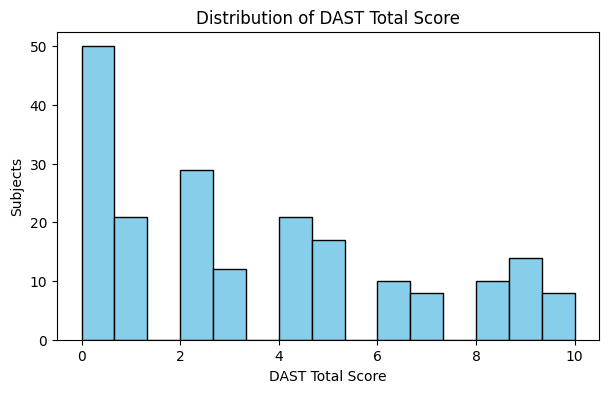

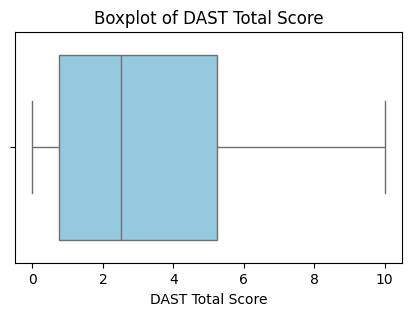

DAST total score summary statistics:
count    200.000000
mean       3.430000
std        3.153542
min        0.000000
25%        0.750000
50%        2.500000
75%        5.250000
max       10.000000
Name: dast_total, dtype: float64
Shapiro-Wilk test statistic: 0.8869
P-value: 0.0000
The DAST total score distribution significantly deviates from normality.


In [35]:
# Compute the total DAST score
df_simplified['dast_total'] = df_simplified[dast_item_cols].sum(axis=1)

# Visualize histogram of DAST total score
plt.figure(figsize=(7, 4))
plt.hist(df_simplified['dast_total'], bins=15, color='skyblue', edgecolor='black')
plt.xlabel("DAST Total Score")
plt.ylabel("Subjects")
plt.title("Distribution of DAST Total Score")
plt.show()

# Visualize boxplot of DAST total score
plt.figure(figsize=(5, 3))
sns.boxplot(x=df_simplified['dast_total'], color='skyblue')
plt.xlabel("DAST Total Score")
plt.title("Boxplot of DAST Total Score")
plt.show()

# Summary statistics
print("DAST total score summary statistics:")
print(df_simplified['dast_total'].describe())

# Shapiro-Wilk test for normality
stat, p_value = shapiro(df_simplified['dast_total'])
print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The DAST total score distribution is compatible with normality.")
else:
    print("The DAST total score distribution significantly deviates from normality.")

# Drop all DAST item columns from the DataFrame
df_simplified = df_simplified.drop(columns=dast_item_cols)

The DAST total score in your sample ranges from 0 to 10 with a mean of 3.4, indicating generally low-to-moderate levels of drug-related problems. The histogram and boxplot reveal a markedly right-skewed distribution, with many participants scoring near 0 and fewer at higher scores. This visual pattern is confirmed by the Shapiro–Wilk test (statistic = 0.89, p < 0.0001), showing a clear deviation from normality; therefore, non-parametric methods or categorical risk levels are recommended for analyses involving the DAST total score.

Based on the DAST‑10 literature, a common categorization is:​
- 0: No problems
- 1–2: Low level
- 3–5: Moderate level
- ≥6: Severe level

/var/folders/03/kf4b2yc11090vt24qbw0y5y00000gn/T/ipykernel_57106/1651799925.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


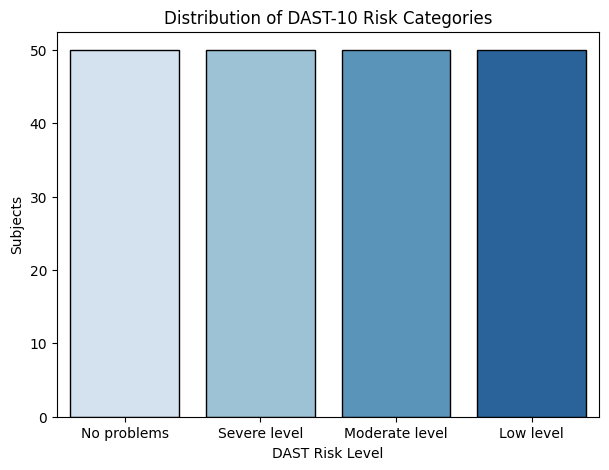

DAST Risk Level
No problems       50
Severe level      50
Moderate level    50
Low level         50
Name: count, dtype: int64


In [36]:
# Create DAST risk categories from total score (0–10)
dast_categories = [
    "No problems" if score == 0 else
    "Low level" if score <= 2 else
    "Moderate level" if score <= 5 else
    "Severe level"
    for score in df_simplified['dast_total']
]

dast_cat_series = pd.Series(dast_categories, name='DAST Risk Level')

plt.figure(figsize=(7, 5))
sns.countplot(
    x=dast_cat_series,
    palette=sns.color_palette("Blues", n_colors=4),
    edgecolor='black'
)
plt.xlabel('DAST Risk Level')
plt.ylabel('Subjects')
plt.title('Distribution of DAST-10 Risk Categories')
plt.show()

print(dast_cat_series.value_counts())


#### PGSI

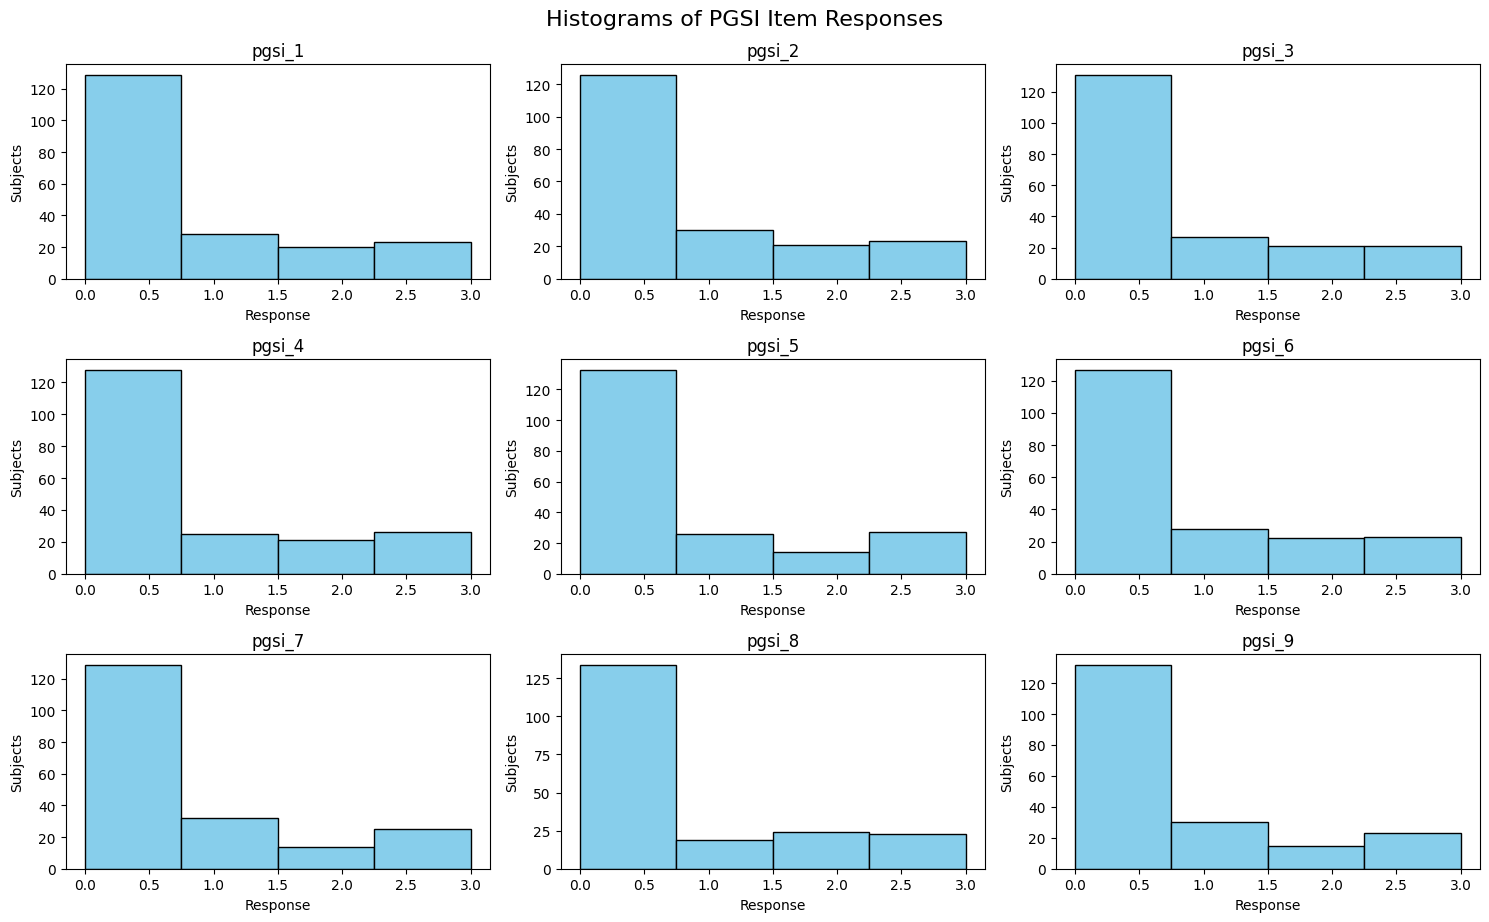

In [37]:
# Select only PGSI item columns (assuming pgsi_1 ... pgsi_9)
pgsi_item_cols = [f"pgsi_{i}" for i in range(1, 10)]
df_pgsi = df_simplified[pgsi_item_cols]  # or new_df if not simplified

# Plot setup
n_items = len(pgsi_item_cols)
n_rows, n_cols = 3, 3  # 9 items: 3 rows x 3 columns grid

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 9))
axes = axes.flatten()

# Histograms for each PGSI item
for idx, col in enumerate(pgsi_item_cols):
    axes[idx].hist(df_pgsi[col], bins=4, color='skyblue', edgecolor='black')  # responses 0–3
    axes[idx].set_title(col)
    axes[idx].set_xlabel("Response")
    axes[idx].set_ylabel("Subjects")

# Hide unused axes if any
for ax in axes[n_items:]:
    ax.set_visible(False)

plt.tight_layout()
plt.suptitle("Histograms of PGSI Item Responses", fontsize=16, y=1.02)
plt.show()


In [38]:
df_pgsi.describe()

,pgsi_1,pgsi_2,pgsi_3,pgsi_4,pgsi_5,pgsi_6,pgsi_7,pgsi_8,pgsi_9
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,0.685000,0.705000,0.660000,0.725000,0.67500,0.705000,0.675000,0.680000,0.645000
std,1.054197,1.055245,1.034287,1.093321,1.08409,1.059997,1.055912,1.073949,1.036507
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
max,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000


In [39]:
c_alpha_pgsi = cronbach_alpha(df_pgsi)
print(f"Cronbach_alpha value: {c_alpha_pgsi:.4f}")

Cronbach_alpha value: 0.8935


The PGSI items display the expected skewed pattern for problem gambling screens: most responses cluster at 0, with progressively fewer endorsements of higher categories (1–3). Item means are all below 1, and quartiles show that at least half of the sample scores 0 on every item, indicating that gambling-related problems are relatively infrequent in this dataset. The Cronbach’s alpha of 0.91 reflects excellent internal consistency, consistent with published PGSI psychometric studies, supporting the use of the summed PGSI total score as a reliable measure of gambling problem severity in subsequent analyses.​

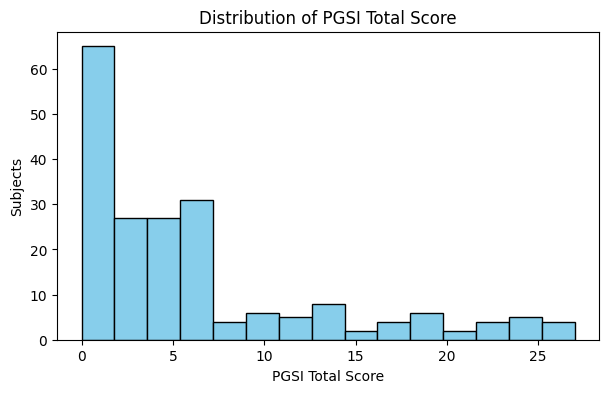

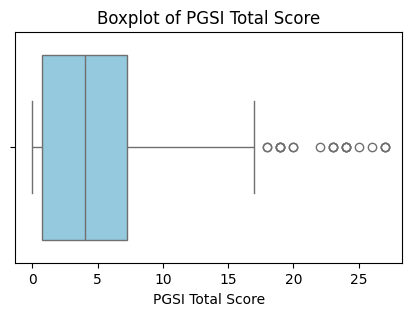

PGSI total score summary statistics:
count    200.000000
mean       6.155000
std        7.018352
min        0.000000
25%        0.750000
50%        4.000000
75%        7.250000
max       27.000000
Name: pgsi_total, dtype: float64
Shapiro-Wilk test statistic: 0.8101
P-value: 0.0000
The PGSI total score distribution significantly deviates from normality.


In [40]:
# Compute the total PGSI score
df_simplified['pgsi_total'] = df_simplified[pgsi_item_cols].sum(axis=1)

# Visualize histogram of PGSI total score
plt.figure(figsize=(7, 4))
plt.hist(df_simplified['pgsi_total'], bins=15, color='skyblue', edgecolor='black')
plt.xlabel("PGSI Total Score")
plt.ylabel("Subjects")
plt.title("Distribution of PGSI Total Score")
plt.show()

# Visualize boxplot of PGSI total score
plt.figure(figsize=(5, 3))
sns.boxplot(x=df_simplified['pgsi_total'], color='skyblue')
plt.xlabel("PGSI Total Score")
plt.title("Boxplot of PGSI Total Score")
plt.show()

# Summary statistics
print("PGSI total score summary statistics:")
print(df_simplified['pgsi_total'].describe())

# Shapiro-Wilk test for normality
stat, p_value = shapiro(df_simplified['pgsi_total'])
print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The PGSI total score distribution is compatible with normality.")
else:
    print("The PGSI total score distribution significantly deviates from normality.")

# Drop all PGSI item columns from the DataFrame
df_simplified = df_simplified.drop(columns=pgsi_item_cols)

The PGSI total score shows a broad range from 0 to 27, with a mean of 6.2 and an interquartile range roughly between 1 and 7.3. The histogram and boxplot indicate a strongly right-skewed distribution with many low scores and a tail of higher scores, including several outliers at the upper end. The Shapiro–Wilk test (statistic = 0.81, p < 0.0001) confirms a clear deviation from normality, so non-parametric methods or PGSI risk categories should be used for subsequent analyses involving this total score.

PGSI_total shows several high values flagged as outliers by the IQR rule. Since these represent genuine high‑risk gamblers, and are theoretically important for building distinct personas, we decided to keep them and rely on robust / non‑parametric analyses when necessary.

For PGSI, standard risk categories are:
- 0: Non‑problem gambling
- 1–2: Low risk
- 3–7: Moderate risk
- ≥8: Problem gambling

/var/folders/03/kf4b2yc11090vt24qbw0y5y00000gn/T/ipykernel_57106/3790844576.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


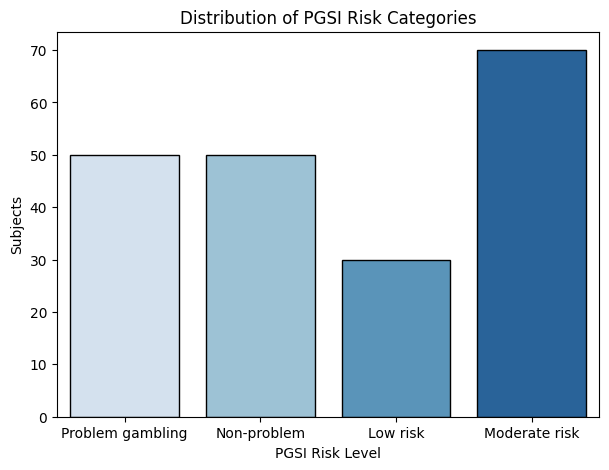

PGSI Risk Level
Moderate risk       70
Problem gambling    50
Non-problem         50
Low risk            30
Name: count, dtype: int64


In [41]:
# Create PGSI risk categories from total score (0–27)
pgsi_categories = [
    "Non-problem" if score == 0 else
    "Low risk" if score <= 2 else
    "Moderate risk" if score <= 7 else
    "Problem gambling"
    for score in df_simplified['pgsi_total']
]

pgsi_cat_series = pd.Series(pgsi_categories, name='PGSI Risk Level')

plt.figure(figsize=(7, 5))
sns.countplot(
    x=pgsi_cat_series,
    palette=sns.color_palette("Blues", n_colors=4),
    edgecolor='black'
)
plt.xlabel('PGSI Risk Level')
plt.ylabel('Subjects')
plt.title('Distribution of PGSI Risk Categories')
plt.show()

print(pgsi_cat_series.value_counts())

#### PCL5

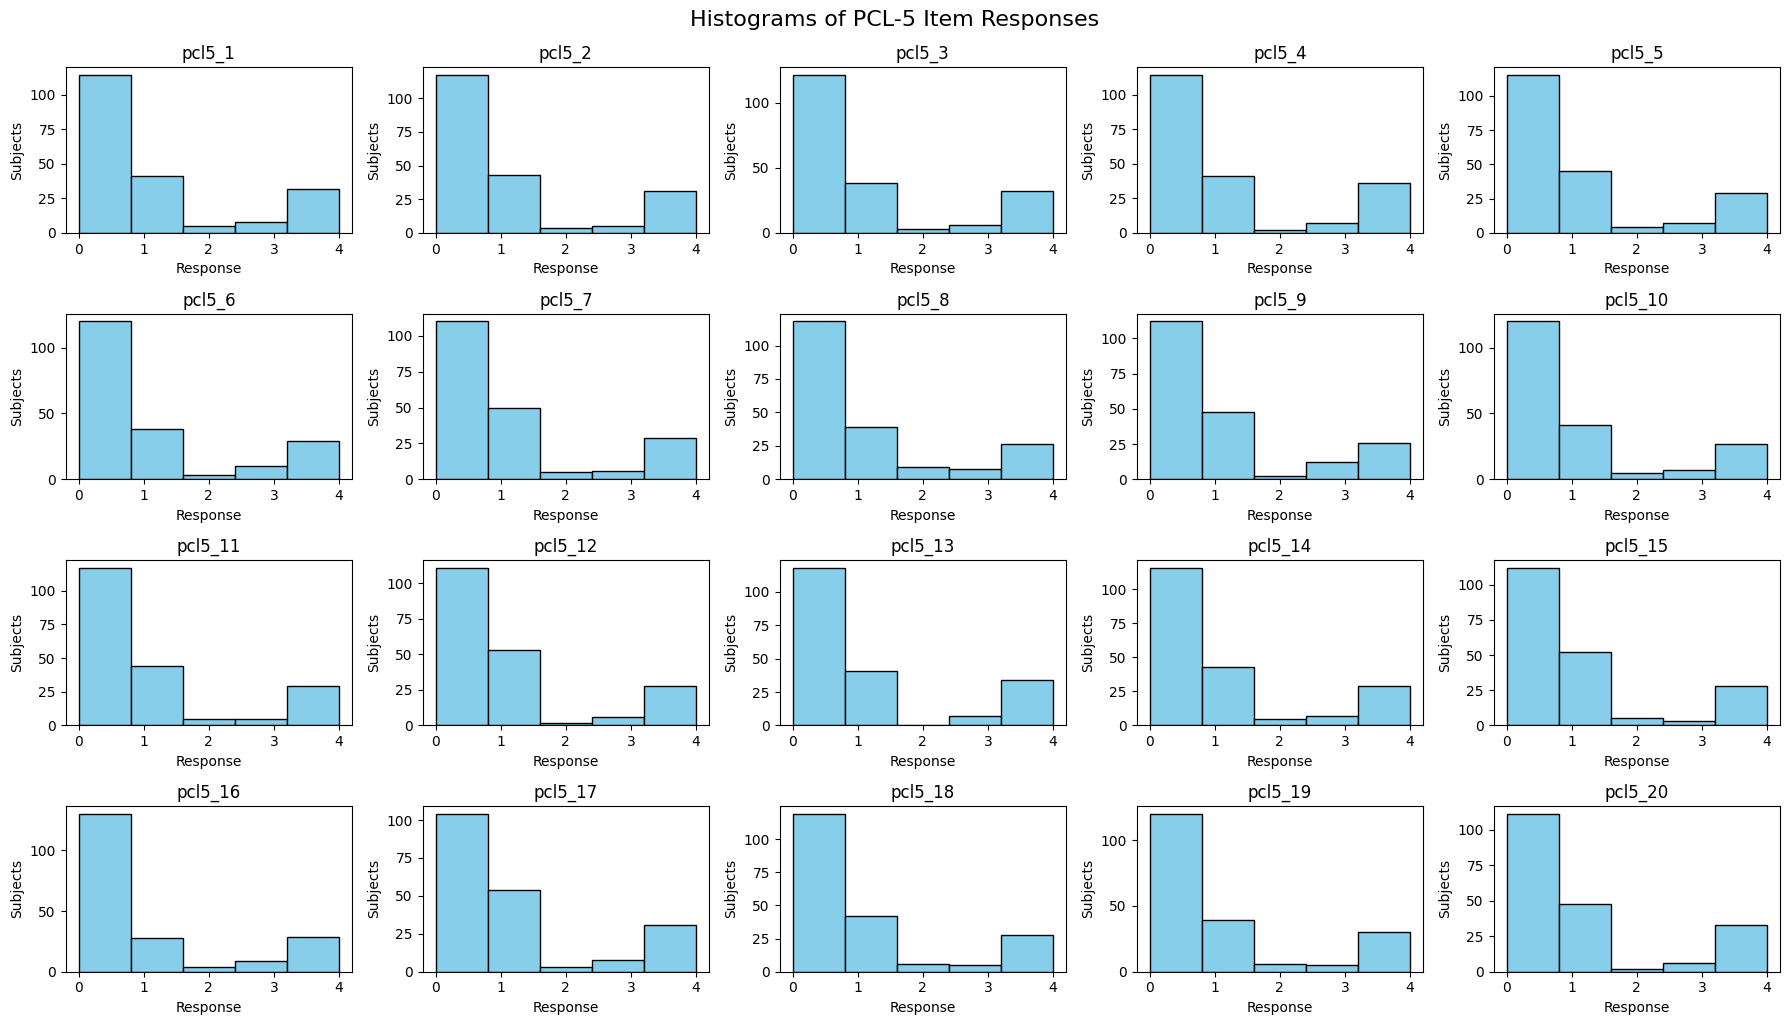

In [42]:
# Select only PCL-5 item columns
pcl5_item_cols = [f"pcl5_{i}" for i in range(1, 21)]
df_pcl5 = df_simplified[pcl5_item_cols]  # or new_df if not simplified

# Plot setup
n_items = len(pcl5_item_cols)
n_rows, n_cols = 4, 5  # 20 items: 4 rows x 5 columns grid

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

# Histograms for each PCL-5 item
for idx, col in enumerate(pcl5_item_cols):
    axes[idx].hist(df_pcl5[col], bins=5, color='skyblue', edgecolor='black')  # responses 0–4
    axes[idx].set_title(col)
    axes[idx].set_xlabel("Response")
    axes[idx].set_ylabel("Subjects")

# Hide unused axes if any
for ax in axes[n_items:]:
    ax.set_visible(False)

plt.tight_layout()
plt.suptitle("Histograms of PCL-5 Item Responses", fontsize=16, y=1.02)
plt.show()

In [43]:
# Descriptive statistics
print(df_pcl5.describe())

           pcl5_1      pcl5_2      pcl5_3      pcl5_4      pcl5_5      pcl5_6  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean     1.015000    0.950000    0.950000    1.050000    0.950000    0.950000   
std      1.485195    1.451909    1.479338    1.532725    1.430992    1.458815   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      4.000000    4.000000    4.000000    4.000000    4.000000    4.000000   

           pcl5_7      pcl5_8      pcl5_9     pcl5_10     pcl5_11     pcl5_12  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean     0.970000    0.925000    0.960000    0.900000    0.925000    0.935000   
std      1.417443    1.4032

In [44]:
# Cronbach's alpha for PCL-5
c_alpha_pcl5 = cronbach_alpha(df_pcl5)
print(f"Cronbach_alpha value: {c_alpha_pcl5:.4f}")

Cronbach_alpha value: 0.9817


PCL‑5 items show that most people in the sample chose 0 (“Not at all”) on each PCL‑5 item, and fewer people chose higher scores from 1 to 4. The average score for every item is around 1, and at least half of the participants scored 0 on each question. The Cronbach’s alpha of 0.98 shows that the 20 items are extremely consistent with each other, so the PCL‑5 total score is a very reliable measure of PTSD symptoms in this dataset, supporting the use of the summed PCL‑5 total score. 

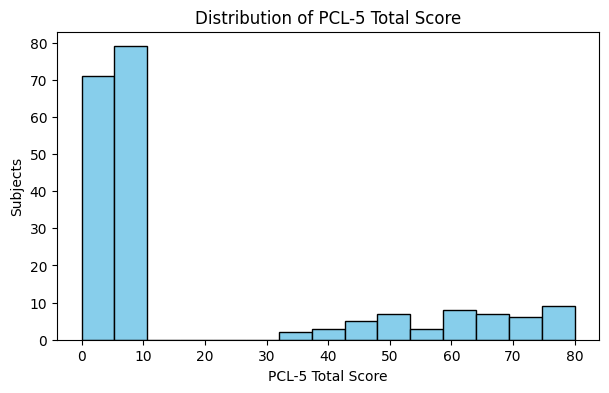

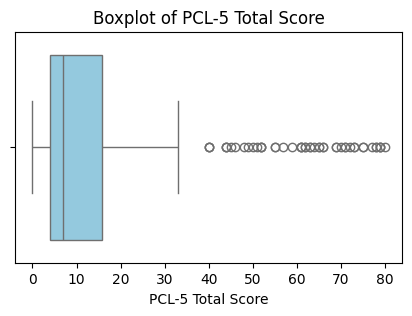

PCL-5 total score summary statistics:
count    200.000000
mean      19.115000
std       24.882877
min        0.000000
25%        4.000000
50%        7.000000
75%       15.750000
max       80.000000
Name: pcl5_total, dtype: float64
Shapiro-Wilk test statistic: 0.6864
P-value: 0.0000
The PCL-5 total score distribution significantly deviates from normality.


In [45]:
# Compute the total PCL-5 score
df_simplified['pcl5_total'] = df_simplified[pcl5_item_cols].sum(axis=1)

# Visualize histogram of PCL-5 total score
plt.figure(figsize=(7, 4))
plt.hist(df_simplified['pcl5_total'], bins=15, color='skyblue', edgecolor='black')
plt.xlabel("PCL-5 Total Score")
plt.ylabel("Subjects")
plt.title("Distribution of PCL-5 Total Score")
plt.show()

# Visualize boxplot of PCL-5 total score
plt.figure(figsize=(5, 3))
sns.boxplot(x=df_simplified['pcl5_total'], color='skyblue')
plt.xlabel("PCL-5 Total Score")
plt.title("Boxplot of PCL-5 Total Score")
plt.show()

# Summary statistics
print("PCL-5 total score summary statistics:")
print(df_simplified['pcl5_total'].describe())

# Shapiro-Wilk test for normality
stat, p_value = shapiro(df_simplified['pcl5_total'])
print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The PCL-5 total score distribution is compatible with normality.")
else:
    print("The PCL-5 total score distribution significantly deviates from normality.")

# Drop all PCL-5 item columns from the DataFrame
df_simplified = df_simplified.drop(columns=pcl5_item_cols)


The PCL‑5 total scores range from 0 to 80, with an average of about 19 points, so most people report relatively low to moderate PTSD symptoms. The histogram and boxplot show a right‑skewed pattern: many participants score in the low range, while a smaller group has very high scores, creating a long tail and many outliers. The Shapiro–Wilk test (statistic = 0.69, p < 0.0001) confirms that the PCL‑5 total score is far from normally distributed, so non‑parametric methods or the recommended clinical cut‑off (for example, ≥33 as “probable PTSD”) should be used instead of tests that assume normality.

Each of the 20 items is scored 0–4 and summed to a total score from 0 to 80.​

A total score of 33 or higher is commonly used as a provisional PTSD diagnosis cut-off (i.e., “likely PTSD” vs “below threshold”).

/var/folders/03/kf4b2yc11090vt24qbw0y5y00000gn/T/ipykernel_57106/2980194543.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


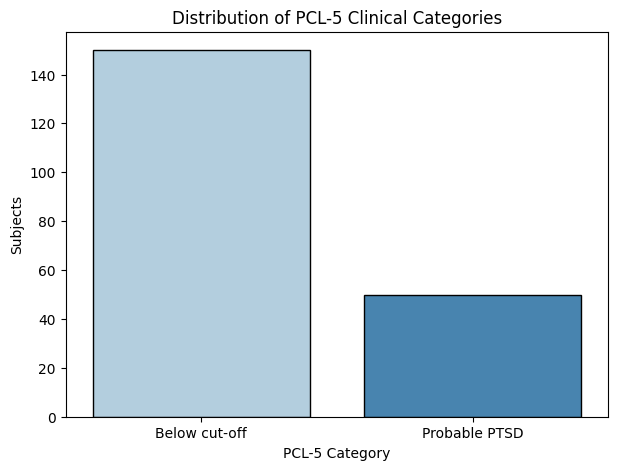

PCL-5 Category
Below cut-off    150
Probable PTSD     50
Name: count, dtype: int64


In [46]:
# PCL-5 categories based on total score (0–80)
pcl5_categories = [
    "Below cut-off" if score < 33 else
    "Probable PTSD"
    for score in df_simplified['pcl5_total']
]

pcl5_cat_series = pd.Series(pcl5_categories, name='PCL-5 Category')

plt.figure(figsize=(7, 5))
sns.countplot(
    x=pcl5_cat_series,
    palette=sns.color_palette("Blues", n_colors=2),
    edgecolor='black'
)
plt.xlabel('PCL-5 Category')
plt.ylabel('Subjects')
plt.title('Distribution of PCL-5 Clinical Categories')
plt.show()

print(pcl5_cat_series.value_counts())

#### MSPSS

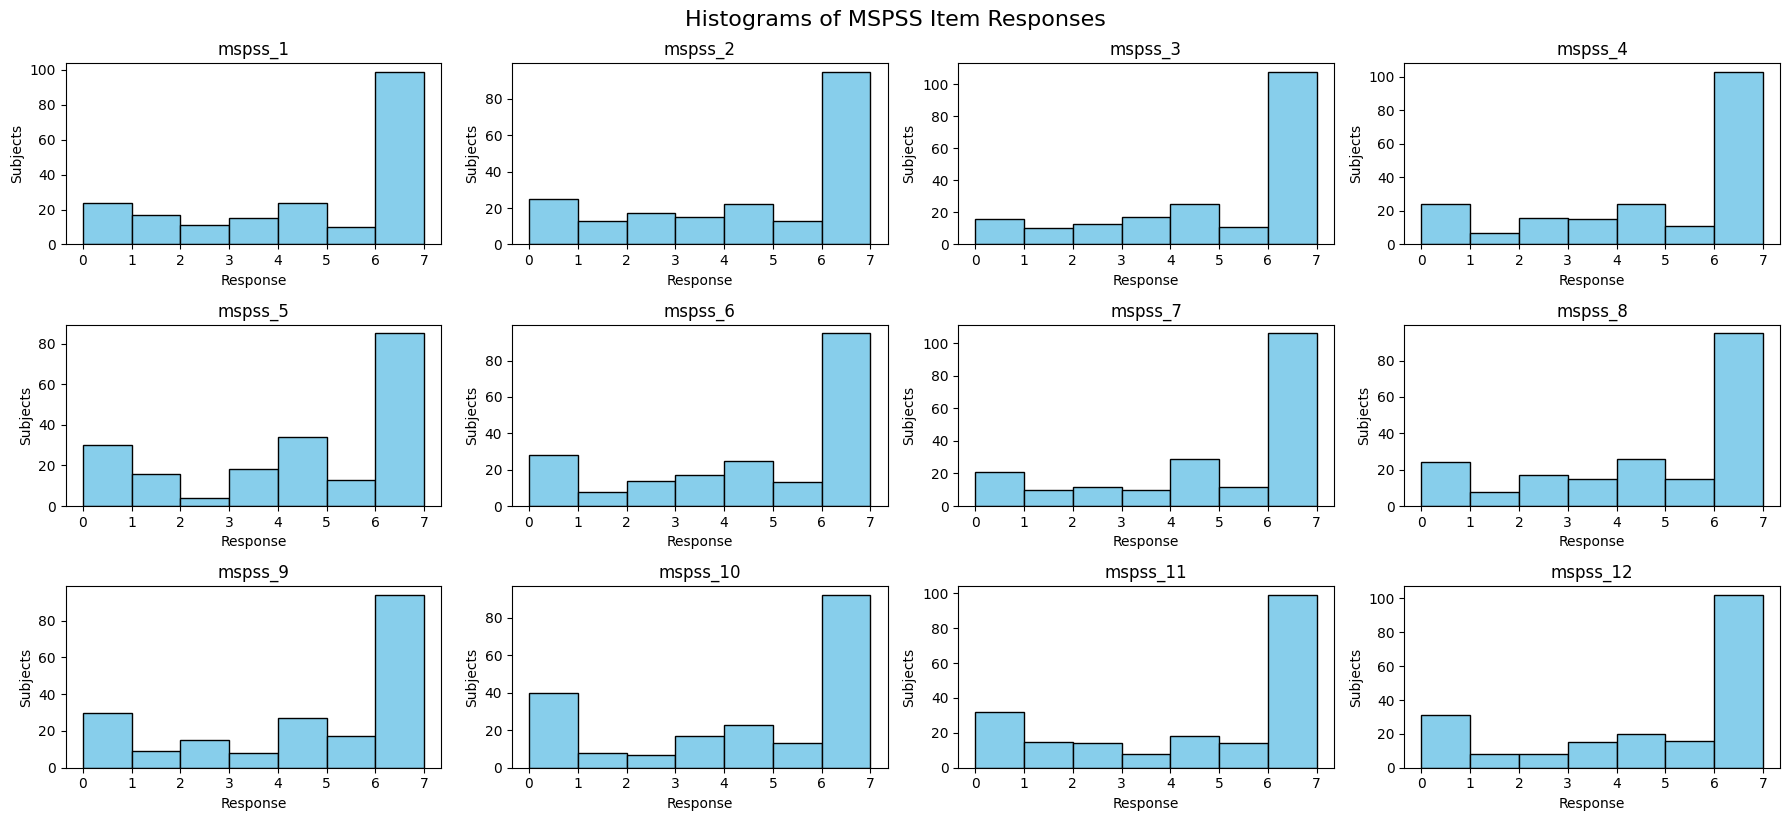

In [47]:
# Select only MSPSS item columns
mspss_item_cols = [f"mspss_{i}" for i in range(1, 13)]
df_mspss = df_simplified[mspss_item_cols]  # or new_df if not simplified

# Plot setup
n_items = len(mspss_item_cols)
n_rows, n_cols = 3, 4  # 12 items: 3 rows x 4 columns grid

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 8))
axes = axes.flatten()

# Histograms for each MSPSS item
for idx, col in enumerate(mspss_item_cols):
    axes[idx].hist(df_mspss[col], bins=7, color='skyblue', edgecolor='black')  # responses 1–7
    axes[idx].set_title(col)
    axes[idx].set_xlabel("Response")
    axes[idx].set_ylabel("Subjects")

# Hide unused axes if any
for ax in axes[n_items:]:
    ax.set_visible(False)

plt.tight_layout()
plt.suptitle("Histograms of MSPSS Item Responses", fontsize=16, y=1.02)
plt.show()


In [48]:
# Descriptive statistics
print(df_mspss.describe())

          mspss_1     mspss_2     mspss_3     mspss_4     mspss_5     mspss_6  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean     4.440000    4.380000    4.815000    4.615000    4.192893    4.430000   
std      2.539418    2.525369    2.340548    2.479418    2.504940    2.525269   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000    2.000000    3.000000    3.000000    2.750000    2.750000   
50%      5.000000    5.000000    6.000000    6.000000    4.192893    5.000000   
75%      7.000000    7.000000    7.000000    7.000000    6.000000    7.000000   
max      7.000000    7.000000    7.000000    7.000000    7.000000    7.000000   

          mspss_7     mspss_8     mspss_9    mspss_10    mspss_11    mspss_12  
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000  
mean     4.700000    4.485000    4.420000    4.206030    4.315000    4.530000  
std      2.395557    2.447391 

In [49]:
# Cronbach's alpha for MSPSS
c_alpha_pcl5 = cronbach_alpha(df_mspss)
print(f"Cronbach_alpha value: {c_alpha_pcl5:.4f}")

Cronbach_alpha value: 0.8824


MSPSS item scores are generally in the mid–high range, with medians around 4–6 on the 0–7 scale, indicating moderate to high perceived social support in this sample. Variability is substantial (standard deviations about 2.4–2.7), showing that support levels differ meaningfully across participants. The Cronbach’s alpha of 0.88 indicates good internal consistency, so the MSPSS total (and subscale) scores can be considered reliable measures of perceived social support.

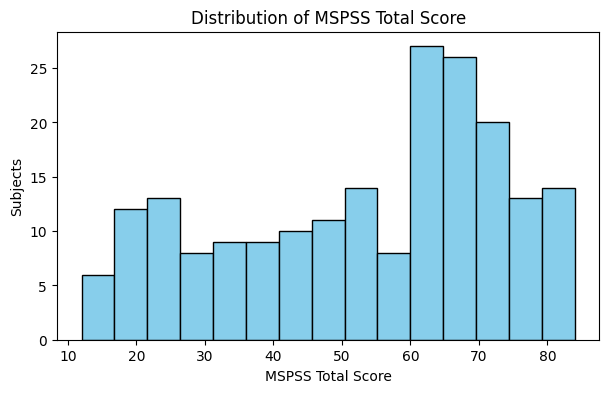

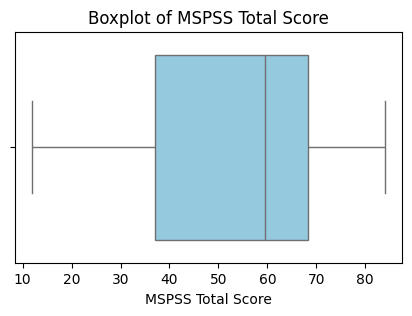

MSPSS total score summary statistics:
count    200.000000
mean      53.528924
std       19.946584
min       12.000000
25%       37.000000
50%       59.500000
75%       68.250000
max       84.000000
Name: mspss_total, dtype: float64
Shapiro-Wilk test statistic: 0.9396
P-value: 0.0000
The MSPSS total score distribution significantly deviates from normality.


In [50]:
# Compute the total MSPSS score
mspss_item_cols = [f"mspss_{i}" for i in range(1, 13)]
df_simplified['mspss_total'] = df_simplified[mspss_item_cols].sum(axis=1)

# Visualize histogram of MSPSS total score
plt.figure(figsize=(7, 4))
plt.hist(df_simplified['mspss_total'], bins=15, color='skyblue', edgecolor='black')
plt.xlabel("MSPSS Total Score")
plt.ylabel("Subjects")
plt.title("Distribution of MSPSS Total Score")
plt.show()

# Visualize boxplot of MSPSS total score
plt.figure(figsize=(5, 3))
sns.boxplot(x=df_simplified['mspss_total'], color='skyblue')
plt.xlabel("MSPSS Total Score")
plt.title("Boxplot of MSPSS Total Score")
plt.show()

# Summary statistics
print("MSPSS total score summary statistics:")
print(df_simplified['mspss_total'].describe())

# Shapiro-Wilk test for normality
stat, p_value = shapiro(df_simplified['mspss_total'])
print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The MSPSS total score distribution is compatible with normality.")
else:
    print("The MSPSS total score distribution significantly deviates from normality.")

# Drop all MSPSS item columns from the DataFrame
df_simplified = df_simplified.drop(columns=mspss_item_cols)


MSPSS total scores range from 12 to 84, with a mean of about 53.5, indicating generally moderate to high perceived social support in this sample. The histogram and boxplot show a right‑skewed distribution, with many participants scoring in the higher support range and fewer at very low scores. The Shapiro–Wilk test (statistic = 0.94, p < 0.001) confirms that the MSPSS total score is not normally distributed, so non‑parametric tests or category-based analyses (low, moderate, high support) are more appropriate than parametric methods that assume normality.​

MSPSS does not have universal clinical cut-offs, but the original guidelines often use three bands based on the mean item score (total score ÷ 12):
- Mean 1–2.9: Low support
- Mean 3–5: Moderate support
- Mean 5.1–7: High support

/var/folders/03/kf4b2yc11090vt24qbw0y5y00000gn/T/ipykernel_57106/1096084786.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


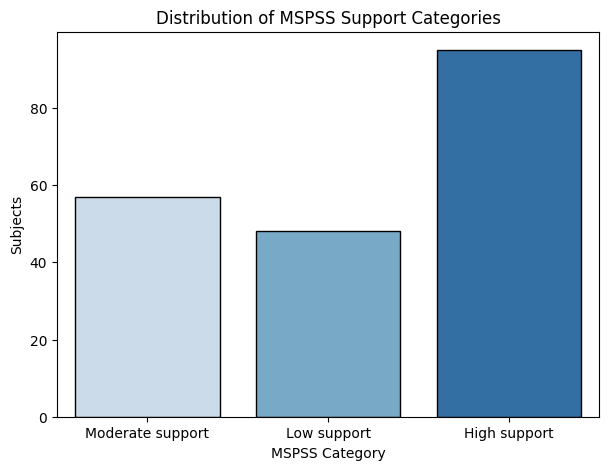

MSPSS Category
High support        95
Moderate support    57
Low support         48
Name: count, dtype: int64


In [51]:
# Compute mean item score
mspss_mean = df_simplified['mspss_total'] / 12.0

# MSPSS categories based on mean item score
mspss_categories = [
    "Low support" if m < 3 else
    "Moderate support" if m <= 5 else
    "High support"
    for m in mspss_mean
]

mspss_cat_series = pd.Series(mspss_categories, name='MSPSS Category')

plt.figure(figsize=(7, 5))
sns.countplot(
    x=mspss_cat_series,
    palette=sns.color_palette("Blues", n_colors=3),
    edgecolor='black'
)
plt.xlabel('MSPSS Category')
plt.ylabel('Subjects')
plt.title('Distribution of MSPSS Support Categories')
plt.show()

print(mspss_cat_series.value_counts())


#### SWLS

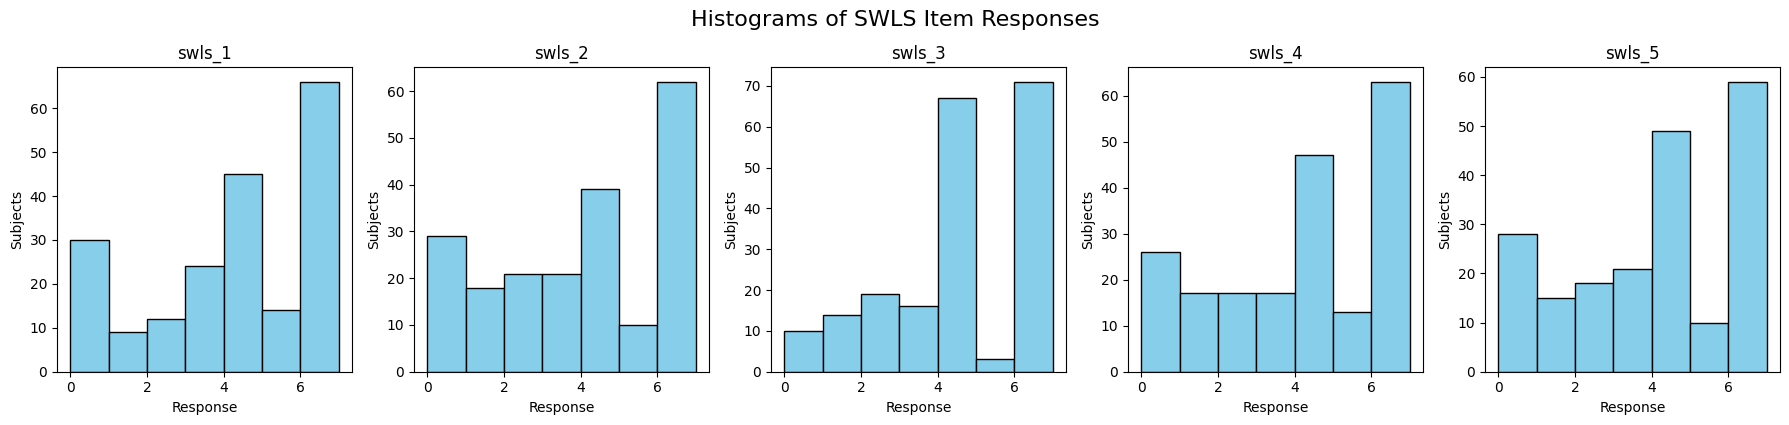

In [52]:
# Select only SWLS item columns
swls_item_cols = [f"swls_{i}" for i in range(1, 6)]
df_swls = df_simplified[swls_item_cols]  # or new_df if not simplified

# Plot setup
n_items = len(swls_item_cols)
n_rows, n_cols = 1, 5  # 5 items: 1 row x 5 columns grid

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4))
axes = axes.flatten()

# Histograms for each SWLS item
for idx, col in enumerate(swls_item_cols):
    axes[idx].hist(df_swls[col], bins=7, color='skyblue', edgecolor='black')  # responses 1–7
    axes[idx].set_title(col)
    axes[idx].set_xlabel("Response")
    axes[idx].set_ylabel("Subjects")

plt.tight_layout()
plt.suptitle("Histograms of SWLS Item Responses", fontsize=16, y=1.05)
plt.show()


In [53]:
# Descriptive statistics
print(df_swls.describe())

          swls_1      swls_2      swls_3      swls_4      swls_5
count  200.00000  200.000000  200.000000  200.000000  200.000000
mean     3.92000    3.658291    4.211055    3.844221    3.740000
std      2.32392    2.366818    2.031332    2.338417    2.327981
min      0.00000    0.000000    0.000000    0.000000    0.000000
25%      2.00000    2.000000    3.000000    2.000000    2.000000
50%      4.00000    4.000000    4.000000    4.000000    4.000000
75%      6.00000    6.000000    6.000000    6.000000    6.000000
max      7.00000    7.000000    7.000000    7.000000    7.000000


In [54]:
# Cronbach's alpha for swls
c_alpha_swls = cronbach_alpha(df_swls)
print(f"Cronbach_alpha value: {c_alpha_pcl5:.4f}")

Cronbach_alpha value: 0.8824


SWLS item scores are mostly in the mid range of the 0–7 scale, with medians of 4 on all items and means between about 3.7 and 4.2. Variation is moderate (standard deviations around 2.0–2.4), indicating meaningful differences in life satisfaction across participants. The Cronbach’s alpha of 0.88 shows good internal consistency, so the SWLS total score can be treated as a reliable measure of overall life satisfaction in this sample.

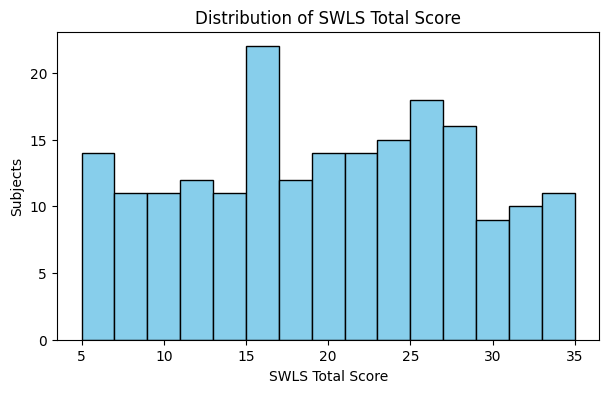

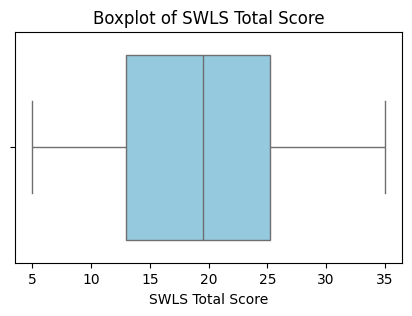

SWLS total score summary statistics:
count    200.000000
mean      19.373568
std        8.329036
min        5.000000
25%       13.000000
50%       19.500000
75%       25.250000
max       35.000000
Name: swls_total, dtype: float64
Shapiro-Wilk test statistic: 0.9669
P-value: 0.0001
The SWLS total score distribution significantly deviates from normality.


In [55]:
# Compute the total SWLS score
df_simplified['swls_total'] = df_simplified[swls_item_cols].sum(axis=1)

# Visualize histogram of SWLS total score
plt.figure(figsize=(7, 4))
plt.hist(df_simplified['swls_total'], bins=15, color='skyblue', edgecolor='black')
plt.xlabel("SWLS Total Score")
plt.ylabel("Subjects")
plt.title("Distribution of SWLS Total Score")
plt.show()

# Visualize boxplot of SWLS total score
plt.figure(figsize=(5, 3))
sns.boxplot(x=df_simplified['swls_total'], color='skyblue')
plt.xlabel("SWLS Total Score")
plt.title("Boxplot of SWLS Total Score")
plt.show()

# Summary statistics
print("SWLS total score summary statistics:")
print(df_simplified['swls_total'].describe())

# Shapiro-Wilk test for normality
stat, p_value = shapiro(df_simplified['swls_total'])
print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The SWLS total score distribution is compatible with normality.")
else:
    print("The SWLS total score distribution significantly deviates from normality.")

# Drop all SWLS item columns from the DataFrame
df_simplified = df_simplified.drop(columns=swls_item_cols)


SWLS total scores range from 5 to 35, with a mean of about 19.4 and an interquartile range from 13 to 25.3, indicating generally moderate levels of life satisfaction in this sample. The histogram and boxplot show a slightly skewed, non-normal distribution, which is confirmed by the Shapiro–Wilk test (statistic = 0.97, p < 0.001); therefore, non-parametric methods or categorical groupings are preferable for analyses involving the SWLS total score.​

For SWLS there are commonly used interpretive bands for the total score (5–35):
- 5–9: Extremely dissatisfied
- 10–14: Dissatisfied
- 15–19: Slightly dissatisfied
- 20–24: Slightly satisfied
- 25–29: Satisfied
- 30–35: Extremely satisfied

/var/folders/03/kf4b2yc11090vt24qbw0y5y00000gn/T/ipykernel_57106/2422952168.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


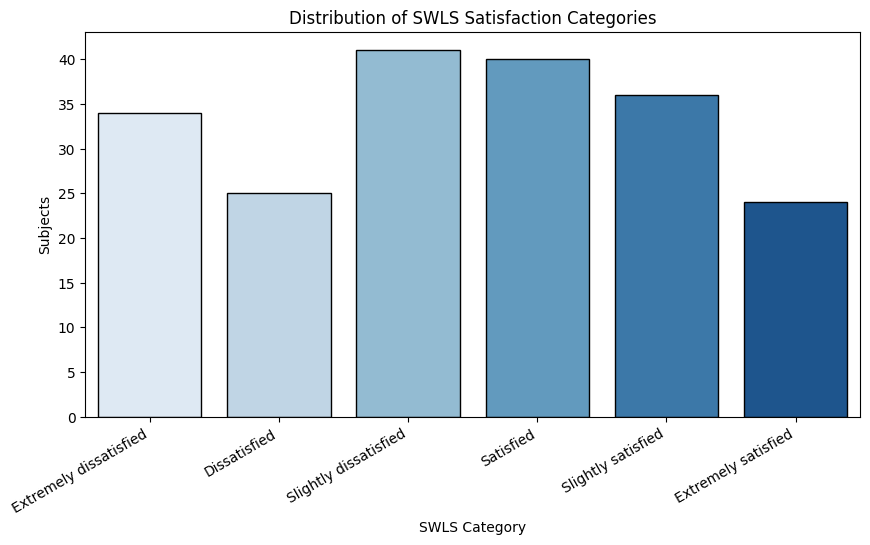

SWLS Category
Slightly dissatisfied     41
Satisfied                 40
Slightly satisfied        36
Extremely dissatisfied    34
Dissatisfied              25
Extremely satisfied       24
Name: count, dtype: int64


In [56]:
# SWLS categories based on total score (5–35)
swls_categories = [
    "Extremely dissatisfied" if s <= 9 else
    "Dissatisfied" if s <= 14 else
    "Slightly dissatisfied" if s <= 19 else
    "Slightly satisfied" if s <= 24 else
    "Satisfied" if s <= 29 else
    "Extremely satisfied"
    for s in df_simplified['swls_total']
]

swls_cat_series = pd.Series(swls_categories, name='SWLS Category')

plt.figure(figsize=(10, 5))
sns.countplot(
    x=swls_cat_series,
    palette=sns.color_palette("Blues", n_colors=6),
    edgecolor='black'
)
plt.xlabel('SWLS Category')
plt.ylabel('Subjects')
plt.title('Distribution of SWLS Satisfaction Categories')
plt.xticks(rotation=30, ha='right')
plt.show()

print(swls_cat_series.value_counts())


#### WHO5

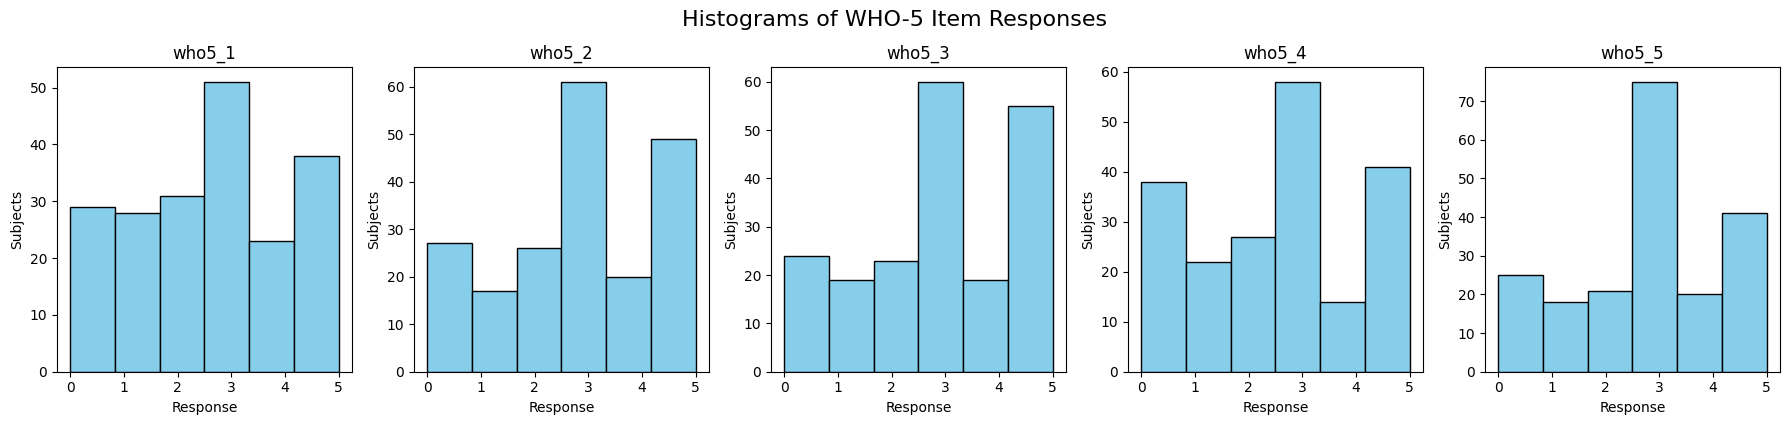

           who5_1     who5_2      who5_3      who5_4      who5_5
count  200.000000  200.00000  200.000000  200.000000  200.000000
mean     2.623116    2.88500    2.979899    2.550505    2.848485
std      1.663582    1.66301    1.668387    1.729140    1.581067
min      0.000000    0.00000    0.000000    0.000000    0.000000
25%      1.000000    2.00000    2.000000    1.000000    2.000000
50%      3.000000    3.00000    3.000000    3.000000    3.000000
75%      4.000000    4.00000    5.000000    4.000000    4.000000
max      5.000000    5.00000    5.000000    5.000000    5.000000
Cronbach_alpha value: 0.6177


In [57]:
# Select only WHO-5 item columns
who5_item_cols = [f"who5_{i}" for i in range(1, 6)]
df_who5 = df_simplified[who5_item_cols]  # or new_df if not simplified

# Plot setup
n_items = len(who5_item_cols)
n_rows, n_cols = 1, 5  # 5 items: 1 row x 5 columns

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4))
axes = axes.flatten()

# Histograms for each WHO-5 item
for idx, col in enumerate(who5_item_cols):
    axes[idx].hist(df_who5[col], bins=6, color='skyblue', edgecolor='black')  # responses 0–5
    axes[idx].set_title(col)
    axes[idx].set_xlabel("Response")
    axes[idx].set_ylabel("Subjects")

plt.tight_layout()
plt.suptitle("Histograms of WHO-5 Item Responses", fontsize=16, y=1.05)
plt.show()

# Descriptive statistics
print(df_who5.describe())

# Cronbach's alpha for WHO-5
c_alpha_who5 = cronbach_alpha(df_who5)
print(f"Cronbach_alpha value: {c_alpha_who5:.4f}")

WHO‑5 item scores cluster around the middle of the 0–5 scale, with medians of 2–3 and means between about 2.6 and 3.0. This indicates moderate levels of positive well‑being, with some participants reporting very low or very high scores. The Cronbach’s alpha of 0.62 reflects moderate internal consistency, which is lower than typical WHO‑5 reports but still suggests that the items measure a common construct, so the total score can be used cautiously as an index of well‑being.​

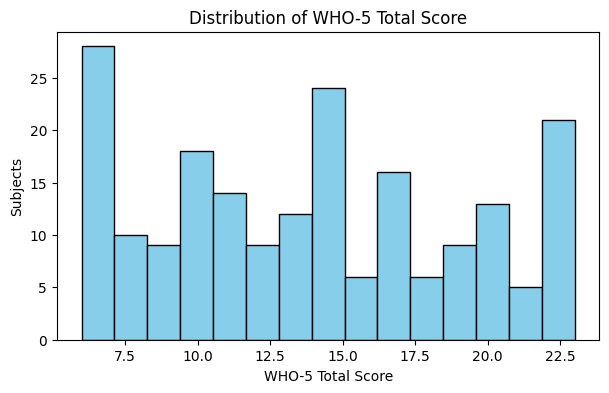

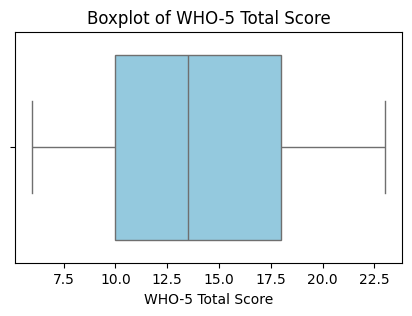

WHO-5 total score summary statistics:
count    200.000000
mean      13.887005
std        5.224884
min        6.000000
25%       10.000000
50%       13.500000
75%       18.000000
max       23.000000
Name: who5_total, dtype: float64
Shapiro-Wilk test statistic: 0.9464
P-value: 0.0000
The WHO-5 total score distribution significantly deviates from normality.


In [58]:
# Compute the total WHO-5 score
df_simplified['who5_total'] = df_simplified[who5_item_cols].sum(axis=1)

# Visualize histogram of WHO-5 total score
plt.figure(figsize=(7, 4))
plt.hist(df_simplified['who5_total'], bins=15, color='skyblue', edgecolor='black')
plt.xlabel("WHO-5 Total Score")
plt.ylabel("Subjects")
plt.title("Distribution of WHO-5 Total Score")
plt.show()

# Visualize boxplot of WHO-5 total score
plt.figure(figsize=(5, 3))
sns.boxplot(x=df_simplified['who5_total'], color='skyblue')
plt.xlabel("WHO-5 Total Score")
plt.title("Boxplot of WHO-5 Total Score")
plt.show()

# Summary statistics
print("WHO-5 total score summary statistics:")
print(df_simplified['who5_total'].describe())

# Shapiro-Wilk test for normality
stat, p_value = shapiro(df_simplified['who5_total'])
print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The WHO-5 total score distribution is compatible with normality.")
else:
    print("The WHO-5 total score distribution significantly deviates from normality.")

# Drop all WHO-5 item columns from the DataFrame
df_simplified = df_simplified.drop(columns=who5_item_cols)


WHO‑5 total scores in your sample range from 6 to 23, with a mean of about 13.9 and an interquartile range from 10 to 18, indicating overall moderate well‑being. The histogram and boxplot show a slightly skewed, non‑normal distribution, which the Shapiro–Wilk test confirms (statistic = 0.95, p < 0.001). Because the distribution significantly deviates from normality, non‑parametric methods and the recommended WHO‑5 cut‑off (<13 vs ≥13) are more appropriate than parametric tests that assume normality.

For the WHO‑5, standard interpretation uses the total raw score (0–25) or the percentage score (0–100) rather than multiple qualitative bands. The core cut-off from the WHO‑5 manual is:
- Raw total < 13 (or percentage < 52): “Possible depression / poor well‑being”, follow‑up recommended.
- Raw total ≥ 13 (percentage ≥ 52): “No indication of depression / acceptable well‑being.”

/var/folders/03/kf4b2yc11090vt24qbw0y5y00000gn/T/ipykernel_57106/1799557976.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


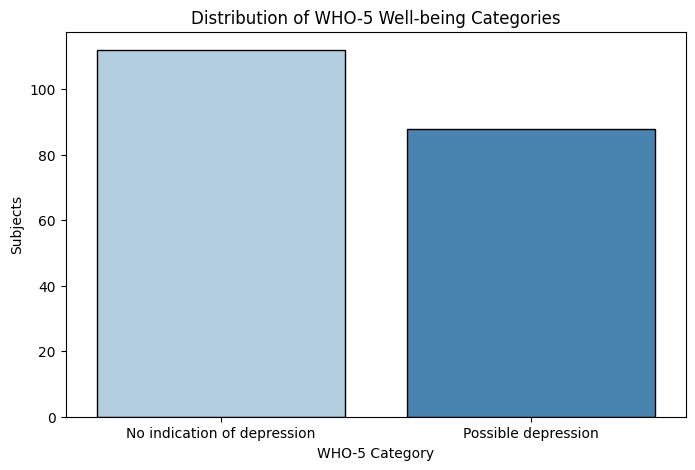

WHO-5 Category
No indication of depression    112
Possible depression             88
Name: count, dtype: int64


In [59]:
# WHO-5 categories based on total score (0–25)
who5_categories = [
    "Possible depression" if s < 13 else
    "No indication of depression"
    for s in df_simplified['who5_total']
]

who5_cat_series = pd.Series(who5_categories, name='WHO-5 Category')

plt.figure(figsize=(8, 5))
sns.countplot(
    x=who5_cat_series,
    palette=sns.color_palette("Blues", n_colors=2),
    edgecolor='black'
)
plt.xlabel('WHO-5 Category')
plt.ylabel('Subjects')
plt.title('Distribution of WHO-5 Well-being Categories')
plt.show()

print(who5_cat_series.value_counts())


In [60]:
df_simplified

,age,gender,education,marital,income,gender_label,school_labels,marital_labels,iat_total,audit_total,dast_total,pgsi_total,pcl5_total,mspss_total,swls_total,who5_total
0,39.0,0,8.0,1.0,14000,Male,Middle,Married,39.000000,25.0,0.0,24.0,0.0,51.0,8.0,13.0
1,18.0,1,5.0,1.0,25000,Female,Elementary,Married,33.000000,16.0,0.0,8.0,6.0,43.0,14.0,7.0
2,40.0,0,13.0,2.0,56000,Male,High,Divorced,60.000000,0.0,7.0,0.0,50.0,18.0,8.0,13.0
3,24.0,1,22.0,0.0,35000,Female,Master,Single,56.000000,7.0,8.0,0.0,63.0,26.0,15.0,11.0
4,19.0,1,22.0,1.0,42000,Female,Master,Married,0.000000,14.0,4.0,1.0,8.0,61.0,27.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,28.0,0,13.0,1.0,36000,Male,High,Married,66.000000,5.0,10.0,0.0,77.0,15.0,9.0,10.0
196,21.0,0,18.0,1.0,38000,Male,Bachelor,Married,68.000000,5.0,8.0,0.0,69.0,35.0,19.0,11.0
197,20.0,1,22.0,4.0,50000,Female,Master,Separated,11.000000,13.0,4.0,3.0,0.0,63.0,29.0,21.0
198,39.0,0,8.0,1.0,22000,Male,Middle,Married,46.000000,15.0,0.0,23.0,8.0,48.0,13.0,6.0


The current working dataset now contains 200 participants and 16 variables: age, gender, education, marital status, income, their corresponding label columns, and the total scores for all psychometric scales (IAT, AUDIT, DAST‑10, PGSI, PCL‑5, MSPSS, SWLS, WHO‑5). This structure is appropriate for moving on to bivariate and multivariate analyses, since all item-level columns have been collapsed into reliable total scores and the key sociodemographic variables are preserved in both numeric and labeled form.

# Bivariate EDA
- Correlations between continuous scales (Spearman if non‑normal) and between each scale and age/income.
- Boxplots or violin plots of key scores by gender, income groups, or other relevant categories.

## Spearman correlation test

The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact monotonic relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Spearman correlation at least as extreme as the one computed from these datasets. Although calculation of the p-value does not make strong assumptions about the distributions underlying the samples, it is only accurate for very large samples (>500 observations).
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html 
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

           var       rho             p    n
0   pcl5_total  0.177373  1.198251e-02  200
3   pgsi_total  0.005296  9.406715e-01  200
2   dast_total -0.002590  9.709631e-01  200
6          age -0.019554  7.834507e-01  200
4   who5_total -0.273688  8.803000e-05  200
5   swls_total -0.283011  4.894189e-05  200
7       income -0.578639  2.865560e-19  200
1  audit_total -0.663856  8.804521e-27  200


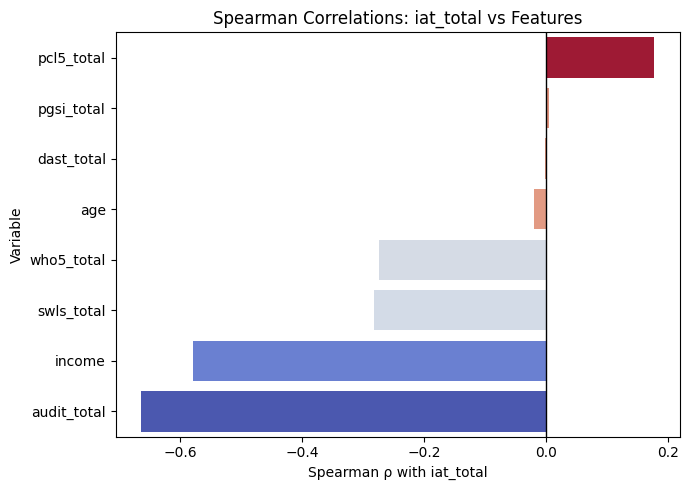

In [61]:
target = "iat_total"
features = [
    "pcl5_total", "audit_total", "dast_total", "pgsi_total",
    "who5_total", "swls_total", "age", "income"
]

rows = []
for var in features:
    valid = df_simplified[[target, var]]
    rho, p = spearmanr(valid[target], valid[var])
    rows.append({"var": var, "rho": rho, "p": p, "n": len(valid)})

spearman_iat = pd.DataFrame(rows).sort_values("rho", ascending=False)
print(spearman_iat)

plt.figure(figsize=(7, 5))
sns.barplot(
    data=spearman_iat,
    x="rho", y="var",
    palette="coolwarm",
    hue="rho", dodge=False, legend=False
)
plt.axvline(0, color="black", linewidth=1)
plt.xlabel("Spearman ρ with iat_total")
plt.ylabel("Variable")
plt.title("Spearman Correlations: iat_total vs Features")
plt.tight_layout()
plt.show()

Strongest links: **audit_total (ρ ≈ −0.66) and income (ρ ≈ −0.58)**: higher IAT with higher alcohol problems and lower income (assuming higher code = higher income).

Moderate: **swls_total and who5_total (ρ ≈ −0.28)**: higher IAT with lower life satisfaction and well‑being.

Weak/none: pcl5_total small positive; pgsi_total, dast_total, age near zero.

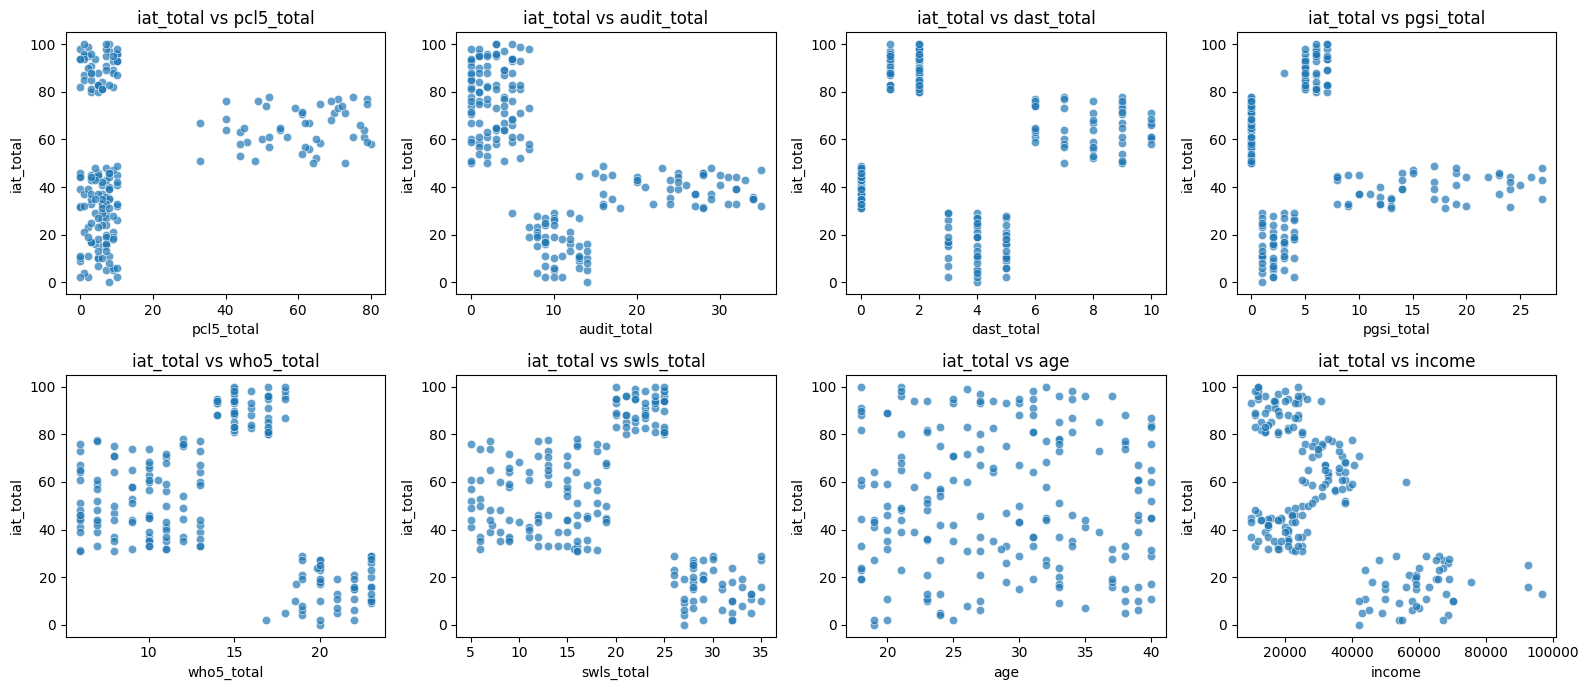

In [62]:
n_features = len(features)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols  # ceil

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 3.5*n_rows))
axes = axes.flatten()  # make it 1D for easy indexing

for i, var in enumerate(features):
    ax = axes[i]
    sns.scatterplot(
        data=df_simplified,
        x=var,
        y=target,
        ax=ax,
        alpha=0.7
    )
    ax.set_title(f"{target} vs {var}")
    ax.set_xlabel(var)
    ax.set_ylabel(target)

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


- audit_total and income: clear negative monotonic trends → matches strong negative ρ.
- who5_total and swls_total: downward pattern → consistent with moderate negative ρ.
- pcl5_total: weak upward tendency → small positive ρ.
- dast_total, pgsi_total, age: mostly clouds with no clear slope → ρ near 0 makes sense.

## Kruskal-Wallis test

In contrast, the **Kruskal-Wallis test** was used to compare IAT scores across categorical groups (e.g., gender categories). It is a nonparametric alternative to one-way ANOVA for assessing whether the medians differ between three or more independent groups when data are not normally distributed.

The Kruskal-Wallis test is essentially **an extension of the Mann-Whitney U test**, which is used for comparing exactly two independent groups on a continuous or ordinal variable under non-normality assumptions. Therefore, the Mann-Whitney U test is applied when comparing two groups, while Kruskal-Wallis is appropriate for three or more groups.

Thus, the choice of test depends on whether the aim is to assess association between variables (Spearman), or differences between two groups (Mann-Whitney U), or differences among three or more groups (Kruskal-Wallis) under non-normal data conditions.

https://www.slideshare.net/slideshow/kruskal-wallis-test-friedman-test-spearman-correlation/197229012

Kruskal–Wallis ranks all 200 IAT scores from lowest to highest, then checks if the average rank differs across gender groups.
H is the test statistic measuring how different the average ranks are.
p < 0.05 tells that at least one group has a different rank pattern than the others. 
ε² tells you how much a category explains IAT variation in %.
Kruskal–Wallis only says "at least one group differs," not which ones.
For this reason, post-hoc tests checked all possible pairs to test which ones are significant.

In [63]:
def holm_bonferroni(pvals):
    m = len(pvals)
    order = np.argsort(pvals)
    p_sorted = np.array(pvals)[order]
    adj = np.empty(m, dtype=float)
    running_max = 0.0
    for i, p in enumerate(p_sorted):
        val = (m - i) * p
        running_max = max(running_max, val)
        adj[i] = min(1.0, running_max)
    p_adj = np.empty(m, dtype=float)
    p_adj[order] = adj
    return p_adj

def rank_biserial_from_U(U, n1, n2):
    return 1 - (2 * U) / (n1 * n2)

def hodges_lehmann(a, b):
    return float(np.median(np.subtract.outer(b, a).ravel()))

def kruskal_by_group(df, score_col, group_col):
    # Drop missing
    df_ = df[[score_col, group_col]]

    # Descriptives
    desc = df_.groupby(group_col)[score_col].agg(
        count="count", median="median", mean="mean", std="std"
    )
    print(f"\n=== {score_col} by {group_col} ===")
    print(desc.round(2))

    groups = [g[score_col].values for _, g in df_.groupby(group_col)]
    labels = df_[group_col].unique().tolist()
    k = len(groups)

    if k < 2:
        print("\nNot enough groups for a test.")
        return

    if k == 2:
        # Mann–Whitney case
        A, B = groups
        la, lb = labels
        U, p = mannwhitneyu(A, B, alternative="two-sided", method="auto")
        r_rb = rank_biserial_from_U(U, len(A), len(B))
        print(f"\n--- Mann–Whitney U ({la} vs {lb}) ---")
        print(f"U = {U:.2f}, p = {p:.4f}, rank-biserial r = {r_rb:.3f}")
        return

    # Kruskal–Wallis
    H, p_kw = kruskal(*groups)
    n_tot = sum(len(g) for g in groups)
    eps2 = (H - k + 1) / (n_tot - k) if (n_tot - k) > 0 else np.nan

    print(f"\n--- Kruskal–Wallis (k={k} groups) ---")
    print(f"H = {H:.3f}, df = {k - 1}, p = {p_kw:.4f}")
    print(f"Effect size: epsilon-squared ε² = {eps2:.3f}")

    # Post-hoc pairwise Mann–Whitney + Holm
    pairs = []
    for gA, gB in itertools.combinations(desc.index, 2):
        A = df_.loc[df_[group_col] == gA, score_col].values
        B = df_.loc[df_[group_col] == gB, score_col].values
        U, p_raw = mannwhitneyu(A, B, alternative="two-sided", method="auto")
        r_rb = rank_biserial_from_U(U, len(A), len(B))
        hl = hodges_lehmann(A, B)
        pairs.append({
            "Group_A": gA, "Group_B": gB,
            "n_A": len(A), "n_B": len(B),
            "U": float(U), "p_raw": float(p_raw),
            "r_rank_biserial": float(r_rb),
            "HL_diff(B-A)": float(hl)
        })

    pairs_df = pd.DataFrame(pairs)
    pairs_df["p_holm"] = holm_bonferroni(pairs_df["p_raw"].values)
    pairs_df = pairs_df.sort_values("p_holm").reset_index(drop=True)

    print("\nPost-hoc pairwise Mann–Whitney (Holm-corrected):")
    print(pairs_df.round(4).to_string(index=False))

    sig = pairs_df[pairs_df["p_holm"] < 0.05]
    if not sig.empty:
        print("\nSignificant pairs (p < 0.05 after Holm):")
        for _, r in sig.iterrows():
            direction = "B > A" if r["r_rank_biserial"] > 0 else "A > B"
            print(f" - {r['Group_A']} vs {r['Group_B']}: {direction}, "
                  f"HL = {r['HL_diff(B-A)']:.2f}, p = {r['p_holm']:.4f}")
    else:
        print("\nNo significant pairs after Holm correction.")



In [64]:
kruskal_by_group(df_simplified, "iat_total", "gender_label")


=== iat_total by gender_label ===
                   count  median   mean    std
gender_label                                  
Female                85    61.0  58.83  28.68
Male                  83    44.0  48.77  28.93
Non-binary            20    42.5  39.45  22.38
Prefer not to say     12    66.0  56.50  30.05

--- Kruskal–Wallis (k=4 groups) ---
H = 9.724, df = 3, p = 0.0211
Effect size: epsilon-squared ε² = 0.034

Post-hoc pairwise Mann–Whitney (Holm-corrected):
   Group_A           Group_B  n_A  n_B      U  p_raw  r_rank_biserial  HL_diff(B-A)  p_holm
    Female        Non-binary   85   20 1195.0 0.0049          -0.4059         -21.0  0.0296
    Female              Male   85   83 4246.5 0.0226          -0.2038         -11.0  0.1131
Non-binary Prefer not to say   20   12   83.0 0.1553           0.3083          23.0  0.6211
    Female Prefer not to say   85   12  541.0 0.7382          -0.0608          -3.0  0.9816
      Male        Non-binary   83   20  948.0 0.3272          -0.1

IAT scores differed significantly by gender (Kruskal–Wallis H(3) = 9.72, p = .021, ε²=0.03), with post-hoc tests showing that female participants reported higher scores than non-binary participants (adjusted p = .030).
Only Female vs Non-binary remained significant, all other pairs (Female vs Male, Male vs Non-binary, etc.) were not significant after correction.

In [65]:
kruskal_by_group(df_simplified, "iat_total", "school_labels")


=== iat_total by school_labels ===
               count  median   mean    std
school_labels                             
Bachelor          35    54.0  53.29  26.51
Doctoral           8    20.0  20.71   6.20
Elementary        34    41.0  49.62  22.77
High              52    63.5  58.68  27.91
Master            26    16.5  21.91  21.13
Middle            45    81.0  70.58  23.22

--- Kruskal–Wallis (k=6 groups) ---
H = 60.987, df = 5, p = 0.0000
Effect size: epsilon-squared ε² = 0.289

Post-hoc pairwise Mann–Whitney (Holm-corrected):
   Group_A    Group_B  n_A  n_B      U  p_raw  r_rank_biserial  HL_diff(B-A)  p_holm
    Master     Middle   26   45   72.0 0.0000           0.8769       54.2663  0.0000
Elementary     Master   34   26  776.0 0.0000          -0.7557      -25.0000  0.0000
      High     Master   52   26 1103.5 0.0000          -0.6324      -44.0000  0.0001
  Bachelor     Master   35   26  762.0 0.0000          -0.6747      -34.0000  0.0001
  Doctoral     Middle    8   45    0.

IAT scores differed strongly by education (Kruskal–Wallis H(5) = 60.99, p < .001, ε² = .29, large effect). Participants with Middle and High education reported much higher IAT scores than those with Master or Doctoral degrees, with median differences often exceeding 40–50 points.

In [66]:
kruskal_by_group(df_simplified, "iat_total", "marital_labels")


=== iat_total by marital_labels ===
                   count  median   mean    std
marital_labels                                
Divorced              21    39.0  50.17  31.96
Married               81    45.0  46.09  25.15
Prefer not to say     21    52.0  51.08  31.64
Separated             10    20.0  19.30   8.90
Single                51    82.0  75.76  21.16
Widowed               16    38.0  37.44  19.04

--- Kruskal–Wallis (k=6 groups) ---
H = 54.705, df = 5, p = 0.0000
Effect size: epsilon-squared ε² = 0.256

Post-hoc pairwise Mann–Whitney (Holm-corrected):
          Group_A           Group_B  n_A  n_B     U  p_raw  r_rank_biserial  HL_diff(B-A)  p_holm
          Married            Single   81   51 778.5 0.0000           0.6231       31.0000  0.0000
        Separated            Single   10   51   0.0 0.0000           1.0000       62.0000  0.0000
           Single           Widowed   51   16 724.0 0.0000          -0.7745      -40.0000  0.0000
          Married         Separated  

IAT scores differed strongly by marital status (Kruskal–Wallis H(5) = 54.71, p < .001, ε² = .26, large effect). Single participants reported much higher IAT scores (median = 82) than all other marital groups, with median differences ranging from 24 to 62 points.

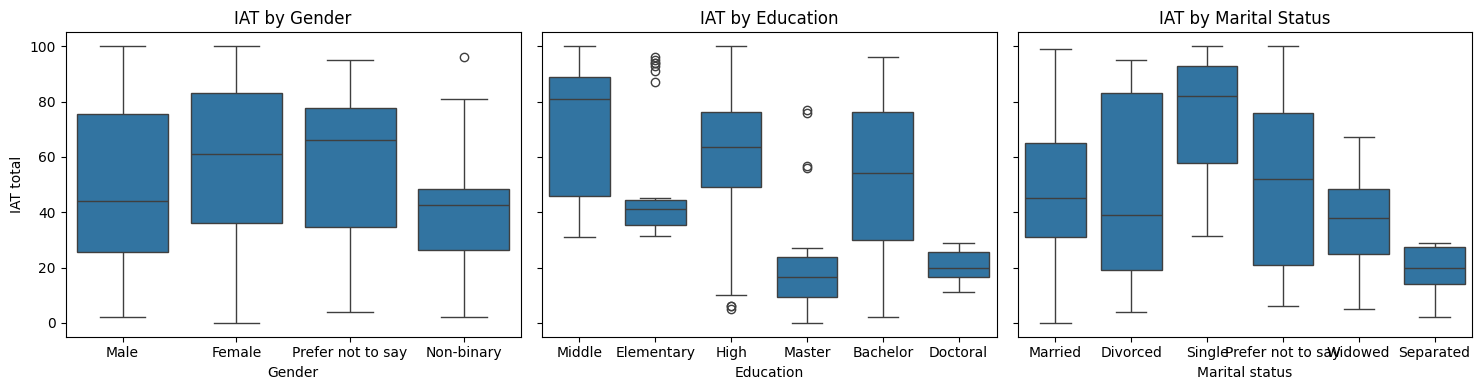

In [67]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

# 1. IAT by gender
sns.boxplot(x="gender_label", y="iat_total",
            data=df_simplified, ax=axes[0])
axes[0].set_title("IAT by Gender")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("IAT total")

# 2. IAT by education
sns.boxplot(x="school_labels", y="iat_total",
            data=df_simplified, ax=axes[1])
axes[1].set_title("IAT by Education")
axes[1].set_xlabel("Education")
axes[1].set_ylabel("")

# 3. IAT by marital status
sns.boxplot(x="marital_labels", y="iat_total",
            data=df_simplified, ax=axes[2])
axes[2].set_title("IAT by Marital Status")
axes[2].set_xlabel("Marital status")
axes[2].set_ylabel("")

plt.tight_layout()
plt.show()

- Gender: Females and “Prefer not to say” show higher medians and upper‑quartile IAT scores than males and non‑binary participants, matching the significant H and p you found.
- Education: Very strong gradient; “Middle” and “High” education groups cluster at much higher IAT, while “Master” and “Doctoral” are clearly lower, with compressed boxes near the bottom range.
- Marital status: Singles stand out with a much higher median and wide spread, while separated and widowed groups show lower medians; married and divorced sit in the middle, exactly as your numeric summary indicated.

Education and marital status as main sociodemographic axes for personas. 

Gender as a secondary/background descriptor.

# Multivariate EDA
A correlation heatmap for all composite scores to show how dimensions (addictions, PTSD, well‑being, social support) relate.​
Multivariate EDA includes also dimensionality reduction (PCA, FAMD) to reduce many correlated features to 2-4 interpretable components. 

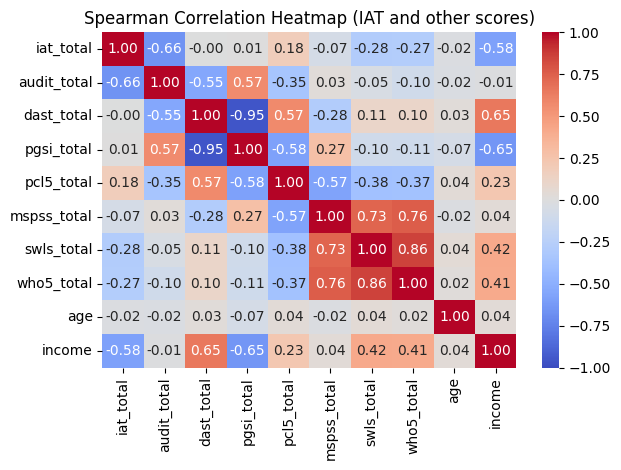

In [68]:
corr = df_simplified[[
    "iat_total","audit_total","dast_total","pgsi_total",
    "pcl5_total","mspss_total","swls_total","who5_total",
    "age","income"
]].corr(method="spearman")

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm",
            vmin=-1, vmax=1, center=0)
plt.title("Spearman Correlation Heatmap (IAT and other scores)")
plt.tight_layout()
plt.show()


This figure nicely motivates which variables to use as main axes for personas (IAT + alcohol + income + well‑being + life satisfaction, with weaker roles for age, drugs, gambling).

In [69]:
df_simplified

,age,gender,education,marital,income,gender_label,school_labels,marital_labels,iat_total,audit_total,dast_total,pgsi_total,pcl5_total,mspss_total,swls_total,who5_total
0,39.0,0,8.0,1.0,14000,Male,Middle,Married,39.000000,25.0,0.0,24.0,0.0,51.0,8.0,13.0
1,18.0,1,5.0,1.0,25000,Female,Elementary,Married,33.000000,16.0,0.0,8.0,6.0,43.0,14.0,7.0
2,40.0,0,13.0,2.0,56000,Male,High,Divorced,60.000000,0.0,7.0,0.0,50.0,18.0,8.0,13.0
3,24.0,1,22.0,0.0,35000,Female,Master,Single,56.000000,7.0,8.0,0.0,63.0,26.0,15.0,11.0
4,19.0,1,22.0,1.0,42000,Female,Master,Married,0.000000,14.0,4.0,1.0,8.0,61.0,27.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,28.0,0,13.0,1.0,36000,Male,High,Married,66.000000,5.0,10.0,0.0,77.0,15.0,9.0,10.0
196,21.0,0,18.0,1.0,38000,Male,Bachelor,Married,68.000000,5.0,8.0,0.0,69.0,35.0,19.0,11.0
197,20.0,1,22.0,4.0,50000,Female,Master,Separated,11.000000,13.0,4.0,3.0,0.0,63.0,29.0,21.0
198,39.0,0,8.0,1.0,22000,Male,Middle,Married,46.000000,15.0,0.0,23.0,8.0,48.0,13.0,6.0


# Data Standardization 
Select only numeric variables (demographics + total psychometric scores) and apply RobustScaler so that they are on a comparable scale and less sensitive to outliers before dimensionality reduction and clustering.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

In [70]:
num_cols = ['age','income',
            'iat_total','audit_total','dast_total',
            'pgsi_total','pcl5_total','mspss_total',
            'swls_total','who5_total']
cat_cols = ['gender_label', 'school_labels', 'marital_labels']

X = df_simplified[cat_cols + num_cols]

# one‑hot encodes the categorical labels and robust‑scales the numeric variables
preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols),
        ('num', RobustScaler(), num_cols)
    ]
)

X_full = preprocess.fit_transform(X)

X_num = df_simplified[num_cols].copy()
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_num)
X_scaled = pd.DataFrame(X_scaled, columns=num_cols, index=df_simplified.index)

# Preprocessing 
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

## PCA with one‑hot encoding 

In [71]:
# keeps the minimum number of components explaining 90% of variance
pca = PCA(n_components=0.9)

pipe_pca_ohe = Pipeline(steps=[
    ('preprocess', preprocess),
    ('pca', pca)
])

X_pca_ohe = pipe_pca_ohe.fit_transform(X)
X_pca_ohe = pipe_pca_ohe.fit_transform(X)
X_pca_ohe = pd.DataFrame(
    X_pca_ohe,
    index=df_simplified.index,
    columns=[f"PC{i+1}_pca_ohe" for i in range(X_pca_ohe.shape[1])]
)

# --- access PCA internals ---
pca_step = pipe_pca_ohe.named_steps['pca']

print("Explained variance:", pca_step.explained_variance_)
print("Explained variance ratio:", pca_step.explained_variance_ratio_)
print("Cumulative variance ratio:", pca_step.explained_variance_ratio_.cumsum())


Explained variance: [5.83897274 2.15788848 0.9778779  0.40623196 0.2979538  0.24183148
 0.21287331 0.16336038]
Explained variance ratio: [0.51669433 0.1909529  0.08653302 0.03594772 0.02636612 0.02139982
 0.01883729 0.01445586]
Cumulative variance ratio: [0.51669433 0.70764723 0.79418025 0.83012797 0.85649409 0.87789391
 0.8967312  0.91118706]


The first 7 principal components explained approximately 90% of the total variance (89.7%), which we considered an adequate trade‑off between information retention and dimensionality reduction.

Starting from the total variance, build two pipelines: one that keeps exactly 7 principal components and one that keeps exactly 8 principal components.
In both cases the same preprocessing is applied first (one‑hot encoding of categorical variables and robust scaling of numeric variables), then PCA is fitted on the preprocessed matrix and the resulting component scores are stored in DataFrames for later clustering.

In [72]:
pca_7 = PCA(n_components=7)
pipe_pca_ohe_7 = Pipeline(steps=[
    ('preprocess', preprocess),
    ('pca', pca_7)
])

X_pca7 = pipe_pca_ohe_7.fit_transform(X)   # shape (200, 7)
X_pca7 = pd.DataFrame(
    pipe_pca_ohe_7.fit_transform(X),
    index=df_simplified.index,
    columns=[f"PC{i+1}_pca7" for i in range(7)]
)

pca_8 = PCA(n_components=8)
pipe_pca_ohe_8 = Pipeline(steps=[
    ('preprocess', preprocess),
    ('pca', pca_8)
])

X_pca8 = pipe_pca_ohe_8.fit_transform(X)   # shape (200, 8)
X_pca8 = pd.DataFrame(
    pipe_pca_ohe_8.fit_transform(X),
    index=df_simplified.index,
    columns=[f"PC{i+1}_pca8" for i in range(8)]
)

## FAMD

In [73]:
famd_cols = [
    'age', 'income',
    'gender_label', 'school_labels', 'marital_labels',
    'iat_total','audit_total','dast_total','pgsi_total',
    'pcl5_total','mspss_total','swls_total','who5_total'
]

X_famd_in = df_simplified[famd_cols]

famd = prince.FAMD(
    n_components=7,  # pick a small number (e.g. 4–6) for clustering
    n_iter=5,
    random_state=101
).fit(X_famd_in)

In [74]:
eig = famd.eigenvalues_      # your array
ratios = eig / eig.sum()     # 0–1
percent = ratios * 100       # 0–100
#print(percent)
cum_percent = percent.cumsum()
print(cum_percent) 

[ 20.93270088  40.26955621  53.6869393   66.89425371  78.56236077
  89.5712387  100.        ]


To match ~90% from PCA, it is enough to have 6 or 7 FAMD components.

In [75]:
# FAMD with 6 components
famd6 = prince.FAMD(n_components=6, n_iter=5, random_state=101).fit(X_famd_in)
X_famd6 = famd6.row_coordinates(X_famd_in).values   # shape (200, 6), no NaN expected

# FAMD with 7 components
famd7 = prince.FAMD(n_components=7, n_iter=5, random_state=101).fit(X_famd_in)
X_famd7 = famd7.row_coordinates(X_famd_in).values   # shape (200, 7)


# Clustering
To define the optimal number of clusters we combined a graphical and an analytical approach: respectively, the elbow and the inertia curves and the average silhouette for each k across preprocessing methods, complemented with additional indices (Davies–Bouldin and Calinski–Harabasz). 

- The Silhouette Coefficient is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from -1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
- Inertia, also known as within-cluster sum-of-squares, measures the compactness of clusters. A lower inertia value implies a better model, as it indicates tighter clustering. However, the inertia metric has a drawback: it keeps decreasing with an increase in the number of clusters ( k ). This is where the “elbow method” is often used to find the optimal ( k ).

https://victorleungtw.wordpress.com/2023/12/16/understanding-inertia-and-silhouette-coefficient-key-metrics-in-clustering-analysis/

- The Davies-Bouldin Index (DBI) helps us measure how good the clustering is in a dataset. A lower score is better, because it means that points in the same cluster are close to each other and different clusters are far apart from one another.
- The Calinski-Harabasz Index measures how good the clusters are in a dataset. A higher score is better, as it means the clusters are tight and well-separated. It helps determine the ideal number of clusters.

https://www.geeksforgeeks.org/machine-learning/clustering-metrics/

## No preprocessing

In [76]:
X_orig = X_full  

sil_orig, iner_orig, dbi_orig, ch_orig = {}, {}, {}, {}
K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = km.fit_predict(X_orig)

    sil_orig[k] = silhouette_score(X_orig, labels)
    iner_orig[k] = km.inertia_
    dbi_orig[k]  = davies_bouldin_score(X_orig, labels)
    ch_orig[k]   = calinski_harabasz_score(X_orig, labels)

print("Orig - Sil:", sil_orig)
print("Orig - Inertia:", iner_orig)
print("Orig - DBI:", dbi_orig)
print("Orig - CH :", ch_orig)


Orig - Sil: {2: 0.47253432256680805, 3: 0.40393077325896143, 4: 0.42603514605819376, 5: 0.3455476906864142, 6: 0.30247439147966854, 7: 0.2361515757187827, 8: 0.16372291911728382, 9: 0.1557766230284279, 10: 0.15341937993616228}
Orig - Inertia: {2: 1155.944449864361, 3: 781.3483784187281, 4: 569.4330258744225, 5: 521.3471795434386, 6: 487.3503298216823, 7: 469.10274878495534, 8: 452.87236012943345, 9: 441.7421794765687, 10: 428.4330682569886}
Orig - DBI: {2: 0.803304663244157, 3: 1.0168684375532655, 4: 0.9110889011184462, 5: 1.2315756049662272, 6: 1.4944149833741964, 7: 1.8302719784457868, 8: 2.0211657957246656, 9: 2.088599597720111, 10: 2.0475240828022967}
Orig - CH : {2: 187.198024171354, 3: 184.99626397572752, 4: 192.68346958764695, 5: 161.5326378460764, 6: 140.23844033611869, 7: 122.03671770837317, 8: 108.77333856940928, 9: 97.66810736870917, 10: 89.700158814741}


In [77]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

X_orig = X_full  

sil_medoids, iner_medoids, dbi_medoids, ch_medoids = {}, {}, {}, {}
K = range(2, 11)

for k in K:
    # The default 'init' for KMedoids is 'build', which is a good heuristic.
    km = KMedoids(n_clusters=k, random_state=42, max_iter=300) 
    labels = km.fit_predict(X_orig)

    # The evaluation metrics
    sil_medoids[k] = silhouette_score(X_orig, labels)
    iner_medoids[k] = km.inertia_ 
    dbi_medoids[k]  = davies_bouldin_score(X_orig, labels)
    ch_medoids[k]   = calinski_harabasz_score(X_orig, labels)

print("Medoids - Sil:", sil_medoids)
print("Medoids - Inertia (Dissimilarity):", iner_medoids)
print("Medoids - DBI:", dbi_medoids)
print("Medoids - CH :", ch_medoids)

Medoids - Sil: {2: 0.47253432256680805, 3: 0.3712087498232888, 4: 0.4243771761600554, 5: 0.3491785317711597, 6: 0.34321201751394254, 7: 0.26312756860816955, 8: 0.2360076590486188, 9: 0.22555030008894736, 10: 0.21154829232525502}
Medoids - Inertia (Dissimilarity): {2: 528.5665320275177, 3: 461.7806617872137, 4: 380.29062658890894, 5: 372.38922192262726, 6: 368.0546291876062, 7: 360.469634778667, 8: 350.68927755951427, 9: 350.89618173173557, 10: 345.17839903785114}
Medoids - DBI: {2: 0.803304663244157, 3: 1.0762503132099548, 4: 0.9184948357273471, 5: 1.669807799944269, 6: 1.7198567647158596, 7: 2.0343505344288433, 8: 1.7034580294729724, 9: 1.6700620964005548, 10: 1.8696426577110685}
Medoids - CH : {2: 187.198024171354, 3: 167.07892878121913, 4: 191.93752730935216, 5: 147.7793846313202, 6: 120.09585775358738, 7: 102.8368803464835, 8: 95.46019605770567, 9: 82.83404860063976, 10: 76.14433499548285}


## PCA

In [78]:
# --- Dictionaries for K-Means on PCA 7 & 8 ---
sil_scores_7 = {}
inertias_7   = {}
dbi_7        = {}
ch_7         = {}

sil_scores_8 = {}
inertias_8   = {}
dbi_8        = {}
ch_8         = {}

# --- Dictionaries for K-Medoids on PCA 7 & 8 ---
sil_medoids_7 = {}
inertias_medoids_7   = {}
dbi_medoids_7        = {}
ch_medoids_7         = {}

sil_medoids_8 = {}
inertias_medoids_8   = {}
dbi_medoids_8        = {}
ch_medoids_8         = {}

K = range(2, 11)

# A. PCA 7 COMPONENTS ANALYSIS

for k in K: 
    # --- K-Means (Original) ---
    km_means = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels_means = km_means.fit_predict(X_pca7)

    sil_scores_7[k] = silhouette_score(X_pca7, labels_means)
    inertias_7[k]   = km_means.inertia_
    dbi_7[k]        = davies_bouldin_score(X_pca7, labels_means)
    ch_7[k]         = calinski_harabasz_score(X_pca7, labels_means)
    
    # --- K-Medoids (New) ---
    # NOTE: n_init is removed. max_iter is used for convergence, not initialization runs.
    km_medoids = KMedoids(n_clusters=k, random_state=42, max_iter=300) 
    labels_medoids = km_medoids.fit_predict(X_pca7)

    sil_medoids_7[k] = silhouette_score(X_pca7, labels_medoids)
    inertias_medoids_7[k] = km_medoids.inertia_ # Inertia is sum of distances to medoids
    dbi_medoids_7[k]  = davies_bouldin_score(X_pca7, labels_medoids)
    ch_medoids_7[k]   = calinski_harabasz_score(X_pca7, labels_medoids)


# B. PCA 8 COMPONENTS ANALYSIS

for k in K: 
    # --- K-Means (Original) ---
    km_means = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels_means = km_means.fit_predict(X_pca8)

    sil_scores_8[k] = silhouette_score(X_pca8, labels_means)
    inertias_8[k]   = km_means.inertia_
    dbi_8[k]        = davies_bouldin_score(X_pca8, labels_means)
    ch_8[k]         = calinski_harabasz_score(X_pca8, labels_means)
    
    # --- K-Medoids (New) ---
    km_medoids = KMedoids(n_clusters=k, random_state=42, max_iter=300) 
    labels_medoids = km_medoids.fit_predict(X_pca8)

    sil_medoids_8[k] = silhouette_score(X_pca8, labels_medoids)
    inertias_medoids_8[k] = km_medoids.inertia_ 
    dbi_medoids_8[k]  = davies_bouldin_score(X_pca8, labels_medoids)
    ch_medoids_8[k]   = calinski_harabasz_score(X_pca8, labels_medoids)

# K-Means Results 
print("--- K-Means Results ---")
print("PCA7 - Silhouette:", sil_scores_7)
print("PCA7 - Inertia:", inertias_7)
print("PCA7 - DBI:", dbi_7)
print("PCA7 - CH:", ch_7)

print("PCA8 - Silhouette:", sil_scores_8)
print("PCA8 - Inertia:", inertias_8)
print("PCA8 - DBI:", dbi_8)
print("PCA8 - CH:", ch_8)

# K-Medoids Results
print("\n--- K-Medoids Results ---")
print("PCA7 - Medoids Silhouette:", sil_medoids_7)
print("PCA7 - Medoids Inertia (Dissimilarity):", inertias_medoids_7)
print("PCA7 - Medoids DBI:", dbi_medoids_7)
print("PCA7 - Medoids CH:", ch_medoids_7)

print("PCA8 - Medoids Silhouette:", sil_medoids_8)
print("PCA8 - Medoids Inertia (Dissimilarity):", inertias_medoids_8)
print("PCA8 - Medoids DBI:", dbi_medoids_8)
print("PCA8 - Medoids CH:", ch_medoids_8)

--- K-Means Results ---
PCA7 - Silhouette: {2: 0.5259945399670454, 3: 0.47919774636406937, 4: 0.5338574877919866, 5: 0.44455149914098674, 6: 0.3846291253082497, 7: 0.31160598525139266, 8: 0.2285750216050121, 9: 0.231336604869559, 10: 0.21732658941339744}
PCA7 - Inertia: {2: 924.3934103788798, 3: 550.2833468227391, 4: 338.67905798586526, 5: 301.2240513767387, 6: 274.8759282478842, 7: 257.1991524948379, 8: 243.3764128715345, 9: 233.1726051932189, 10: 224.77491245893776}
PCA7 - DBI: {2: 0.6941939543545885, 3: 0.8374358846882816, 4: 0.685196046196803, 5: 1.0168097905418902, 6: 1.235478664610701, 7: 1.4124014273725491, 8: 1.5816222472056114, 9: 1.5260356431794828, 10: 1.5597544871884719}
PCA7 - CH: {2: 233.94301475867724, 3: 262.4673875198272, 4: 323.68008273235864, 5: 277.61462608823444, 6: 245.85126777273928, 7: 220.03887859466477, 8: 199.84179320091548, 9: 182.6078381339941, 10: 168.28949308842155}
PCA8 - Silhouette: {2: 0.5178496762469593, 3: 0.4679790461635351, 4: 0.5158265859070752, 5

## FAMD

In [79]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids 
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# --- Dictionaries for K-Means on FAMD 6 & 7 (Your original code) ---
sil_famd6 = {}
iner_famd6   = {}
dbi_famd6        = {}
ch_famd6         = {}

sil_famd7 = {}
iner_famd7   = {}
dbi_famd7        = {}
ch_famd7         = {}

# --- Dictionaries for K-Medoids on FAMD 6 & 7 (New) ---
sil_medoids_famd6 = {}
iner_medoids_famd6   = {}
dbi_medoids_famd6        = {}
ch_medoids_famd6         = {}

sil_medoids_famd7 = {}
iner_medoids_famd7   = {}
dbi_medoids_famd7        = {}
ch_medoids_famd7         = {}


K = range(2, 11)

# A. FAMD 6 COMPONENTS ANALYSIS
# ====================================================================

for k in K:
    # K-Means
    km_means = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels_means = km_means.fit_predict(X_famd6)
    
    sil_famd6[k] = silhouette_score(X_famd6, labels_means)
    iner_famd6[k] = km_means.inertia_
    dbi_famd6[k]  = davies_bouldin_score(X_famd6, labels_means)
    ch_famd6[k]   = calinski_harabasz_score(X_famd6, labels_means)

    # K-Medoids
    # NOTE: n_init is removed.
    km_medoids = KMedoids(n_clusters=k, random_state=42, max_iter=300) 
    labels_medoids = km_medoids.fit_predict(X_famd6)

    sil_medoids_famd6[k] = silhouette_score(X_famd6, labels_medoids)
    iner_medoids_famd6[k] = km_medoids.inertia_ # Inertia is sum of distances to medoids
    dbi_medoids_famd6[k]  = davies_bouldin_score(X_famd6, labels_medoids)
    ch_medoids_famd6[k]   = calinski_harabasz_score(X_famd6, labels_medoids)


# B. FAMD 7 COMPONENTS ANALYSIS

for k in K:
    # K-Means
    km_means = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels_means = km_means.fit_predict(X_famd7)

    sil_famd7[k] = silhouette_score(X_famd7, labels_means)
    iner_famd7[k] = km_means.inertia_
    dbi_famd7[k]  = davies_bouldin_score(X_famd7, labels_means)
    ch_famd7[k]   = calinski_harabasz_score(X_famd7, labels_means)

    # K-Medoids
    km_medoids = KMedoids(n_clusters=k, random_state=42, max_iter=300) 
    labels_medoids = km_medoids.fit_predict(X_famd7)

    sil_medoids_famd7[k] = silhouette_score(X_famd7, labels_medoids)
    iner_medoids_famd7[k] = km_medoids.inertia_ 
    dbi_medoids_famd7[k]  = davies_bouldin_score(X_famd7, labels_medoids)
    ch_medoids_famd7[k]   = calinski_harabasz_score(X_famd7, labels_medoids)

# K-Means Results
print("--- K-Means Results ---")
print("FAMD6 - Sil:", sil_famd6)
print("FAMD6 - Inertia:", iner_famd6)
print("FAMD6 - DBI:", dbi_famd6)
print("FAMD6 - CH :", ch_famd6)

print("FAMD7 - Sil:", sil_famd7)
print("FAMD7 - Inertia:", iner_famd7)
print("FAMD7 - DBI:", dbi_famd7)
print("FAMD7 - CH :", ch_famd7)

# K-Medoids Results
print("\n--- K-Medoids Results ---")
print("FAMD6 - Medoids Sil:", sil_medoids_famd6)
print("FAMD6 - Medoids Inertia (Dissimilarity):", iner_medoids_famd6)
print("FAMD6 - Medoids DBI:", dbi_medoids_famd6)
print("FAMD6 - Medoids CH :", ch_medoids_famd6)

print("FAMD7 - Medoids Sil:", sil_medoids_famd7)
print("FAMD7 - Medoids Inertia (Dissimilarity):", iner_medoids_famd7)
print("FAMD7 - Medoids DBI:", dbi_medoids_famd7)
print("FAMD7 - Medoids CH :", ch_medoids_famd7)

--- K-Means Results ---
FAMD6 - Sil: {2: 0.23132919435126023, 3: 0.3154287946813583, 4: 0.34784225444922157, 5: 0.3517414869127215, 6: 0.38210558919273635, 7: 0.38507724077906774, 8: 0.381500147048123, 9: 0.3441327151995975, 10: 0.3478580232761202}
FAMD6 - Inertia: {2: 4455.204041595605, 3: 3401.047323197321, 4: 2829.068471643157, 5: 2304.2221638852748, 6: 1849.826333394063, 7: 1687.1458139890274, 8: 1561.3444991121569, 9: 1444.166776275214, 10: 1321.366962151232}
FAMD6 - DBI: {2: 1.4279326805908936, 3: 1.4047471604096273, 4: 1.2506810412429956, 5: 1.1433455112118154, 6: 1.0116742713954723, 7: 0.9755107123364788, 8: 1.0406850310276323, 9: 1.0974735884064262, 10: 1.0936471691578122}
FAMD6 - CH : {2: 48.31385934885266, 3: 62.014700657057546, 4: 62.658604794044564, 5: 68.50774228890707, 6: 77.44974946044626, 7: 73.50162772711452, 8: 69.93482350692558, 9: 67.75069633640561, 10: 67.43691920016191}
FAMD7 - Sil: {2: 0.20488292658466206, 3: 0.280870628202926, 4: 0.3137922333877605, 5: 0.305590

## Comparison - clustering metrics

### Silhouette

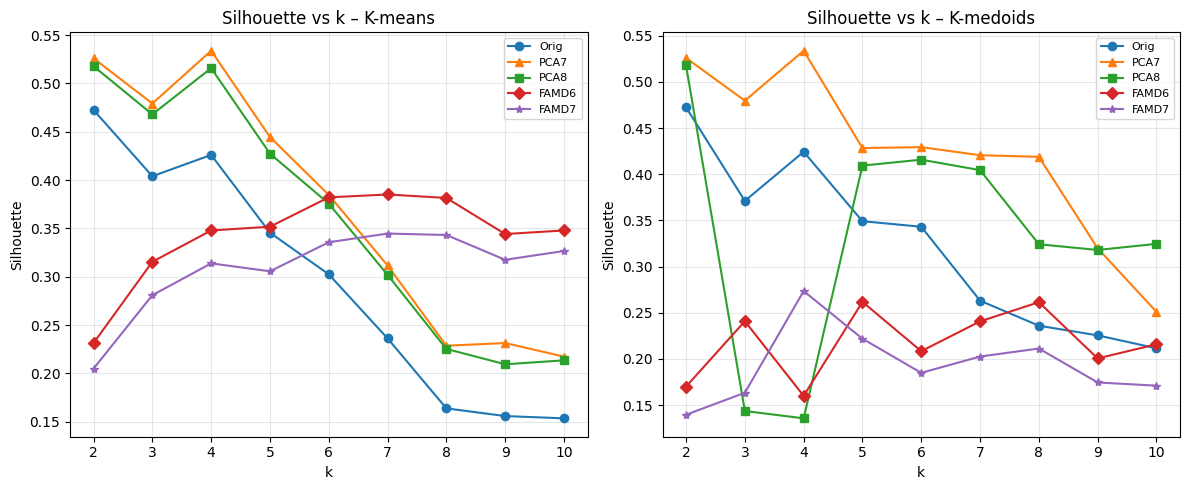

In [80]:
ks = range(2, 11)

# ----- K-means -----
sil_o   = [sil_orig[k]      for k in ks]
sil_p7  = [sil_scores_7[k]  for k in ks]
sil_p8  = [sil_scores_8[k]  for k in ks]
sil_f6  = [sil_famd6[k]     for k in ks]
sil_f7  = [sil_famd7[k]     for k in ks]

curves_km = {
    "Orig":  sil_o,
    "PCA7":  sil_p7,
    "PCA8":  sil_p8,
    "FAMD6": sil_f6,
    "FAMD7": sil_f7,
}

# ----- K-medoids -----
sil_o_m  = [sil_medoids[k]       for k in ks]
sil_p7_m = [sil_medoids_7[k]     for k in ks]
sil_p8_m = [sil_medoids_8[k]     for k in ks]
sil_f6_m = [sil_medoids_famd6[k] for k in ks]
sil_f7_m = [sil_medoids_famd7[k] for k in ks]

curves_kmed = {
    "Orig":  sil_o_m,
    "PCA7":  sil_p7_m,
    "PCA8":  sil_p8_m,
    "FAMD6": sil_f6_m,
    "FAMD7": sil_f7_m,
}

markers = {"Orig": "o", "PCA7": "^", "PCA8": "s", "FAMD6": "D", "FAMD7": "*"}

plt.figure(figsize=(12, 5))

# --- Plot sinistro: K-means ---
plt.subplot(1, 2, 1)
for name, vals in curves_km.items():
    plt.plot(ks, vals, marker=markers[name], linestyle="-", label=name)

plt.title("Silhouette vs k – K-means")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.xticks(list(ks))
plt.grid(alpha=0.3)
plt.legend(fontsize=8)

# --- Plot destro: K-medoids ---
plt.subplot(1, 2, 2)
for name, vals in curves_kmed.items():
    plt.plot(ks, vals, marker=markers[name], linestyle="-", label=name)

plt.title("Silhouette vs k – K-medoids")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.xticks(list(ks))
plt.grid(alpha=0.3)
plt.legend(fontsize=8)

plt.tight_layout()
plt.show()


K-means:
- Orig peaks at k = 4 but declines more sharply after k = 5;
- PCA7 and PCA8 have the highest silhouette values, peaking at k=4 then decreasing  as k increases;
- FAMD6 and FAMD7 start lower but improve up to k = 6, then flatten or decline, indicating that FAMD gives cluster not as clearly separated as PCA for small k. 

K-medoids:
- PCA7 dominated with a clear maximum at k = 4 and higher silhuettes than the other preprocessing across most k; PCA8 instead improves between k = 4 and k = 5 but never overtakes PCA7.
- Orig and the FAMD have lower and more irregular curves, especially for small k. 

These patterns enforce **the choice of k aroud 4 and support PCA7 as the preferred representation.**

### Davies–Bouldin

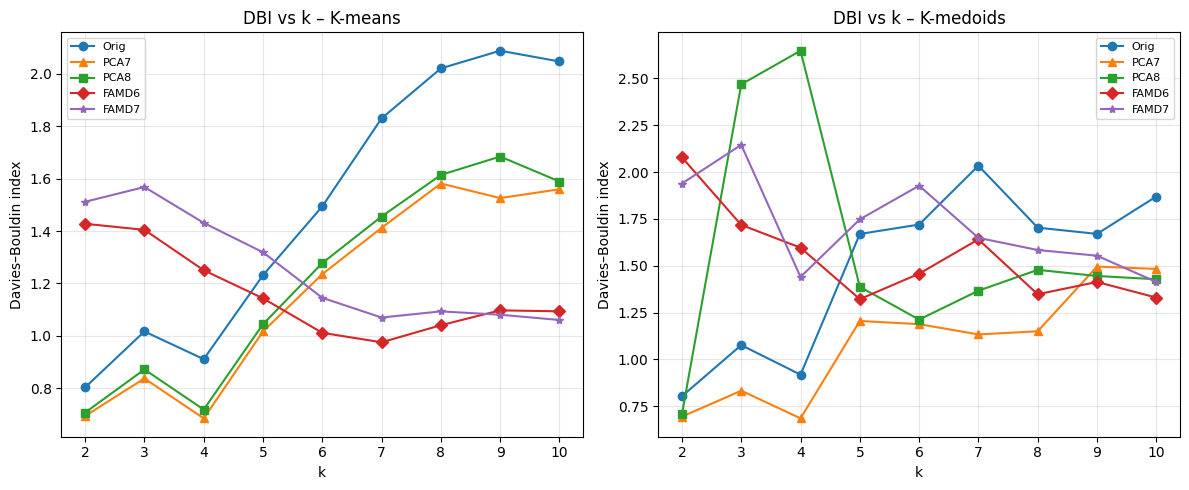

In [81]:
# K-means
dbi_o  = [dbi_orig[k]   for k in ks]
dbi_p7 = [dbi_7[k]      for k in ks]
dbi_p8 = [dbi_8[k]      for k in ks]
dbi_f6 = [dbi_famd6[k]  for k in ks]
dbi_f7 = [dbi_famd7[k]  for k in ks]

curves_km_dbi = {
    "Orig":  dbi_o,
    "PCA7":  dbi_p7,
    "PCA8":  dbi_p8,
    "FAMD6": dbi_f6,
    "FAMD7": dbi_f7,
}

# K-medoids
dbi_o_m  = [dbi_medoids[k]       for k in ks]
dbi_p7_m = [dbi_medoids_7[k]     for k in ks]
dbi_p8_m = [dbi_medoids_8[k]     for k in ks]
dbi_f6_m = [dbi_medoids_famd6[k] for k in ks]
dbi_f7_m = [dbi_medoids_famd7[k] for k in ks]

curves_kmed_dbi = {
    "Orig":  dbi_o_m,
    "PCA7":  dbi_p7_m,
    "PCA8":  dbi_p8_m,
    "FAMD6": dbi_f6_m,
    "FAMD7": dbi_f7_m,
}

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for name, vals in curves_km_dbi.items():
    plt.plot(ks, vals, marker=markers[name], linestyle="-", label=name)
plt.title("DBI vs k – K-means")
plt.xlabel("k")
plt.ylabel("Davies–Bouldin index")
plt.xticks(list(ks))
plt.grid(alpha=0.3)
plt.legend(fontsize=8)

plt.subplot(1, 2, 2)
for name, vals in curves_kmed_dbi.items():
    plt.plot(ks, vals, marker=markers[name], linestyle="-", label=name)
plt.title("DBI vs k – K-medoids")
plt.xlabel("k")
plt.ylabel("Davies–Bouldin index")
plt.xticks(list(ks))
plt.grid(alpha=0.3)
plt.legend(fontsize=8)

plt.tight_layout()
plt.show()


K-means: 
- PCA7/8 have low DBI at k = 2 and k = 4 and increase sharply starting from k = 5, indicating that extra clusters become more overlapping and less well separated. 
- FAMD6/7 show a flatter DBI curve with a minimum around k=7, but the differences are modest so they do not offer a clearly superior solution with respect to PCA. 

K-medoids: 
- PCA7 an Orig have more regular patterns with low DBI around k = 4 and then worsening. 
- PCA8 curve is unstable. 
- FAMD6/7 curves are not so much regular and do not clearly outperform PCA7. 

Again, **4 clusters in the PCA7 representation give a good compromise between compactness and separation.**

### Calinski–Harabasz

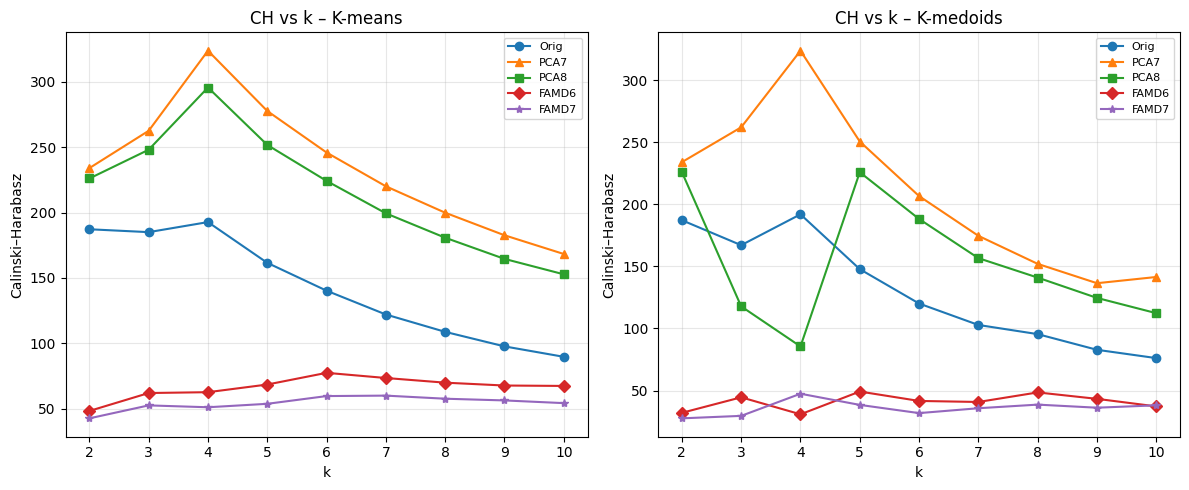

In [82]:
# K-means
ch_o  = [ch_orig[k]   for k in ks]
ch_p7 = [ch_7[k]      for k in ks]
ch_p8 = [ch_8[k]      for k in ks]
ch_f6 = [ch_famd6[k]  for k in ks]
ch_f7 = [ch_famd7[k]  for k in ks]

curves_km_ch = {
    "Orig":  ch_o,
    "PCA7":  ch_p7,
    "PCA8":  ch_p8,
    "FAMD6": ch_f6,
    "FAMD7": ch_f7,
}

# K-medoids
ch_o_m  = [ch_medoids[k]       for k in ks]
ch_p7_m = [ch_medoids_7[k]     for k in ks]
ch_p8_m = [ch_medoids_8[k]     for k in ks]
ch_f6_m = [ch_medoids_famd6[k] for k in ks]
ch_f7_m = [ch_medoids_famd7[k] for k in ks]

curves_kmed_ch = {
    "Orig":  ch_o_m,
    "PCA7":  ch_p7_m,
    "PCA8":  ch_p8_m,
    "FAMD6": ch_f6_m,
    "FAMD7": ch_f7_m,
}

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for name, vals in curves_km_ch.items():
    plt.plot(ks, vals, marker=markers[name], linestyle="-", label=name)
plt.title("CH vs k – K-means")
plt.xlabel("k")
plt.ylabel("Calinski–Harabasz")
plt.xticks(list(ks))
plt.grid(alpha=0.3)
plt.legend(fontsize=8)

plt.subplot(1, 2, 2)
for name, vals in curves_kmed_ch.items():
    plt.plot(ks, vals, marker=markers[name], linestyle="-", label=name)
plt.title("CH vs k – K-medoids")
plt.xlabel("k")
plt.ylabel("Calinski–Harabasz")
plt.xticks(list(ks))
plt.grid(alpha=0.3)
plt.legend(fontsize=8)

plt.tight_layout()
plt.show()


K-means: 
- Orig shows a smaller peak at k = 4 before decreasing steadly;
- The CH index peaks clarly at k = 4 for PCA7, with values higher than all other preprocessing at any k;
- PCA8 also has a max at k = 4 but slightly lower;
- FAMD6/6 have much lower CH overall, suggesting that FAMD spaces generate a less separated clusters than PCA7. 

K-medoids:
- Orig shows peak around k = 4 and declines thereafter;
- PCA7 again reaches its max at k = 4;
- PCA8 has a strong increase between k = 4 and k = 5 but does not surpass PCA7;
- FAMD6/7 remain much lower and flat, confirming that the cluster separation is weaker than in the PCA spaces. 

Overall, **these CH plots reinforce the conclusion that 4 clusters solution in the PCA7 representation offers the best internal structure.** 

### Inertia

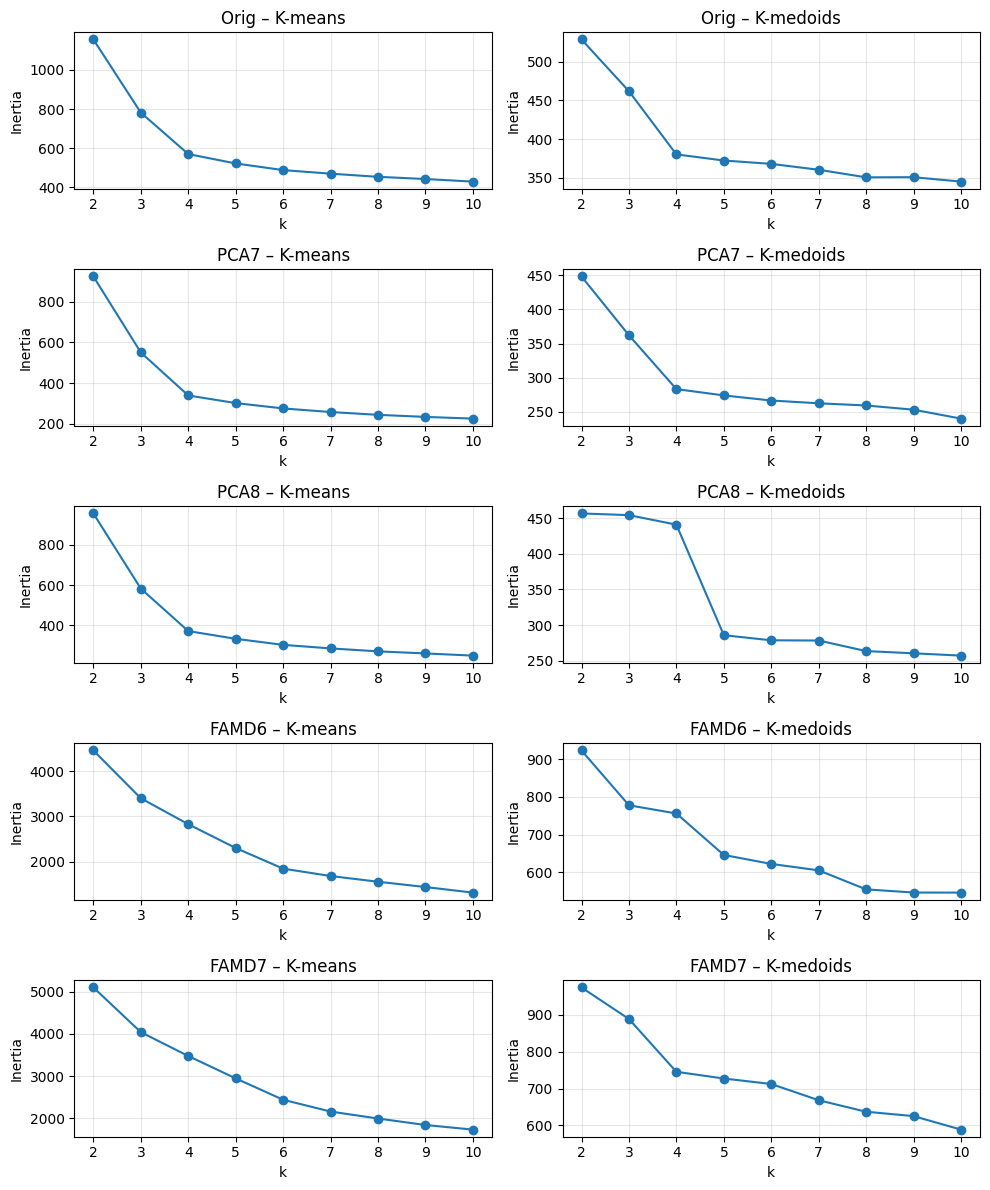

In [83]:
ks = range(2, 11)

# ----- K-means -----
iner_o  = [iner_orig[k]      for k in ks]
iner_p7 = [inertias_7[k]     for k in ks]
iner_p8 = [inertias_8[k]     for k in ks]
iner_f6 = [iner_famd6[k]     for k in ks]
iner_f7 = [iner_famd7[k]     for k in ks]

# ----- K-medoids -----
iner_o_m  = [iner_medoids[k]       for k in ks]
iner_p7_m = [inertias_medoids_7[k] for k in ks]
iner_p8_m = [inertias_medoids_8[k] for k in ks]
iner_f6_m = [iner_medoids_famd6[k] for k in ks]
iner_f7_m = [iner_medoids_famd7[k] for k in ks]

plt.figure(figsize=(10, 12))

# 1) Orig
plt.subplot(5, 2, 1)
plt.plot(ks, iner_o, "o-")
plt.title("Orig – K-means")
plt.xlabel("k"); plt.ylabel("Inertia"); plt.xticks(list(ks)); plt.grid(alpha=0.3)

plt.subplot(5, 2, 2)
plt.plot(ks, iner_o_m, "o-")
plt.title("Orig – K-medoids")
plt.xlabel("k"); plt.ylabel("Inertia"); plt.xticks(list(ks)); plt.grid(alpha=0.3)

# 2) PCA7
plt.subplot(5, 2, 3)
plt.plot(ks, iner_p7, "o-")
plt.title("PCA7 – K-means")
plt.xlabel("k"); plt.ylabel("Inertia"); plt.xticks(list(ks)); plt.grid(alpha=0.3)

plt.subplot(5, 2, 4)
plt.plot(ks, iner_p7_m, "o-")
plt.title("PCA7 – K-medoids")
plt.xlabel("k"); plt.ylabel("Inertia"); plt.xticks(list(ks)); plt.grid(alpha=0.3)

# 3) PCA8
plt.subplot(5, 2, 5)
plt.plot(ks, iner_p8, "o-")
plt.title("PCA8 – K-means")
plt.xlabel("k"); plt.ylabel("Inertia"); plt.xticks(list(ks)); plt.grid(alpha=0.3)

plt.subplot(5, 2, 6)
plt.plot(ks, iner_p8_m, "o-")
plt.title("PCA8 – K-medoids")
plt.xlabel("k"); plt.ylabel("Inertia"); plt.xticks(list(ks)); plt.grid(alpha=0.3)

# 4) FAMD6
plt.subplot(5, 2, 7)
plt.plot(ks, iner_f6, "o-")
plt.title("FAMD6 – K-means")
plt.xlabel("k"); plt.ylabel("Inertia"); plt.xticks(list(ks)); plt.grid(alpha=0.3)

plt.subplot(5, 2, 8)
plt.plot(ks, iner_f6_m, "o-")
plt.title("FAMD6 – K-medoids")
plt.xlabel("k"); plt.ylabel("Inertia"); plt.xticks(list(ks)); plt.grid(alpha=0.3)

# 5) FAMD7
plt.subplot(5, 2, 9)
plt.plot(ks, iner_f7, "o-")
plt.title("FAMD7 – K-means")
plt.xlabel("k"); plt.ylabel("Inertia"); plt.xticks(list(ks)); plt.grid(alpha=0.3)

plt.subplot(5, 2, 10)
plt.plot(ks, iner_f7_m, "o-")
plt.title("FAMD7 – K-medoids")
plt.xlabel("k"); plt.ylabel("Inertia"); plt.xticks(list(ks)); plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


K-means: 
- For Orig, PCA7 and PCA8 there is a steep drop in inertia between k = 2 and k ≈ 4, after which the curves flatten; 
- FAMD6 and FAMD7 start from much higher inertia because they use more dimensions, but the shape is identical: large decrease up to k ≈ 4–5 and then a nearly linear, slow decline, indicating diminishing returns from adding more clusters.

K-medoids: 
- The corresponding K-medoids plots are very similar in shape, with slightly lower absolute inertia (since medoids are less influences by extreme points). A large drop is between k = 2 and k = 4 and only minor improvements afterwards. 

**In combination with the silhuette, CH and DBI curves, these inertia results support using 4 clusters, preferibly on the PCA7 representation.**

https://www.w3schools.com/python/python_ml_hierarchial_clustering.asp

Running AgglomerativeClustering with Ward and computing silhouette, Davies–Bouldin, and Calinski–Harabasz on the same PCA7 gives internal indices for a different algorithm than K‑means and K-medoids, in order to check whether 4 clusters look good across methods.

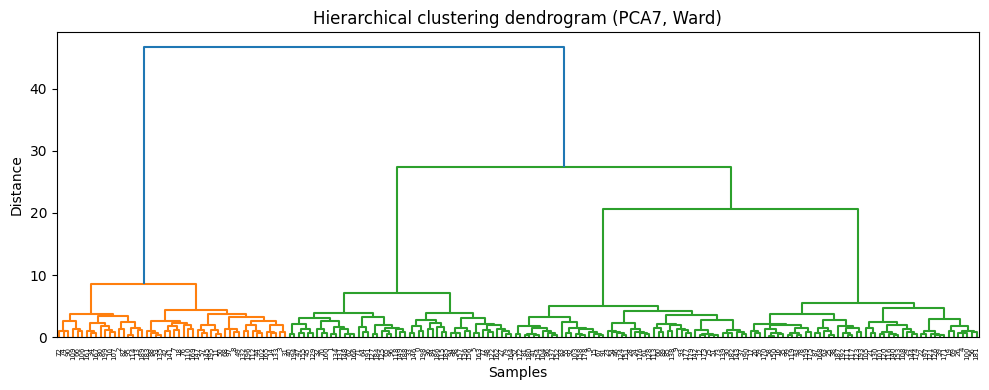

Hierarchical (Ward) on PCA7, k=4
Silhouette:         0.534
Davies-Bouldin DBI: 0.685
Calinski-Harabasz:  323.7


In [84]:
# 1) Dendrogram with Ward linkage
linkage_data = linkage(X_pca7, method='ward', metric='euclidean')
plt.figure(figsize=(10, 4))
dendrogram(linkage_data)
plt.title('Hierarchical clustering dendrogram (PCA7, Ward)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

# 2) Agglomerative clustering with k = 4, Ward linkage
agg = AgglomerativeClustering(n_clusters=4, linkage='ward', metric='euclidean')
labels_hc = agg.fit_predict(X_pca7)

# 3) Internal validation metrics on the same X_scaled
sil_hc = silhouette_score(X_pca7, labels_hc)
dbi_hc = davies_bouldin_score(X_pca7, labels_hc)
ch_hc  = calinski_harabasz_score(X_pca7, labels_hc)

print("Hierarchical (Ward) on PCA7, k=4")
print(f"Silhouette:         {sil_hc:.3f}")
print(f"Davies-Bouldin DBI: {dbi_hc:.3f}")
print(f"Calinski-Harabasz:  {ch_hc:.1f}")




In [85]:
k_best = 4  # or whatever k you chose

print("K-Means Results (PCA7)")
print(f"k = {k_best}")
print(f"PCA7 - Silhouette: {sil_scores_7[k_best]:.3f}")
print(f"PCA7 - Inertia:    {inertias_7[k_best]:.3f}")
print(f"PCA7 - DBI:        {dbi_7[k_best]:.3f}")
print(f"PCA7 - CH:         {ch_7[k_best]:.3f}")

print("\nK-Medoids Results (PCA7)")
print(f"k = {k_best}")
print(f"PCA7 - Medoids Silhouette: {sil_medoids_7[k_best]:.3f}")
print(f"PCA7 - Medoids Inertia:    {inertias_medoids_7[k_best]:.3f}")
print(f"PCA7 - Medoids DBI:        {dbi_medoids_7[k_best]:.3f}")
print(f"PCA7 - Medoids CH:         {ch_medoids_7[k_best]:.3f}")


K-Means Results (PCA7)
k = 4
PCA7 - Silhouette: 0.534
PCA7 - Inertia:    338.679
PCA7 - DBI:        0.685
PCA7 - CH:         323.680

K-Medoids Results (PCA7)
k = 4
PCA7 - Medoids Silhouette: 0.534
PCA7 - Medoids Inertia:    283.348
PCA7 - Medoids DBI:        0.685
PCA7 - Medoids CH:         323.680


**The PCA7 k = 4 structure is stable across clustering algorithms: hierarchical Ward, K‑means, and K‑medoids converge on the same 4 personas with very similar quality indices, strengthening the robustness and interpretability of this solution.**

### Final k-medoids on PCA7 with k = 4
 

In [86]:
k_best = 4

kmed_final = KMedoids(n_clusters=k_best, random_state=42, max_iter=300)
labels_pca7_k4_medoids = kmed_final.fit_predict(X_pca7)

#attach labels to main dataframe
df_simplified["cluster"] = labels_pca7_k4_medoids 

# 3) Check internal indices for this final solution (for reporting)
sil_final = silhouette_score(X_pca7, labels_pca7_k4_medoids)
dbi_final = davies_bouldin_score(X_pca7, labels_pca7_k4_medoids)
ch_final  = calinski_harabasz_score(X_pca7, labels_pca7_k4_medoids)

print("Final PCA7 K-medoids, k=4")
print(f"Silhouette: {sil_final:.3f}")
print(f"DBI:        {dbi_final:.3f}")
print(f"CH:         {ch_final:.1f}")

Final PCA7 K-medoids, k=4
Silhouette: 0.534
DBI:        0.685
CH:         323.7


In [87]:
df_simplified = df_simplified.sort_values(by="iat_total", ascending=False).reset_index(drop=True)
df_simplified

,age,gender,education,marital,income,gender_label,school_labels,marital_labels,iat_total,audit_total,dast_total,pgsi_total,pcl5_total,mspss_total,swls_total,who5_total,cluster
0,18.0,1,13.0,5.0,12000,Female,High,Prefer not to say,100.0,3.0,1.0,6.0,1.0,74.000000,20.0,15.000000,3
1,32.0,0,8.0,0.0,12000,Male,Middle,Single,100.0,3.0,2.0,7.0,7.0,74.192893,25.0,18.000000,3
2,21.0,1,8.0,5.0,24000,Female,Middle,Prefer not to say,100.0,5.0,2.0,7.0,8.0,67.000000,24.0,17.000000,3
3,26.0,0,8.0,1.0,12000,Male,Middle,Married,99.0,6.0,2.0,6.0,2.0,76.000000,22.0,15.000000,3
4,34.0,1,13.0,0.0,12000,Female,High,Single,98.0,1.0,2.0,6.0,0.0,74.000000,25.0,16.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,24.0,3,22.0,2.0,68600,Prefer not to say,Master,Divorced,4.0,8.0,4.0,1.0,1.0,63.000000,27.0,19.000000,1
196,20.0,2,22.0,4.0,54000,Non-binary,Master,Separated,2.0,9.0,5.0,2.0,2.0,70.000000,32.0,20.000000,1
197,19.0,0,22.0,1.0,67000,Male,Master,Married,2.0,11.0,3.0,4.0,0.0,67.000000,32.0,22.000000,1
198,25.0,1,18.0,1.0,55000,Female,Bachelor,Married,2.0,10.0,4.0,2.0,10.0,60.000000,29.0,16.848485,1


In [88]:
# counts per cluster
cluster_sizes = df_simplified["cluster"].value_counts().sort_index()
print(cluster_sizes)

cluster
0    50
1    50
2    49
3    51
Name: count, dtype: int64


Each cluster contains respectively:
- Cluster 0: 50 subjects
- Cluster 1: 50 subjects
- Cluster 2: 49 subjects
- Cluster 3: 51 subjects
The subjects are ordered from highest to lowest IAT score.

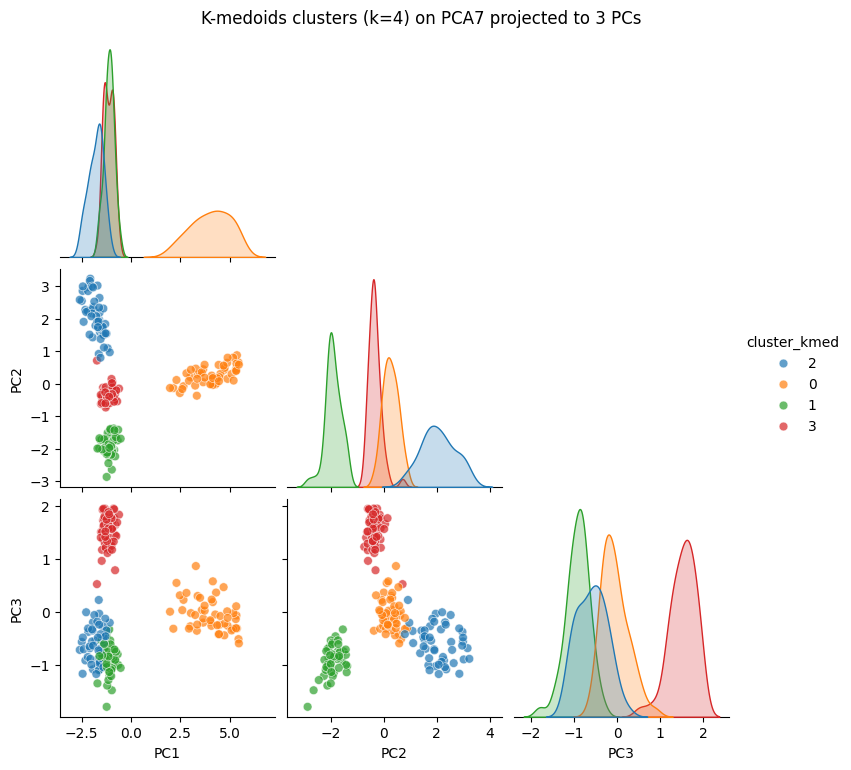

In [89]:
# PCA to 3 components only for visualization (from PCA7 → 3D)
pca_vis = PCA(n_components=3, random_state=42)
X_vis3 = pca_vis.fit_transform(X_pca7)

df_vis = pd.DataFrame(X_vis3, columns=["PC1", "PC2", "PC3"])
df_vis["cluster_kmed"] = labels_pca7_k4_medoids.astype(str)

# Pairplot of PC1–PC2–PC3 colored by k-medoids clusters
sns.pairplot(
    df_vis,
    vars=["PC1", "PC2", "PC3"],
    hue="cluster_kmed",
    corner=True,
    plot_kws={"alpha": 0.7, "s": 40}
)
plt.suptitle("K-medoids clusters (k=4) on PCA7 projected to 3 PCs", y=1.02)
plt.show()

This plot shows that the four k‑medoids clusters found in the PCA7 space form clearly separated groups when projected onto the first three principal components.​

In the PC1–PC2 and PC1–PC3 scatterplots, the orange cluster (cluster 0) is isolated to the right, while the blue, green, and red clusters occupy distinct regions on the left, indicating limited overlap between personas in the main variance directions.​

The kernel density curves along each diagonal (PC1, PC2, PC3) confirm that each cluster has a different distribution on these components, especially on PC2 and PC3, which supports the internal metrics showing good between‑cluster separation for k = 4.

## Statistical Analysis 


In [90]:
df_cl = df_simplified.copy()

cat_vars = ["gender_label", "school_labels", "marital_labels"]
num_vars = ["age", "income",
            "iat_total", "audit_total", "dast_total", "pgsi_total",
            "pcl5_total", "mspss_total", "swls_total", "who5_total"
]

# Compute cluster summaries (medians / modes)
rows = []

for cl in sorted(df_cl["cluster"].unique()):
    subset = df_cl[df_cl["cluster"] == cl]
    row = {"cluster": cl, "n":len(subset)}

    #numeric: median (25th; 75th)
    for v in num_vars:
        q1, med, q3 = subset[v].quantile([0.25, 0.5, 0.75])
        row[v] = f"{med:.1f} ({q1:.1f}; {q3:.1f})"
    
    #categorical: mode (%)
    for v in cat_vars:
        mode_val = subset[v].mode(dropna=True)[0]
        perc = (subset[v] == mode_val).mean() * 100
        row[v] = f"{mode_val} ({perc:.0f}%)"
    
    rows.append(row)

personas_table = pd.DataFrame(rows)
personas_table

,cluster,n,age,income,iat_total,audit_total,dast_total,pgsi_total,pcl5_total,mspss_total,swls_total,who5_total,gender_label,school_labels,marital_labels
0,0,50,28.0 (23.2; 33.0),33000.0 (29250.0; 37000.0),64.5 (58.7; 72.6),3.0 (1.0; 4.0),8.0 (7.0; 9.0),0.0 (0.0; 0.0),62.0 (50.2; 71.0),26.0 (18.0; 30.0),13.0 (9.0; 16.0),10.0 (7.2; 11.0),Female (52%),High (56%),Married (54%)
1,1,50,29.5 (23.0; 37.0),59000.0 (53250.0; 67000.0),16.0 (10.0; 22.5),10.0 (9.0; 12.8),4.0 (4.0; 5.0),2.0 (1.0; 3.0),6.0 (3.2; 7.8),67.5 (63.0; 77.8),29.0 (28.0; 32.0),21.0 (20.0; 22.8),Male (50%),Master (44%),Married (40%)
2,2,49,28.6 (22.0; 34.0),19000.0 (15000.0; 22000.0),39.0 (35.0; 44.0),27.0 (21.0; 30.0),0.0 (0.0; 0.0),17.0 (12.0; 22.0),6.0 (3.0; 8.0),49.0 (45.0; 54.0),12.0 (8.0; 16.0),10.0 (7.0; 11.0),Male (45%),Elementary (53%),Married (55%)
3,3,51,28.0 (22.5; 32.5),17000.0 (13500.0; 22700.0),91.0 (83.5; 95.0),2.0 (1.0; 5.0),2.0 (1.0; 2.0),6.0 (5.0; 7.0),5.0 (2.0; 8.0),69.0 (65.0; 74.0),23.0 (21.0; 25.0),16.0 (15.0; 17.0),Female (53%),Middle (47%),Single (65%)


In [91]:
p_rows = []

# numeric: Kruskal–Wallis
for v in num_vars:
    groups = [df_cl[df_cl["cluster"] == cl][v] for cl in sorted(df_cl["cluster"].unique())]
    stat, p = kruskal(*groups)
    p_rows.append({"variable": v, "type": "numeric", "p_global": p})

# categorical: chi-square
for v in cat_vars:
    ct = pd.crosstab(df_cl[v], df_cl["cluster"])
    chi2, p, dof, exp = chi2_contingency(ct)
    p_rows.append({"variable": v, "type": "categorical", "p_global": p})

p_table = pd.DataFrame(p_rows)
p_table


,variable,type,p_global
0,age,numeric,8.052703e-01
1,income,numeric,8.999881e-36
2,iat_total,numeric,9.563468e-40
3,audit_total,numeric,1.442159e-35
4,dast_total,numeric,5.761422e-41
5,pgsi_total,numeric,7.453545e-41
6,pcl5_total,numeric,2.911431e-24
7,mspss_total,numeric,1.440630e-35
8,swls_total,numeric,2.544239e-36
9,who5_total,numeric,4.001581e-36


According to these results: 
- Age has a p-value = 0.805 and so, there is no significant difference in age distribution between clusters;
- All numeric clinical scales except age have p < 0.001 and so, a very strong evidence that clusters differ on each of these outcomes;
- For categorical variables, gender has p = 0.169 and so gender composition is similar across clusters. In contrast, education and marital status have p < 0.001 which means they are significantly associated with cluster membership. 

In [92]:
# exclude age and gender_label automatically such that pairwise tests will be done for the significant variables
sig_vars = p_table[p_table["p_global"] < 0.05]["variable"].tolist()

In [93]:
import itertools
import pandas as pd
from scipy.stats import mannwhitneyu, chi2_contingency

def add_pairwise_marks_from_p(
    df_cl,
    cluster_col,
    num_vars,
    cat_vars,
    p_table,
    alpha=0.05,
    method="bonferroni",
):
    clusters = sorted(df_cl[cluster_col].unique())
    pairs = list(itertools.combinations(clusters, 2))

    # ---------- 1) Read global p from p_table ----------
    global_p = {
        row["variable"]: (row["type"], row["p_global"])
        for _, row in p_table.iterrows()
    }

    marks = {(v, cl): set() for v in num_vars + cat_vars for cl in clusters}
    symbols = {0: "*", 1: "#", 2: "$", 3: "&", 4: "§"}

    # ---------- 2) Pairwise tests only for vars with p<alpha ----------
    for v in num_vars + cat_vars:
        vtype, p_g = global_p[v]
        if p_g >= alpha:
            continue

        pvals = {}
        for c1, c2 in pairs:
            s1 = df_cl[df_cl[cluster_col] == c1][v]
            s2 = df_cl[df_cl[cluster_col] == c2][v]

            if vtype == "numeric":
                _, p = mannwhitneyu(s1, s2, alternative="two-sided")
            else:
                ct_pair = pd.crosstab(
                    df_cl[df_cl[cluster_col].isin([c1, c2])][v],
                    df_cl[df_cl[cluster_col].isin([c1, c2])][cluster_col],
                )
                _, p, _, _ = chi2_contingency(ct_pair)
            pvals[(c1, c2)] = p

        if method.lower() == "bonferroni":
            m = len(pvals)
            alpha_adj = alpha / m if m > 0 else alpha
        else:
            alpha_adj = alpha

        for (c1, c2), p in pvals.items():
            if p < alpha_adj:
                marks[(v, c1)].add(symbols[c2])
                marks[(v, c2)].add(symbols[c1])

    # ---------- 3) Build personas table with marks ----------
    rows = []
    for cl in clusters:
        subset = df_cl[df_cl[cluster_col] == cl]
        row = {cluster_col: cl, "n": len(subset)}

        for v in num_vars:
            q1, med, q3 = subset[v].quantile([0.25, 0.5, 0.75])
            base = f"{med:.1f} ({q1:.1f}; {q3:.1f})"
            row[v] = base + "".join(sorted(marks[(v, cl)]))

        for v in cat_vars:
            mode_val = subset[v].mode(dropna=True)[0]
            perc = (subset[v] == mode_val).mean() * 100
            base = f"{mode_val} ({perc:.0f}%)"
            row[v] = base + "".join(sorted(marks[(v, cl)]))

        rows.append(row)

    personas_marked = pd.DataFrame(rows)
    return personas_marked


In [94]:
num_vars_sig = [
    "income","iat_total","audit_total","dast_total","pgsi_total",
    "pcl5_total","mspss_total","swls_total","who5_total",
]
cat_vars_sig = ["school_labels","marital_labels"]

personas_marked = add_pairwise_marks_from_p(
    df_cl,
    cluster_col="cluster",
    num_vars=num_vars_sig,
    cat_vars=cat_vars_sig,
    p_table=p_table,   # the table you computed with KW / chi-square
    alpha=0.05,
    method="bonferroni",
)

personas_marked


,cluster,n,income,iat_total,audit_total,dast_total,pgsi_total,pcl5_total,mspss_total,swls_total,who5_total,school_labels,marital_labels
0,0,50,33000.0 (29250.0; 37000.0)#$&,64.5 (58.7; 72.6)#$&,3.0 (1.0; 4.0)#$,8.0 (7.0; 9.0)#$&,0.0 (0.0; 0.0)#$&,62.0 (50.2; 71.0)#$&,26.0 (18.0; 30.0)#$&,13.0 (9.0; 16.0)#&,10.0 (7.2; 11.0)#&,High (56%)#$&,Married (54%)#&
1,1,50,59000.0 (53250.0; 67000.0)$&*,16.0 (10.0; 22.5)$&*,10.0 (9.0; 12.8)$&*,4.0 (4.0; 5.0)$&*,2.0 (1.0; 3.0)$&*,6.0 (3.2; 7.8)*,67.5 (63.0; 77.8)$*,29.0 (28.0; 32.0)$&*,21.0 (20.0; 22.8)$&*,Master (44%)$&*,Married (40%)$&*
2,2,49,19000.0 (15000.0; 22000.0)#*,39.0 (35.0; 44.0)#&*,27.0 (21.0; 30.0)#&*,0.0 (0.0; 0.0)#&*,17.0 (12.0; 22.0)#&*,6.0 (3.0; 8.0)*,49.0 (45.0; 54.0)#&*,12.0 (8.0; 16.0)#&,10.0 (7.0; 11.0)#&,Elementary (53%)#&*,Married (55%)#&
3,3,51,17000.0 (13500.0; 22700.0)#*,91.0 (83.5; 95.0)#$*,2.0 (1.0; 5.0)#$,2.0 (1.0; 2.0)#$*,6.0 (5.0; 7.0)#$*,5.0 (2.0; 8.0)*,69.0 (65.0; 74.0)$*,23.0 (21.0; 25.0)#$*,16.0 (15.0; 17.0)#$*,Middle (47%)#$*,Single (65%)#$*


In [95]:
desired_order = [3, 0, 2, 1]

personas_marked = (
    personas_marked
    .set_index("cluster")      # use 'cluster' as index
    .loc[desired_order]        # reorder rows in the desired order
    .reset_index()             # bring 'cluster' back as a column
)
personas_marked

,cluster,n,income,iat_total,audit_total,dast_total,pgsi_total,pcl5_total,mspss_total,swls_total,who5_total,school_labels,marital_labels
0,3,51,17000.0 (13500.0; 22700.0)#*,91.0 (83.5; 95.0)#$*,2.0 (1.0; 5.0)#$,2.0 (1.0; 2.0)#$*,6.0 (5.0; 7.0)#$*,5.0 (2.0; 8.0)*,69.0 (65.0; 74.0)$*,23.0 (21.0; 25.0)#$*,16.0 (15.0; 17.0)#$*,Middle (47%)#$*,Single (65%)#$*
1,0,50,33000.0 (29250.0; 37000.0)#$&,64.5 (58.7; 72.6)#$&,3.0 (1.0; 4.0)#$,8.0 (7.0; 9.0)#$&,0.0 (0.0; 0.0)#$&,62.0 (50.2; 71.0)#$&,26.0 (18.0; 30.0)#$&,13.0 (9.0; 16.0)#&,10.0 (7.2; 11.0)#&,High (56%)#$&,Married (54%)#&
2,2,49,19000.0 (15000.0; 22000.0)#*,39.0 (35.0; 44.0)#&*,27.0 (21.0; 30.0)#&*,0.0 (0.0; 0.0)#&*,17.0 (12.0; 22.0)#&*,6.0 (3.0; 8.0)*,49.0 (45.0; 54.0)#&*,12.0 (8.0; 16.0)#&,10.0 (7.0; 11.0)#&,Elementary (53%)#&*,Married (55%)#&
3,1,50,59000.0 (53250.0; 67000.0)$&*,16.0 (10.0; 22.5)$&*,10.0 (9.0; 12.8)$&*,4.0 (4.0; 5.0)$&*,2.0 (1.0; 3.0)$&*,6.0 (3.2; 7.8)*,67.5 (63.0; 77.8)$*,29.0 (28.0; 32.0)$&*,21.0 (20.0; 22.8)$&*,Master (44%)$&*,Married (40%)$&*


In [96]:
# Build mapping old -> new label
old_to_new = {3: 0, 0: 1, 2: 2, 1: 3}

# Apply mapping to the personas table
personas_marked["cluster_new"] = personas_marked["cluster"].map(old_to_new)
personas_marked = (
    personas_marked
    .drop(columns=["cluster"])
    .rename(columns={"cluster_new": "cluster"})
    .sort_values("cluster")
    .reset_index(drop=True)
)

personas_marked


,n,income,iat_total,audit_total,dast_total,pgsi_total,pcl5_total,mspss_total,swls_total,who5_total,school_labels,marital_labels,cluster
0,51,17000.0 (13500.0; 22700.0)#*,91.0 (83.5; 95.0)#$*,2.0 (1.0; 5.0)#$,2.0 (1.0; 2.0)#$*,6.0 (5.0; 7.0)#$*,5.0 (2.0; 8.0)*,69.0 (65.0; 74.0)$*,23.0 (21.0; 25.0)#$*,16.0 (15.0; 17.0)#$*,Middle (47%)#$*,Single (65%)#$*,0
1,50,33000.0 (29250.0; 37000.0)#$&,64.5 (58.7; 72.6)#$&,3.0 (1.0; 4.0)#$,8.0 (7.0; 9.0)#$&,0.0 (0.0; 0.0)#$&,62.0 (50.2; 71.0)#$&,26.0 (18.0; 30.0)#$&,13.0 (9.0; 16.0)#&,10.0 (7.2; 11.0)#&,High (56%)#$&,Married (54%)#&,1
2,49,19000.0 (15000.0; 22000.0)#*,39.0 (35.0; 44.0)#&*,27.0 (21.0; 30.0)#&*,0.0 (0.0; 0.0)#&*,17.0 (12.0; 22.0)#&*,6.0 (3.0; 8.0)*,49.0 (45.0; 54.0)#&*,12.0 (8.0; 16.0)#&,10.0 (7.0; 11.0)#&,Elementary (53%)#&*,Married (55%)#&,2
3,50,59000.0 (53250.0; 67000.0)$&*,16.0 (10.0; 22.5)$&*,10.0 (9.0; 12.8)$&*,4.0 (4.0; 5.0)$&*,2.0 (1.0; 3.0)$&*,6.0 (3.2; 7.8)*,67.5 (63.0; 77.8)$*,29.0 (28.0; 32.0)$&*,21.0 (20.0; 22.8)$&*,Master (44%)$&*,Married (40%)$&*,3


Cluster 0 represents the highest internet‑addiction risk profile with relatively low resources across several domains.  
Cluster 1 concentrates severe comorbid symptoms and low wellbeing at mid income.  
Cluster 2 is defined by alcohol and gambling problems more than internet use.  
Cluster 3 is a low‑risk, high‑resource group.

## Cluster 0

- Income: Lowest–to‑low income (median around 17k), significantly lower than clusters 0 and 1 (`#*`).  
- IAT: Very severe internet addiction (median ≈ 91), significantly higher than all other clusters (`#$*`).  
- AUDIT: Low alcohol problems, significantly lower than clusters 2 and 1 (`#$`).  
- DAST: Very low drug problems, significantly lower than clusters 0 and 1 (`#$*`).  
- PGSI: Moderate gambling problems, higher than clusters 0 and 1, lower than cluster 2 (`#$*`).  
- PCL‑5: Very low PTSD symptoms, significantly lower than all other clusters (`*`).  
- MSPSS: Very high perceived social support, significantly higher than clusters 0 and 2, similar to cluster 1 (`$*`).  
- SWLS: Low–moderate life satisfaction, significantly lower than clusters 1 and 2, and different from cluster 0 (`#$*`).  
- WHO‑5: Low wellbeing, significantly lower than all other clusters (`#$*`).  
- Education: Mostly middle school, significantly different from all other clusters (`#$*`).  
- Marital status: Mostly single (65%), significantly different from all other clusters (`#$*`).

## Cluster 1

- Income: Mid income (≈ 33k), significantly higher than clusters 3 and 2 and lower than cluster 1 (`#$&`).  
- IAT: High internet addiction (≈ 64.5), significantly above clusters 1 and 2, below cluster 3 (`#$&`).  
- AUDIT: Very low alcohol problems, significantly lower than clusters 2 and 1 (`#$`).  
- DAST: Very high drug problems (≈ 8), significantly higher than all other clusters (`#$&`).  
- PGSI: Minimal gambling problems (0), significantly lower than clusters 2 and 3, and lower than cluster 1 (`#$&`).  
- PCL‑5: High PTSD symptoms (≈ 62), significantly higher than all other clusters (`#$&`).  
- MSPSS: Low social support, significantly lower than clusters 1 and 3, and lower than cluster 2 (`#$&`).  
- SWLS: Very low life satisfaction, significantly lower than clusters 1 and 2, and lower than cluster 3 (`#&`).  
- WHO‑5: Very low wellbeing, significantly lower than clusters 1 and 2, and lower than cluster 3 (`#&`).  
- Education: Mainly high school, significantly different from all other clusters (`#$&`).  
- Marital status: Mostly married, significantly different from clusters 3 and 2 (`#&`).

## Cluster 2 

- Income: Low–mid income (≈ 19k), significantly lower than clusters 0 and 1, higher than cluster 3 (`#*`).  
- IAT: Moderately high internet addiction (≈ 39), significantly lower than clusters 3 and 0 and higher than cluster 1 (`#&*`).  
- AUDIT: Very high alcohol problems (≈ 27), significantly higher than all other clusters (`#&*`).  
- DAST: Minimal drug problems (0), significantly lower than clusters 0 and 1 (`#&*`).  
- PGSI: Very high gambling problems (≈ 17), significantly higher than all other clusters (`#&*`).  
- PCL‑5: Low PTSD symptoms, similar to clusters 3 and 1 but lower than cluster 0 (`*`).  
- MSPSS: Moderate social support, significantly lower than clusters 1 and 3, and higher than cluster 0 (`#&*`).  
- SWLS: Low life satisfaction, similar to cluster 0 and significantly lower than clusters 1, and different from cluster 3 (`#&`).  
- WHO‑5: Low wellbeing, similar to cluster 0 and significantly lower than clusters 1, and different from cluster 3 (`#&`).  
- Education: Mainly elementary school, significantly different from all other clusters (`#&*`).  
- Marital status: Mostly married, significantly different from cluster 3 and similar to cluster 0 (`#&`).

## Cluster 3

- Income: Highest income (≈ 59k), significantly higher than all other clusters (`$&*`).  
- IAT: Low internet addiction (≈ 16), significantly lower than clusters 3 and 0 and lower than cluster 2 (`$&*`).  
- AUDIT: Moderate alcohol use (≈ 10), significantly higher than clusters 3 and 0 and lower than cluster 2 (`$&*`).  
- DAST: Moderate drug problems (≈ 4), significantly lower than cluster 0 and higher than cluster 3, and different from cluster 2 (`$&*`).  
- PGSI: Low gambling problems (≈ 2), significantly lower than cluster 2 and different from clusters 3 and 0 (`$&*`).  
- PCL‑5: Low PTSD symptoms, similar to clusters 2 and 3 and significantly lower than cluster 0 (`*`).  
- MSPSS: Very high social support, significantly higher than clusters 0 and 2, similar to cluster 3 (`$*`).  
- SWLS: Very high life satisfaction, significantly higher than all other clusters (`$&*`).  
- WHO‑5: High wellbeing, significantly higher than all other clusters (`$&*`).  
- Education: Mainly Master’s degree, significantly different from all other clusters (`$&*`).  
- Marital status: Mostly married but with mix of separated/divorced, significantly different from all other clusters (`$&*`).

In [97]:
personas_table.to_excel("Persona_Table.xlsx", sheet_name="Personas", index=False)